<a href="https://colab.research.google.com/github/Anas1smail/codeforces_solution/blob/main/1_9_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Anas Ismail, Gabby Al-Hanna]

<h1 style="text-align: center;">Arabic Dialect Identification<h1>

Prepare libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import regex
import os
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures, TrigramAssocMeasures
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from collections import defaultdict
import string
import networkx as nx
from sklearn.manifold import MDS
from gensim.models import KeyedVectors
import requests
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import json

Load data

In [ ]:
Aleppo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Aleppo.tsv', sep='\t')
Alexandria = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Alexandria.tsv', sep='\t')
Algiers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Algiers.tsv', sep='\t')
Amman = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Amman.tsv', sep='\t')
Aswan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Aswan.tsv', sep='\t')
Baghdad = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Baghdad.tsv', sep='\t')
Basra = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Basra.tsv', sep='\t')
Beirut = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Beirut.tsv', sep='\t')
Benghazi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Benghazi.tsv', sep='\t')
Cairo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Cairo.tsv', sep='\t')
Damascus = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Damascus.tsv', sep='\t')
Doha = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Doha.tsv', sep='\t')
# English = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.English.index.tsv', sep='\t')
Fes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Fes.tsv', sep='\t')
# French = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.French.index.tsv', sep='\t')
Jeddah = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Jeddah.tsv', sep='\t')
Jerusalem = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Jerusalem.tsv', sep='\t')
Khartoum = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Khartoum.tsv', sep='\t')
MSA = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.MSA.tsv', sep='\t')
Mosul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Mosul.tsv', sep='\t')
Rabat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Rabat.tsv', sep='\t')
Riyadh = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Riyadh.tsv', sep='\t')
Salt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Salt.tsv', sep='\t')
Sanaa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Sanaa.tsv', sep='\t')
Sfax = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Sfax.tsv', sep='\t')
Tripoli = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Tripoli.tsv', sep='\t')
Tunis = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MADAR_Corpus/MADAR.corpus.Tunis.tsv', sep='\t')
# without MSA
MADAR = pd.concat([Aleppo, Alexandria, Algiers, Amman, Aswan, Baghdad, Basra, Beirut, Benghazi, Cairo, Damascus, Doha, Fes, Jeddah, Jerusalem, Khartoum, Mosul, Rabat, Riyadh, Salt, Sanaa, Sfax, Tripoli, Tunis,], ignore_index=True)

In [ ]:
# تعريف مسارات ملفات البيانات الخاصة بالتدريب والتحقق والاختبار

splits = {'train': 'data/train-00000-of-00001.parquet',
          'validation': 'data/validation-00000-of-00001.parquet',
          'test': 'data/test-00000-of-00001.parquet'}

# تحميل بيانات التدريب
Dialect_Identification_Train = pd.read_parquet("hf://datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification/" + splits["train"])

# تحميل بيانات الاختبار
Dialect_Identification_Test = pd.read_parquet("hf://datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification/" + splits["test"])

# تحميل بيانات التحقق
Dialect_Identification_Validation = pd.read_parquet("hf://datasets/Abdelrahman-Rezk/Arabic_Dialect_Identification/" + splits["validation"])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
dialect_name_unification = pd.read_excel('dialect_name_unification.xlsx')

# مهمة 01  : تحميل البيانات

## [1.1]

تنظيف البيانات وتقسيمها وإعادة ترتيبها لإعدادها للاستخدام في التحليل و التدريب

In [ ]:
# تابع لتنظيف البيانات من القيم المفقودة والصفوف المتكررة
def clean_and_check_repeats(df):
    cleaned_df = df.dropna()  # إزالة القيم المفقودة
    cleaned_df = cleaned_df.drop_duplicates()  # إزالة الصفوف المتكررة
    return cleaned_df

#  'split' تابع لإعادة ترتيب البيانات عشوائياً بعد إزالة العمود المطلوب
def df_split(df):
    if 'split' in df.columns:  # التحقق من وجود العمود المطلوب
        df.drop(columns=['split'], inplace=True)  # إزالة العمود المطلوب
    df = df.sample(frac=1).reset_index(drop=True)  # مزج البيانات وإعادة ترتيبها
    return df

# تنظيف البيانات الأصلية لضمان جودتها
MADAR = clean_and_check_repeats(MADAR)
Dialect_Identification_Train = clean_and_check_repeats(Dialect_Identification_Train)
Dialect_Identification_Test = clean_and_check_repeats(Dialect_Identification_Test)
Dialect_Identification_Validation = clean_and_check_repeats(Dialect_Identification_Validation)

# تقسيم البيانات إلى أجزاء بناءً على العمود المحدد
MADAR_Train = MADAR[MADAR["split"] == 'corpus-6-train']
MADAR_Validation = MADAR[MADAR["split"] == 'corpus-6-dev']
MADAR_Test_Train = MADAR[MADAR["split"] == 'corpus-6-test-corpus-26-train']
MADAR_Test_Validation = MADAR[MADAR["split"] == 'corpus-6-test-corpus-26-dev']
MADAR_Test_Test = MADAR[MADAR["split"] == 'corpus-6-test-corpus-26-test']

# دمج البيانات الناتجة من الأقسام المختلفة لتوحيدها
New_MADAR_Train = pd.concat([MADAR_Train, MADAR_Test_Train], ignore_index=True)
New_MADAR_Validation = pd.concat([MADAR_Validation, MADAR_Test_Validation], ignore_index=True)
New_MADAR_Test = MADAR_Test_Test.copy()

# إعادة ترتيب البيانات بعد الدمج
MADAR_Train = df_split(New_MADAR_Train)
MADAR_Validation = df_split(New_MADAR_Validation)
MADAR_Test = df_split(New_MADAR_Test)


## [1.2]

تنظيف وتنسيق بيانات الجدول عن طريق حذف صفوف، إعادة تسمية الأعمدة، واستخراج أعمدة محددة

In [ ]:
# حذف أول صفين من البيانات لأنها قد تحتوي على عناوين أو بيانات غير ضرورية
dialect_name_unification = dialect_name_unification.drop(0)
dialect_name_unification = dialect_name_unification.drop(1)

# إعادة ضبط الفهرس بعد الحذف لضمان تسلسل صحيح للفهرس
dialect_name_unification.reset_index(drop=True, inplace=True)

# إعادة تسمية الأعمدة لتكون واضحة وسهلة الاستخدام
dialect_name_unification = dialect_name_unification.rename(
    columns={ 'Unnamed: 0': 'Region_code',  # كود المنطقة
              'Region': 'Region_E',        # اسم المنطقة بالإنجليزية
              'Unnamed: 2': 'Region_A',    # اسم المنطقة بالعربية
              'Unnamed: 3': 'Country_code',# كود الدولة
              'Country': 'Country_E',      # اسم الدولة بالإنجليزية
              'Unnamed: 5': 'Country_A',   # اسم الدولة بالعربية
              'Unnamed: 6': 'lang',        # اللغة
              'City': 'City_E',            # اسم المدينة بالإنجليزية
              'Unnamed: 8': 'City_A'}      # اسم المدينة بالعربية
)

# استخراج أعمدة محددة فقط لبيانات المنطقة، كود الدولة، واللغة
dialect_code = dialect_name_unification[['Region_E', 'Country_code', 'lang']]


اضافة معلومات المنطقة والدولة إلى بيانات الإدخال بناء على لغة اللهجة

In [ ]:
def add_region_country(df, dialect_code):
    # حذف التكرارات في بيانات اللهجات بناء على عمود اللغة، مع الاحتفاظ بالسجل الأول فقط
    dialect_code = dialect_code.drop_duplicates(subset='lang', keep='first')

    # دمج بيانات الجدول المدخل مع بيانات اللهجات بناءً على عمود اللغة
    new_df = df.merge(dialect_code, on='lang', how='left')

    # إعادة تسمية الأعمدة لتصبح أكثر وضوحا عند الاستخدام
    new_df = new_df.rename(
        columns={'Region_E': 'region',  #'region' تحويل اسم العمود الخاص بالمنطقة إلى
                 'Country_code': 'country'}  #'country' تحويل اسم العمود الخاص بالدولة إلى
    )

    # إرجاع الجدول الجديد بعد إضافة أعمدة المنطقة والدولة
    return new_df


إضافة معلومات المنطقة والدولة إلى بيانات التدريب، التحقق، والاختبار

In [ ]:
MADAR_Train = add_region_country(MADAR_Train, dialect_code)
MADAR_Validation = add_region_country(MADAR_Validation, dialect_code)
MADAR_Test = add_region_country(MADAR_Test, dialect_code)

In [ ]:
print('train', MADAR_Train.shape)
print('validation', MADAR_Validation.shape)
print('test', MADAR_Test.shape)

train (83400, 5)
validation (9800, 5)
test (4800, 5)


طباعة اول عشرة اسطر

In [ ]:
Dialect_Identification_Train.head(10)

id  label  \
0  1046024946705735552      9   
1  1140189387508134016     17   
2  1051416181855440768      0   
3   781770259422412800     11   
4   968140551366340608     11   
5  1129830890069270400      2   
6  1055146289791258624      4   
7  1040998864327794816     17   
8   966103834618744832     10   
9  1126962565261811584      2   

                                                text  
0  @Ahmed_Hamza27 اتمنى صراحة و خصوصا #طال_عمره ب...  
1  @rJiM4CnIFTgml9g @zamnissi طبعا عرفته من اللي ...  
2  @OmanisFollowers @ooredoo @TRA_OMAN @motc_om ه...  
3  كلب شو كنتوا بتتوقعوا منه !؟ \n\nمحمود عباس لا...  
4                  #عزام 🔊\nاحنا ابو الولد وام الولد  
5  @HussamAAlsaleh1 الله يبشرررررك بالجنة يابو سع...  
6  @Ocxoc @AlArabiya_Brk والله العظيم انه مجرد تق...  
7          @anasyounis52 اها مستوى أقل شوية هههههههه  
8  قلبي مقبوض ، بقالي كام يوم مش متظبط و اتمني ان...  
9            @ryanovic_nfc خوينا ذا 😒 مانخلي اخويانا

## [1.3]

إضافة معلومات المنطقة إلى البيانات بناء على رموز الدول

In [ ]:
def add_region_to_dialect(df, dialect_code):
    # إنشاء نسخة جديدة من بيانات التشفير وإزالة العمود الخاص باللغة
    dialect_code_without_lang = dialect_code.copy()
    dialect_code_without_lang.drop(columns=['lang'], inplace=True)

    # إعادة تسمية الأعمدة لتصبح أسماء الأعمدة واضحة
    dialect_code_without_lang = dialect_code_without_lang.rename(
        columns={'Region_E': 'region', 'Country_code': 'country'}
    )

    # تعريف قائمة تحتوي على رموز الدول
    countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

    # إنشاء قاموس يربط بين الترقيم الداخلي ورموز الدول
    country_dict = {i: countries[i] for i in range(len(countries))}

    # إزالة التكرارات في بيانات التشفير بناء على عمود الدولة
    dialect_code_without_lang = dialect_code_without_lang.drop_duplicates(subset='country', keep='first')

    # إنشاء نسخة جديدة من البيانات المدخلة للتعديل عليها
    testing_df = df.copy()

    # إزالة عمود المعرف من البيانات
    testing_df.drop(columns=['id'], inplace=True)

    # إعادة تسمية عمود النصوص ليصبح اسمه أكثر وضوحا
    testing_df = testing_df.rename(
        columns={'text': 'sent'}
    )

    # إضافة عمود جديد يعبر عن الدولة بناءً على القيم المرتبطة في القاموس
    testing_df['country'] = testing_df['label'].map(country_dict)

    # إزالة عمود التصنيفات بعد استخدامه
    testing_df.drop(columns=['label'], inplace=True)

    # دمج البيانات مع معلومات المنطقة بناء على الدولة
    testing_df = testing_df.merge(dialect_code_without_lang, on='country', how='left')

    return testing_df


In [ ]:
Dialect_Identification_Train = add_region_to_dialect(Dialect_Identification_Train, dialect_code)
Dialect_Identification_Validation = add_region_to_dialect(Dialect_Identification_Validation, dialect_code)
Dialect_Identification_Test = add_region_to_dialect(Dialect_Identification_Test, dialect_code)

دمج ثلاث مجموعات بيانات باستخدام الأعمدة المشتركة "الجملة"، "المنطقة"، و"البلد

In [ ]:
DF_Train = pd.merge(Dialect_Identification_Train, MADAR_Train, on=['sent', 'region', 'country'], how='outer')
DF_Test = pd.merge(Dialect_Identification_Test, MADAR_Test, on=['sent', 'region', 'country'], how='outer')
DF_Validation = pd.merge(Dialect_Identification_Validation, MADAR_Validation, on=['sent', 'region', 'country'], how='outer')

In [ ]:
# sentID.BTEC
DF_Train.drop(columns=['sentID.BTEC'], inplace=True)
DF_Test.drop(columns=['sentID.BTEC'], inplace=True)
DF_Validation.drop(columns=['sentID.BTEC'], inplace=True)

 اضافة عمود جديد يحتوي على أرقام مميزة لكل دولة بناء على قائمة الدول المحددة

In [ ]:
def add_country_num(main_df):
  df = main_df.copy()
  countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

  country_dict = {country: i for i, country in enumerate(countries)}

  df['country_num'] = df['country'].map(country_dict)
  return df

DF_Train = add_country_num(DF_Train)
DF_Test = add_country_num(DF_Test)
DF_Validation = add_country_num(DF_Validation)

اضافة عمود جديد يحتوي على أرقام مميزة لكل منطقة بناء على قائمة المناطق المحددة

In [ ]:

def add_region_num(main_df):
  df = main_df.copy()
  regions = ['Gulf', 'Nile_Basin', 'Levant', 'Maghreb', 'Yemen', 'Iraqi']
  region_dict = {region: i for i, region in enumerate(regions)}

  df['region_num'] = df['region'].map(region_dict)
  return df

DF_Train = add_region_num(DF_Train)
DF_Test = add_region_num(DF_Test)
DF_Validation = add_region_num(DF_Validation)

 اضافة عمود يحتوي على أرقام  لكل لغة بناء على قائمة اللغات المحددة

In [ ]:

def add_lang_num(main_df):
  # عمل نسخة من البيانات الأصلية
  df = main_df.copy()

  # قائمة اللغات المخصصة
  langs = ['ALE', 'ALX', 'ALG', 'AMM', 'ASW', 'BAG', 'BAS', 'BEI', 'BEN',
       'CAI', 'DAM', 'DOH', 'FES', 'JED', 'JER', 'KHA', 'MOS', 'RAB',
       'RIY', 'SAL', 'SAN', 'SFX', 'TRI', 'TUN']

  # إنشاء قاموس يربط بين كل لغة ورقم مميز لها
  lang_dict = {lang: i for i, lang in enumerate(langs)}

  # إضافة العمود الجديد الذي يحتوي على الأرقام المميزة للغات
  df['lang_num'] = df['lang'].map(lang_dict)

  # إرجاع البيانات المعدلة
  return df

# تطبيق الدالة على بيانات التدريب
DF_Train = add_lang_num(DF_Train)

# تطبيق الدالة على بيانات الاختبار
DF_Test = add_lang_num(DF_Test)

# تطبيق الدالة على بيانات التحقق
DF_Validation = add_lang_num(DF_Validation)


In [ ]:
print('train', DF_Train.shape)
print('validation', DF_Validation.shape)
print('test', DF_Test.shape)

train (523452, 7)
validation (18964, 7)
test (13781, 7)


# مهمة 02 : فهم وتحليل البيانات

EDA

## [2.1]


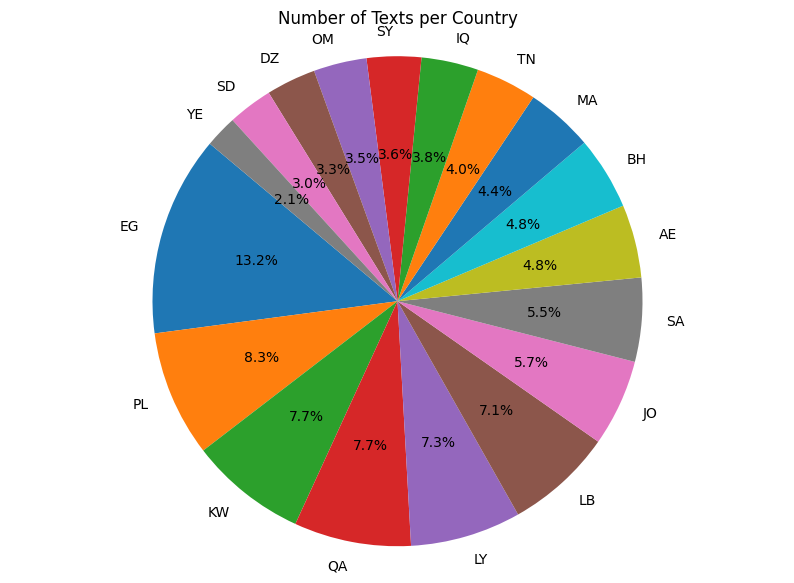

In [ ]:
country_counts = DF_Train['country'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Texts per Country')
plt.axis('equal')
plt.show()


اكتشفنا ان عينات الدول غير متساوية
بالرغم انها تقريبا تبدو متساوية
اكثر لهجة موجودة هي المصرية

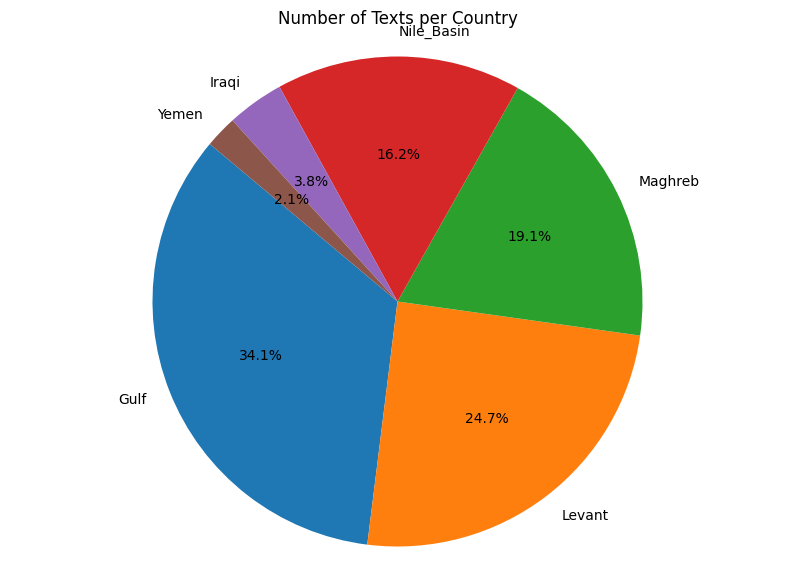

In [ ]:
country_counts = DF_Train['region'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Texts per Country')
plt.axis('equal')
plt.show()

عراق واليمن تحوي على أقل عدد من النصوص

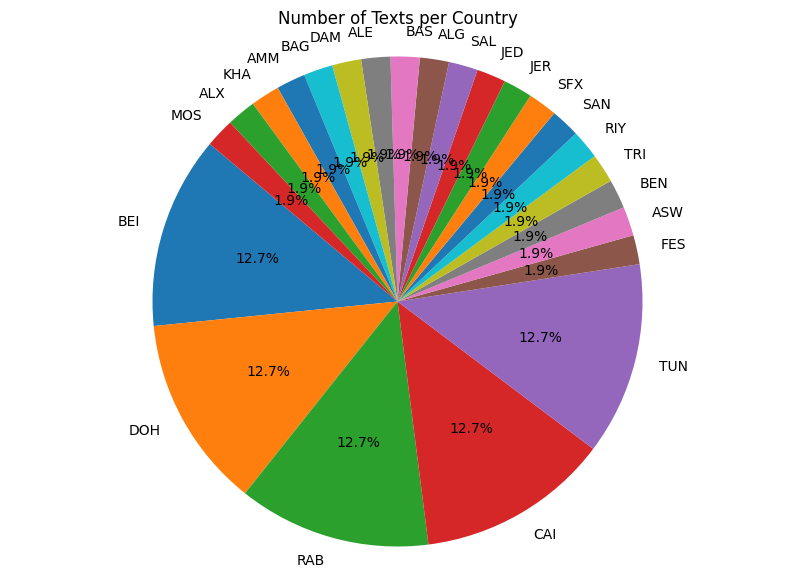

In [ ]:
DF = DF_Train.copy()
DF.dropna(subset=['lang'], how='all')

country_counts = DF['lang'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Texts per Country')
plt.axis('equal')
plt.show()

 corps-6 اللهجات المهيمنة هي اللهجات التي حصلنا عليها من

## [2.2]

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

  وحساب عدد الكلمات الإجمالية وعدد الكلمات الفريدة في بيانات التدريب(tokens) تقسيم النصوص الى  كلمات

In [ ]:
# تعريف دالة لتقسيم النص إلى كلمات
def tokenize_text(text):
    return word_tokenize(text)

# تطبيق الدالة على عمود الجمل في بيانات التدريب لتقسيمها إلى كلمات
DF_Train['tokens'] = DF_Train['sent'].apply(tokenize_text)

# جمع جميع الكلمات في قائمة واحدة من جميع الجمل
all_tokens = [token for sublist in DF_Train['tokens'] for token in sublist]

# حساب عدد الكلمات الإجمالية
total_tokens = len(all_tokens)

# حساب عدد الكلمات الفريدة
unique_words = len(set(all_tokens))

# طباعة عدد الكلمات الإجمالية والفريدة
print("Total number of tokens:", total_tokens)
print("Number of unique words:", unique_words)

Total number of tokens: 7889844
Number of unique words: 829953


In [ ]:
for i in range (5):
  print(DF_Train['tokens'][i])

['لما', 'اسمع', 'احد', 'يقول', '``', 'وش', 'كنت', 'بقول', "''", 'تلقائي', 'لساني', 'يقول', 'نستني', 'عيونك', '☺̷', '*', 'beer', '*', 'ذابحتني', 'الرومنسيہ', '☻♡♡']
['!', '.', '.', 'أعطوهہ', '/', '..', 'القليل', 'من', 'وقتگم', 'وصلّوا', 'عليهہ', '..', 'صلىى', 'الله', 'عليه', 'وسلمّ', '،', '❥࿐', '(', 'f', ')']
['!', 'نضف', 'مكان', 'مابهدلت', '..', '!', 'الكذب', 'مش', 'شطاره', '..', '!', 'الصوت', 'العالى', 'وقت', 'الخلافات', 'مش', 'رجوله', '..', '!', 'الأعتراف', 'بالخطأ', 'مش', 'ضعف', '..', '!', 'وطى', 'صوتك', 'وأنت', 'بتتكلم', 'مع', 'حد', 'كبير', '..', '!', 'اسمها', 'حضرتك', 'مش', 'أنت', '..', '!', 'ماتبقاش', 'قاعد', 'وسايب', 'حد', 'كبير', 'واقف', '..', '!', 'اسمها', 'نعم', 'مش', 'إيه', '...', '!', 'متمدش', 'ايدك', 'على', 'بنت', '...', '!', 'البنطلون', 'الساقط', 'مش', 'موضه', '..']
['!', '!', '!', '!', '!', '!', '!', 'الكبير', 'كبير', 'حتى', 'لو', 'ماطلع', 'فالصوره', 'https', ':', '//t.co/0xsk0w1KsU']
['!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', 'شو', 'اللي', 'صار', 'من', 'دقي

## [2.3]

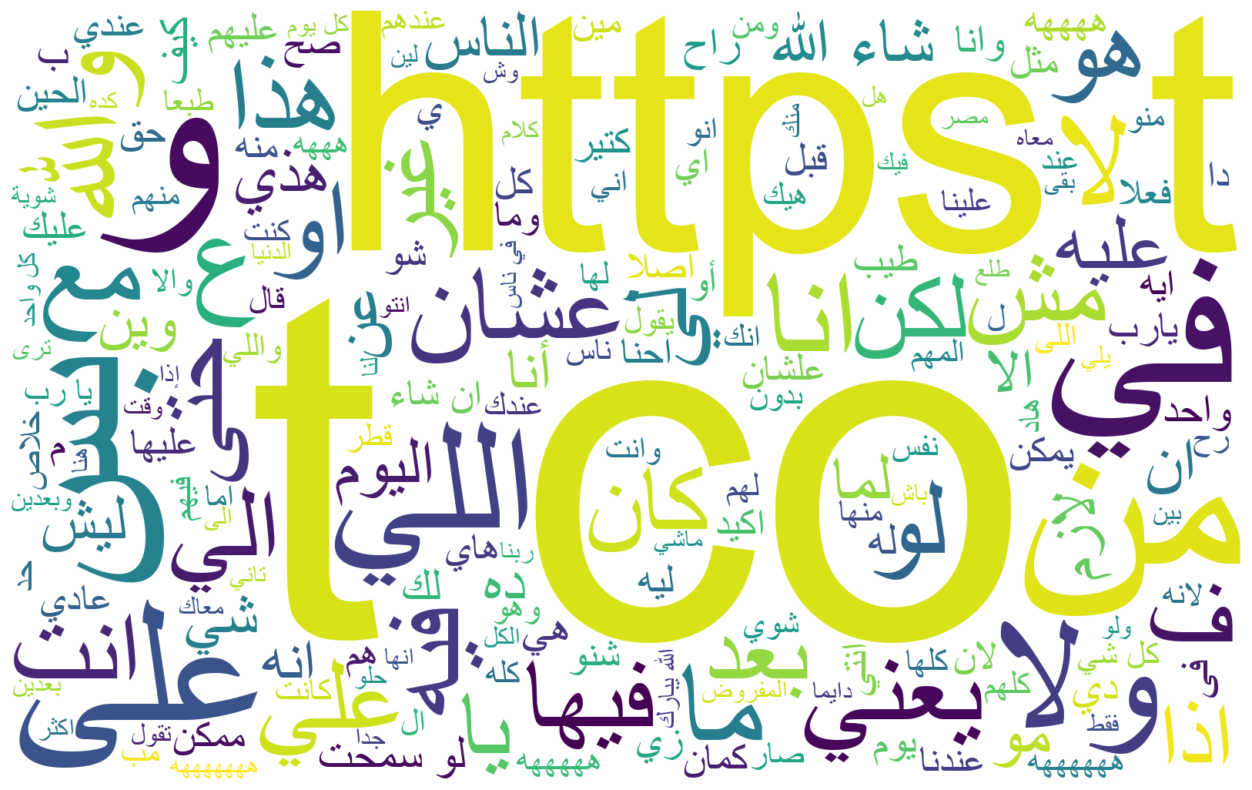

In [ ]:
all_words = ' '.join(DF_Train['sent'].tolist())

wordcloud = WordCloud(
    font_path='arabic_font.ttf',
    width=1600,
    height=1000,
    background_color='white'
).generate(all_words)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

اكثر الكلمات المستخدمة بكل اللهجات

## [2.4]

نستخدم ال likehoodration حتى نستنتج ال collecations  
فرق بين الاكثر تكرارا والأهم

الأهم: لها دلالة إحصائية كبيرة في النص وليست مجرد تكرار عشوائي، مما يعني أنها تظهر معًا بشكل أكبر من المتوقع عشوائيًا

In [ ]:
# تعريف دالة لتحليل النصوص واستخراج معلومات  عن الكلمات
def analyze_text(tokens, n):
    if len(tokens) < 1:
        return {
            "most_common_words": [],
            "hapaxes": [],
            "most_common_bigrams": [],
            "most_common_trigrams": [],
            "bigram_collocations": [],
            "trigram_collocations": []
        }

 # حساب تكرار الكلمات في النص
    word_freq = Counter(tokens)

# استخراج الكلمات الأكثر تكرارًا
    most_common_words = word_freq.most_common(n)

   # (hapaxes) استخراج الكلمات التي تظهر مرة واحدة فقط
    hapaxes = [word for word, freq in word_freq.items() if freq == 1][:n]

    # (bigrams) استخراج أزواج الكلمات الأكثر تكرارًا
    most_common_bigrams = []
    if len(tokens) >= 2:
        bigrams = list(nltk.bigrams(tokens))
        most_common_bigrams = Counter(bigrams).most_common(n)

    #  (trigrams) استخراج ثلاثيات الكلمات الأكثر تكرارًا
    most_common_trigrams = []
    if len(tokens) >= 3:
        trigrams = list(nltk.trigrams(tokens))
        most_common_trigrams = Counter(trigrams).most_common(n)

    #  (bigram collocations)استخراج التوافقات بين الأزواج
    bigram_collocations = []
    if len(tokens) >= 2:
        try:
            bigram_finder = BigramCollocationFinder.from_words(tokens)
            # bigram_finder.apply_freq_filter(2)  # لتصفية الأزواج النادرة
            bigram_collocations = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, n)
        except ValueError as e:
            print(f"Error in bigram collocations: {e}")

    # (trigram collocations)استخراج التوافقات بين الثلاثيات
    trigram_collocations = []
    if len(tokens) >= 3:
        try:
            trigram_finder = TrigramCollocationFinder.from_words(tokens)
            # trigram_finder.apply_freq_filter(3)  # لتصفية الثلاثيات النادرة
            trigram_collocations = trigram_finder.nbest(TrigramAssocMeasures.likelihood_ratio, n)
        except ValueError as e:
            print(f"Error in trigram collocations: {e}")

    # إرجاع النتائج
    return {
        "most_common_words": most_common_words,
        "hapaxes": hapaxes,
        "most_common_bigrams": most_common_bigrams,
        "most_common_trigrams": most_common_trigrams,
        "bigram_collocations": bigram_collocations,
        "trigram_collocations": trigram_collocations
    }

تحليل النصوص في بيانات التدريب، ثم تخزين النتائج في ملف يتضمن معلومات عن اللغة، البلد، والمنطقة بالإضافة إلى التحليلات المختلفة

In [ ]:
# إنشاء قائمة لتخزين البيانات المحللة
data = []

# تكرار العملية عبر جميع الجمل في بيانات التدريب
for i in range(len(DF_Train['tokens'])):
  # "analyze_text"تحليل النص باستخدام دالة
  result = analyze_text(DF_Train['tokens'][i], 10)

  # استخراج معلومات اللغة، البلد، والمنطقة
  lang = DF_Train['lang'][i]
  country = DF_Train['country'][i]
  region = DF_Train['region'][i]

  #  "data"إضافة النتائج إلى قائمة
  data.append({
        "lang": lang,  # إضافة اللغة
        "country": country,  # إضافة البلد
        "region": region,  # إضافة المنطقة
        "most_common_words": tuple(result["most_common_words"]),  # إضافة الكلمات الأكثر شيوعًا
        "hapaxes": tuple(result["hapaxes"]),  # إضافة الكلمات التي تظهر مرة واحدة فقط
        "most_common_bigrams": tuple(result["most_common_bigrams"]),  # إضافة أزواج الكلمات الأكثر شيوعًا
        "most_common_trigrams": tuple(result["most_common_trigrams"]),  # إضافة ثلاثيات الكلمات الأكثر شيوعًا
        "bigram_collocations": tuple(result["bigram_collocations"]),  # إضافة توافقات الأزواج
        "trigram_collocations": tuple(result["trigram_collocations"])  # إضافة توافقات الثلاثيات
    })

#  DataFrame تحويل قائمة البيانات إلى
df = pd.DataFrame(data)

# إنشاء نسخة  للتحليل
analyze_text_df = df.copy()

# حفظ الملف في المسار المحدد
analyze_text_df.to_csv('/content/drive/MyDrive/Folder/analyze_text_dataframe.csv', index=False)

Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in trigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations: math domain error
Error in trigram collocations: math domain error
Error in bigram collocations

هنا نستخدم سلسلة المفتاح والقيم لنجد أعلى الكلمات أو الثائيات بالداتا

In [ ]:
# دالة لاستخراج أكثر الكلمات تكرارًا من قائمة التوائم
def get_top_words(tuples_list, n=10):
    word_counts = defaultdict(int)  # إنشاء قاموس لتخزين تكرار الكلمات
    for word, num in tuples_list:  # تكرار عبر التوائم
        try:
            word_counts[word] += int(num)  # إضافة التكرار
        except:
            continue  # في حالة وجود خطأ، يتم التجاهل

    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)  # ترتيب الكلمات حسب التكرار
    top_n_words = sorted_words[:n]  # استخراج أكثر الكلمات تكرارًا
    return dict(top_n_words)

# دالة لاستخراج أكثر الأزواج تكرارًا من قائمة التوائم
def get_top_tuples(tuples_list, n=10):
    word_counts = defaultdict(int)  # إنشاء قاموس لتخزين تكرار الأزواج
    for word, num in tuples_list:  # تكرار عبر التوائم
        try:
            sent = ' '.join(list(word))  # دمج الكلمات في الزوج
            word_counts[sent] += int(num)  # إضافة التكرار
        except:
            continue  # في حالة وجود خطأ، يتم التجاهل

    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)  # ترتيب الأزواج حسب التكرار
    top_n_words = sorted_words[:n]  # استخراج أكثر الأزواج تكرارًا
    return dict(top_n_words)

# دالة لاستخراج أقل الكلمات تكرارًا من قائمة التوائم
def get_least_words(tuples_list, n=10):
    word_counts = defaultdict(int)  # إنشاء قاموس لتخزين تكرار الكلمات
    for word in tuples_list:  # تكرار عبر التوائم
        word_counts[word] += 1  # زيادة التكرار

    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=False)  # ترتيب الكلمات حسب التكرار
    top_n_words = sorted_words[:n]  # استخراج أقل الكلمات تكرارًا
    return dict(top_n_words)

# دالة لاستخراج الكلمات ضمن نطاق معين من التكرار
def get_range_words(tuples_list, start=0, end=10):
    word_counts = defaultdict(int)  # إنشاء قاموس لتخزين تكرار الكلمات
    for word, num in tuples_list:  # تكرار عبر التوائم
        try:
            word_counts[word] += int(num)  # إضافة التكرار
        except:
            continue  # في حالة وجود خطأ، يتم التجاهل

    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)  # ترتيب الكلمات حسب التكرار
    top_n_words = sorted_words[start:end]  # استخراج الكلمات ضمن النطاق المحدد
    return dict(top_n_words)

In [ ]:
analyze_text_df = pd.read_csv('/content/drive/MyDrive/Folder/analyze_text_dataframe.csv')

#  حذف العمود غير المرغوب فيه (إن وجد)
try:
  analyze_text_df = analyze_text_df.drop('Unnamed: 0', axis=1)
except:
  print('')  # إذا لم يتم العثور على العمود، لا يتم تنفيذ شيء

# تحويل الأعمدة النصية إلى هياكل بيانات قابلة للاستخدام (مثل القوائم)
analyze_text_df['most_common_words'] = analyze_text_df['most_common_words'].apply(eval)
analyze_text_df['hapaxes'] = analyze_text_df['hapaxes'].apply(eval)
analyze_text_df['most_common_bigrams'] = analyze_text_df['most_common_bigrams'].apply(eval)
analyze_text_df['most_common_trigrams'] = analyze_text_df['most_common_trigrams'].apply(eval)
analyze_text_df['bigram_collocations'] = analyze_text_df['bigram_collocations'].apply(eval)
analyze_text_df['trigram_collocations'] = analyze_text_df['trigram_collocations'].apply(eval)


<ipython-input-5-337a97839243>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  analyze_text_df =pd.read_csv('/content/drive/MyDrive/Folder/analyze_text_dataframe.csv')


In [ ]:
analyze_text_df.head()

lang country      region                                  most_common_words  \
0  NaN      BH        Gulf  ((يقول, 2), (*, 2), (لما, 1), (اسمع, 1), (احد,...   
1  NaN      SA        Gulf  ((., 2), (.., 2), (!, 1), (أعطوهہ, 1), (/, 1),...   
2  NaN      EG  Nile_Basin  ((!, 10), (.., 8), (مش, 6), (حد, 2), (كبير, 2)...   
3  NaN      KW        Gulf  ((!, 7), (الكبير, 1), (كبير, 1), (حتى, 1), (لو...   
4  NaN      SY      Levant  ((!, 13), (شو, 1), (اللي, 1), (صار, 1), (من, 1...   

                                             hapaxes  \
0  (لما, اسمع, احد, ``, وش, كنت, بقول, '', تلقائي...   
1  (!, أعطوهہ, /, القليل, من, وقتگم, وصلّوا, عليه...   
2  (نضف, مكان, مابهدلت, الكذب, شطاره, الصوت, العا...   
3  (الكبير, كبير, حتى, لو, ماطلع, فالصوره, https,...   
4  (شو, اللي, صار, من, دقيقة, بمباراة, الريال, وا...   

                                 most_common_bigrams  \
0  (((لما, اسمع), 1), ((اسمع, احد), 1), ((احد, يق...   
1  (((!, .), 1), ((., .), 1), ((., أعطوهہ), 1), (...   
2  (((.., !), 7), ((حد, كبير), 2), ((!, اسمها), 2...   
3  (((!, !), 6), ((!, الكبير), 1), ((الكبير, كبير...   
4  (((!, !), 11), ((!, شو), 1), ((شو, اللي), 1), ...   

                                most_common_trigrams  \
0  (((لما, اسمع, احد), 1), ((اسمع, احد, يقول), 1)...   
1  (((!, ., .), 1), ((., ., أعطوهہ), 1), ((., أعط...   
2  (((.., !, اسمها), 2), ((!, نضف, مكان), 1), ((ن...   
3  (((!, !, !), 5), ((!, !, الكبير), 1), ((!, الك...   
4  (((!, !, !), 9), ((!, !, شو), 1), ((!, شو, الل...   

                                 bigram_collocations  \
0  (('', تلقائي), (``, وش), (اسمع, احد), (الرومنس...   
1  (((, f), (f, )), (،, ❥࿐), (أعطوهہ, /), (القليل...   
2  ((.., !), (حد, كبير), (الأعتراف, بالخطأ), (الب...   
3  ((!, !), (:, //t.co/0xsk0w1KsU), (https, :), (...   
4  ((الريال, واليوفي؟؟؟), (اللي, صار), (بمباراة, ...   

                                trigram_collocations  
0  (('', تلقائي, لساني), (``, وش, كنت), (بقول, ''...  
1  (((, f, )), (،, ❥࿐, (), (القليل, من, وقتگم), (...  
2  ((.., !, اسمها), (.., !, الأعتراف), (.., !, ال...  
3  ((!, !, !), (https, :, //t.co/0xsk0w1KsU), (ال...  
4  ((!, !, !), (اللي, صار, من), (بمباراة, الريال,...

### Country

تحليل البيانات الخاصة بكل دولة على حدة من البيانات المحملة، ومن ثم تجمع الإحصائيات المتعلقة بالكلمات الأكثر شيوعا، والكلمات النادرة، وكذلك الأزواج والتوائم الأكثر شيوعا والأكثر ارتباطا (بغرامات وترغرامات). بعد إجراء التحليل لكل دولة، يتم تجميع النتائج في إطار بيانات جديد.

In [ ]:
# "country" الحصول على قائمة الدول الفريدة من عمود
countries = analyze_text_df["country"].unique()
DF_Countries = pd.DataFrame()  # إنشاء إطار بيانات فارغ لتخزين النتائج

# تكرار عبر كل دولة في البيانات
for country in countries:
    # فلترة البيانات الخاصة بالدولة الحالية
    df = analyze_text_df[analyze_text_df["country"] == country]
    df = df.reset_index()  # إعادة ترتيب الفهرس
    print("country: ", country)  # طباعة اسم الدولة لتحليل البيانات الخاصة بها

    # إنشاء قوائم لتخزين نتائج التحليل
    most_common_words = []
    hapaxes = []
    most_common_bigrams = []
    most_common_trigrams = []
    bigram_collocations = []
    trigram_collocations = []

    # تكرار عبر كل صف في البيانات الخاصة بالدولة
    for i in range(len(df)):
        # إضافة البيانات الخاصة بكل صف للقوائم
        most_common_words.extend([inner_tuple for inner_tuple in df["most_common_words"].iloc[i]])
        hapaxes.extend([inner_tuple for inner_tuple in df["hapaxes"].iloc[i]])
        most_common_bigrams.extend([inner_tuple for inner_tuple in df["most_common_bigrams"].iloc[i]])
        most_common_trigrams.extend([inner_tuple for inner_tuple in df["most_common_trigrams"].iloc[i]])
        bigram_collocations.extend([(inner_tuple, 1) for inner_tuple in df["bigram_collocations"].iloc[i]])
        trigram_collocations.extend([(inner_tuple, 1) for inner_tuple in df["trigram_collocations"].iloc[i]])

    # تطبيق الدوال لتحليل أكثر الكلمات تكرارًا والكلمات النادرة
    most_common_words = get_top_words(most_common_words)
    hapaxes = get_least_words(hapaxes)
    most_common_bigrams = get_top_tuples(most_common_bigrams)
    most_common_trigrams = get_top_tuples(most_common_trigrams)
    bigram_collocations = get_top_tuples(bigram_collocations)
    trigram_collocations = get_top_tuples(trigram_collocations)

    # إنشاء إطار بيانات يحتوي على نتائج التحليل للدولة
    added_df = pd.DataFrame({
        "country": country,
        "most_common_words": most_common_words.keys(),
        "hapaxes": hapaxes.keys(),
        "most_common_bigrams": most_common_bigrams.keys(),
        "most_common_trigrams": most_common_trigrams.keys(),
        "bigram_collocations": bigram_collocations.keys(),
        "trigram_collocations": trigram_collocations.keys()
    })

    # دمج النتائج مع البيانات الكاملة
    DF_Countries = pd.concat([DF_Countries, added_df], ignore_index=True)


country:  BH
country:  SA
country:  EG
country:  KW
country:  SY
country:  DZ
country:  JO
country:  OM
country:  YE
country:  AE
country:  LY
country:  TN
country:  PL
country:  IQ
country:  SD
country:  LB
country:  MA
country:  QA


In [ ]:
import pandas as pd  #

# تغيير إعدادات العرض لعرض جميع الصفوف والأعمدة
pd.set_option('display.max_rows', None)  # عرض جميع الصفوف
pd.set_option('display.max_columns', None)  # عرض جميع الأعمدة
pd.set_option('display.width', 1000)  # تحديد عرض الشاشة
pd.set_option('display.max_colwidth', None)  # عرض محتويات الأعمدة بالكامل

# DF_Countries طباعة كامل إطار البيانات
DF_Countries.head(len(DF_Countries))  #DataFrame عرض جميع الصفوف في


country most_common_words               hapaxes most_common_bigrams                       most_common_trigrams    bigram_collocations    trigram_collocations
0        BH                 @                تلقائي             https :                          @ alzeen1122333 @                https :       @ alzeen1122333 @
1        BH                ..                  رسمه                 ! !                        @ Manama9200Ahmed @          @ ALSHAHEENNN         @ ALSHAHEENNN @
2        BH                من                 داكنه     @ alzeen1122333                            @ ALSHAHEENNN @                 http :     @ Manama9200Ahmed @
3        BH                في                   مِم   @ Manama9200Ahmed                            @ hamdolla120 @                    ! !       @ Salah65729413 @
4        BH                ما                 رماها     alzeen1122333 @                          @ Salah65729413 @      @ Manama9200Ahmed         @ hamdolla120 @
5        BH                 !                اللوحه   Manama9200Ahmed @                                      ! ! !          @ AyshaAlzeen         @ AyshaAlzeen @
6        BH                 و             العشوائية       @ ALSHAHEENNN                                      . . .       @ JihanMohammed1       @ layla_buhazza @
7        BH                 #                 سكتنا       ALSHAHEENNN @                         @ bahraini_girl5 @               شاء الله      @ JihanMohammed1 @
8        BH              اللي                 وجلست                 . .              ALSHAHEENNN @ Manama9200Ahmed                 ان شاء            @ sh411637 @
9        BH              الله                عيونك💙       @ hamdolla120                alzeen1122333 @ hamdolla120    # عبدالعزيز_الرويحي                   ! ! !
10       SA                 @                أعطوهہ                 ! !                                      ! ! !                https :                   ! ! !
11       SA                من                 وقتگم             https :                                  لو سمحت .                    ! !               لو سمحت .
12       SA                 #                وصلّوا             لو سمحت                             أعجبني فيديو @                لو سمحت          أعجبني فيديو @
13       SA                 !                  صلىى              سمحت .                            فيديو @ YouTube                 سمحت .           @ YouTube على
14       SA                 .                   ̴​​         @ walaa3210                              @ YouTube على                 http :       YouTube على https
15       SA              الله                     `   @ Turki_alalshikh                          YouTube على https                صح الله          الله يبارك فيك
16       SA              اللي                     ̨             صح الله                                على https :               صح لسانك             ان شاء الله
17       SA                في                  كونك            شاء الله                              صح الله لسانك               شاء الله           صح الله لسانك
18       SA                ..                المضيء          الله يبارك                             الله يبارك فيك      @ Turki_alalshikh             على https :
19       SA                 و                 لمبته            صح لسانك                                ان شاء الله             الله يبارك               ! https :
20       EG                 @               مابهدلت             https :                                      ! ! !                https :               لو سمحت .
21       EG                 .              الخلافات                 ! !                                  لو سمحت .                لو سمحت                   ! ! !
22       EG                ..                 Dates             لو سمحت                                  من فضلك .                من فضلك             ان شاء الله
23       EG                من     //t.co/yDHd56xq8e             من فضلك                                ان شاء الله  

In [ ]:
pd.reset_option('all')  # إعادة جميع الإعدادات إلى الإعدادات الافتراضية


<ipython-input-138-056908e7e3ef>:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
<ipython-input-138-056908e7e3ef>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


### Region

In [ ]:
regions = analyze_text_df["region"].unique()  # الحصول على قائمة فريدة من المناطق
DF_Regions = pd.DataFrame()  # إنشاء إطار بيانات فارغ لتخزين النتائج

for region in regions:  # التكرار على كل منطقة
    df = analyze_text_df[analyze_text_df["region"] == region]  # استخراج البيانات الخاصة بالمنطقة
    df = df.reset_index()  # إعادة ترتيب الفهرس
    print("region: ", region)  # طباعة اسم المنطقة لتحليلها

    # قوائم لتخزين الكلمات والتكرارات المختلفة
    most_common_words = []
    hapaxes = []
    most_common_bigrams = []
    most_common_trigrams = []
    bigram_collocations = []
    trigram_collocations = []

    # التكرار على الصفوف واستخراج القيم
    for i in range(len(df)):
        most_common_words.extend([inner_tuple for inner_tuple in df["most_common_words"].iloc[i]])  # كلمات شائعة
        hapaxes.extend([inner_tuple for inner_tuple in df["hapaxes"].iloc[i]])  # الكلمات النادرة
        most_common_bigrams.extend([inner_tuple for inner_tuple in df["most_common_bigrams"].iloc[i]])  # ثنائيات الكلمات الشائعة
        most_common_trigrams.extend([inner_tuple for inner_tuple in df["most_common_trigrams"].iloc[i]])  # ثلاثيات الكلمات الشائعة
        bigram_collocations.extend([(inner_tuple, 1) for inner_tuple in df["bigram_collocations"].iloc[i]])  # الترابطات الثنائية
        trigram_collocations.extend([(inner_tuple, 1) for inner_tuple in df["trigram_collocations"].iloc[i]])  # الترابطات الثلاثية

    # استخراج الكلمات الأكثر شيوعًا، النادرة، والترابطات
    most_common_words = get_top_words(most_common_words)
    hapaxes = get_least_words(hapaxes)
    most_common_bigrams = get_top_tuples(most_common_bigrams)
    most_common_trigrams = get_top_tuples(most_common_trigrams)
    bigram_collocations = get_top_tuples(bigram_collocations)
    trigram_collocations = get_top_tuples(trigram_collocations)

    # إنشاء إطار بيانات جديد يحتوي على النتائج
    added_df = pd.DataFrame({
        "region": region,
        "most_common_words": most_common_words.keys(),
        "hapaxes": hapaxes.keys(),
        "most_common_bigrams": most_common_bigrams.keys(),
        "most_common_trigrams": most_common_trigrams.keys(),
        "bigram_collocations": bigram_collocations.keys(),
        "trigram_collocations": trigram_collocations.keys()
    })

    # دمج النتائج في إطار بيانات واحد
    DF_Regions = pd.concat([DF_Regions, added_df], ignore_index=True)


region:  Gulf
region:  Nile_Basin
region:  Levant
region:  Maghreb
region:  Yemen
region:  Iraqi


In [ ]:
# تعديل الإعدادات لعرض جميع الصفوف والأعمدة بدون تقليص العرض
pd.set_option('display.max_rows', None)  # عرض جميع الصفوف
pd.set_option('display.max_columns', None)  # عرض جميع الأعمدة
pd.set_option('display.width', 1000)  # زيادة عرض الجدول
pd.set_option('display.max_colwidth', None)  # عرض محتوى الأعمدة بالكامل

# DF_Regions عرض أول عدد من الصفوف في إطار البيانات
DF_Regions.head(len(DF_Regions))  # عرض جميع الصفوف في إطار البيانات


region most_common_words               hapaxes most_common_bigrams    most_common_trigrams bigram_collocations    trigram_collocations
0         Gulf                 @                أعطوهہ                 ! !                   ! ! !             https :                   ! ! !
1         Gulf                من                 وقتگم             https :               لو سمحت .                 ! !               لو سمحت .
2         Gulf                 !                وصلّوا             لو سمحت             ان شاء الله             لو سمحت             ان شاء الله
3         Gulf                 .                  صلىى            شاء الله       @ alzeen1122333 @              http :       @ alzeen1122333 @
4         Gulf                ..     //t.co/0xsk0w1KsU              سمحت .     @ Manama9200Ahmed @            شاء الله               . https :
5         Gulf                ما                   ̴​​                 . .         @ ALSHAHEENNN @              ان شاء         @ ALSHAHEENNN @
6         Gulf                في                     ̨     @ Dhahi_Khalfan         @ hamdolla120 @              سمحت .     @ Manama9200Ahmed @
7         Gulf              اللي                المضيء          الله يبارك          الله يبارك فيك          الله يبارك       @ Salah65729413 @
8         Gulf                 و                 لمبته              ان شاء             ما شاء الله                 ؟ !         @ hamdolla120 @
9         Gulf              الله                تضاربو               كل شي       @ Salah65729413 @             اكثر من          الله يبارك فيك
10  Nile_Basin                 @               مابهدلت             https :                   ! ! !             https :                   ! ! !
11  Nile_Basin                 .              الخلافات                 ! !               لو سمحت .             لو سمحت               لو سمحت .
12  Nile_Basin                في                 Dates             لو سمحت               من فضلك .             من فضلك               من فضلك .
13  Nile_Basin                من     //t.co/yDHd56xq8e             من فضلك             ان شاء الله                 ! !             ان شاء الله
14  Nile_Basin                ..               _تستاهل              سمحت .               😂 https :              سمحت .             ... https :
15  Nile_Basin                 و                    😍👏              فضلك .                   ) ) )            شاء الله               ! https :
16  Nile_Basin                يا                ياحلوك            شاء الله              😂😂 https :              ان شاء               😂 https :
17  Nile_Basin                مش              السرحآآن              ان شاء               ! https :              فضلك .               . https :
18  Nile_Basin                ده               بيستريح              انا مش             😂😂😂 https :           ... https              😂😂 https :
19  Nile_Basin              اللي               مقصورات             مش عارف                   : ) )                 : )              .. https :
20      Levant                 @            واليوفي؟؟؟             https :                   ! ! !             https :             ... https :
21      Levant                 .                  متاع                 ! !             ان شاء الله              http :                   ! ! !
22      Levant                ما              والمغريه               يا رب               لو سمحت .                 ! !             ان شاء الله
23      Levant                من                 لادا،            شاء الله             إزا بتريد .           ... https              ... http :
24      Levant                 !                 وأرضى             لو سمحت             إذا بتريد .            شاء الله               لو سمحت .
25      Levant                 و                 أعذار               ما في               😂 https :               يا رب               ! https :
26      Levant                بس                أصلحنا   @ MohammedAssaf89             ما شاء الله             لو سمحت               . https :
27  

In [ ]:
pd.reset_option('all')

<ipython-input-153-056908e7e3ef>:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
<ipython-input-153-056908e7e3ef>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


### City

يتم استخراج قيم المدن الفريدة من البيانات ثم تحليل النصوص داخل كل مدينة لتحديد الكلمات الأكثر شيوعا والكلمات النادرة والتركيبات الثنائية والثلاثية وتخزين النتائج في إطار بيانات جديد

In [ ]:
# استخراج قيم الأعمدة اللغة المميزة من العمود الذي يمثل المدن
cities = analyze_text_df["lang"].unique()
# إزالة العنصر الأول من المدن
cities = np.delete(cities, 0)

# إنشاء إطار بيانات فارغ لتخزين البيانات المرتبطة بكل مدينة
DF_Cities = pd.DataFrame()

# التكرار على كل مدينة وتحليل البيانات الخاصة بها
for city in cities:
    # اختيار البيانات الخاصة بالمدينة الحالية
    df = analyze_text_df[analyze_text_df["lang"] == city]
    df = df.reset_index()
    print("city: ", city)

    # تعريف القوائم لتخزين التحليلات المختلفة
    most_common_words = []
    hapaxes = []
    most_common_bigrams = []
    most_common_trigrams = []
    bigram_collocations = []
    trigram_collocations = []

    # التكرار على كل صف في بيانات المدينة
    for i in range(len(df)):
        # تجميع الكلمات الأكثر شيوعاً
        most_common_words.extend([inner_tuple for inner_tuple in df["most_common_words"].iloc[i]])
        # تجميع الكلمات النادرة (تلك التي تظهر مرة واحدة فقط)
        hapaxes.extend([inner_tuple for inner_tuple in df["hapaxes"].iloc[i]])
        #(bigrams) تجميع الأزواج الثنائية
        most_common_bigrams.extend([inner_tuple for inner_tuple in df["most_common_bigrams"].iloc[i]])
        # (trigrams)تجميع الأزواج الثلاثية
        most_common_trigrams.extend([inner_tuple for inner_tuple in df["most_common_trigrams"].iloc[i]])
        #(bigram collocations) تجميع الترابطات الثنائية
        bigram_collocations.extend([(inner_tuple, 1) for inner_tuple in df["bigram_collocations"].iloc[i]])
        # (trigram collocations) تجميع الترابطات الثلاثية
        trigram_collocations.extend([(inner_tuple, 1) for inner_tuple in df["trigram_collocations"].iloc[i]])

    # تحليل الكلمات الأكثر شيوعاً، الكلمات النادرة، الأزواج الثنائية والثلاثية
    most_common_words = get_top_words(most_common_words)
    hapaxes = get_least_words(hapaxes)
    most_common_bigrams = get_top_tuples(most_common_bigrams)
    most_common_trigrams = get_top_tuples(most_common_trigrams)
    bigram_collocations = get_top_tuples(bigram_collocations)
    trigram_collocations = get_top_tuples(trigram_collocations)

    # إنشاء إطار بيانات يحتوي على النتائج الخاصة بالمدينة
    added_df = pd.DataFrame({
        "city": city,
        "most_common_words": most_common_words.keys(),
        "hapaxes": hapaxes.keys(),
        "most_common_bigrams": most_common_bigrams.keys(),
        "most_common_trigrams": most_common_trigrams.keys(),
        "bigram_collocations": bigram_collocations.keys(),
        "trigram_collocations": trigram_collocations.keys()
    })

    # دمج النتائج مع إطار البيانات النهائي
    DF_Cities = pd.concat([DF_Cities, added_df], ignore_index=True)


city:  FES
city:  TUN
city:  BEI
city:  DOH
city:  ALX
city:  RAB
city:  CAI
city:  KHA
city:  AMM
city:  BAG
city:  DAM
city:  ALE
city:  SAL
city:  BAS
city:  ALG
city:  ASW
city:  JED
city:  JER
city:  SFX
city:  SAN
city:  RIY
city:  TRI
city:  BEN
city:  MOS


In [ ]:
# ضبط إعدادات عرض البيانات لتظهر جميع الصفوف والأعمدة بشكل كامل
pd.set_option('display.max_rows', None)  # السماح بعرض جميع الصفوف
pd.set_option('display.max_columns', None)  # السماح بعرض جميع الأعمدة
pd.set_option('display.width', 1000)  # ضبط العرض ليكون مناسبا
pd.set_option('display.max_colwidth', None)  # السماح بعرض المحتوى الكامل في الخلايا

# DF_Cities عرض أول مجموعة من الصفوف في إطار البيانات
DF_Cities.head(len(DF_Cities))


city most_common_words       hapaxes most_common_bigrams most_common_trigrams bigram_collocations trigram_collocations
0    FES                 .          طلبي             عافاك .          واش كاين شي             عافاك .          واش كاين شي
1    FES               واش          موصل            واش كاين          واش يمكن لي            واش كاين          واش يمكن لي
2    FES              ممكن      الينابيع             كاين شي      شحال ديال الوقت             كاين شي      شحال ديال الوقت
3    FES             عافاك       السخونة            واش عندك          واش عندك شي            واش عندك          واش عندك شي
4    FES              ديال           لي،              بزاف .       بغيت شوية ديال              بزاف .       بغيت شوية ديال
5    FES                من          آآآ،              . ممكن          فين يمكن لي           شوية ديال          فين يمكن لي
6    FES                شي         ياللا           شوية ديال        أنا متأكد بلي               . واش        أنا متأكد بلي
7    FES              بغيت          حققت               . واش             . شكرا .              . ممكن         يمكن لي ناخد
8    FES              غادي         الغرف             يمكن لي         يمكن لي ناخد             يمكن لي        كاين شي بلاصة
9    FES               هاد          وقسم            واش ممكن        كاين شي بلاصة            واش ممكن       كاين بزاف ديال
10   TUN                 .        الكرش،             يعيشك .        متاع الصباح .             يعيشك .            من هوني .
11   TUN                في        وجريان              عيشك .            من هوني .              عيشك .        متاع الصباح .
12   TUN               نحب          جوف،            نجم ناخو          نحس في روحي            نجم ناخو          نحس في روحي
13   TUN             يعيشك       وسخانة،              باهي .        قريب من هوني؟               هذا .        قريب من هوني؟
14   TUN               هذا        ووجيعة               هذا .            . يعيشك .              باهي .            . يعيشك .
15   TUN              تنجم          راس،              . تنجم         وين نجم نلقى              . تنجم         وين نجم نلقى
16   TUN                من            آش              برشا .          صفر صفر صفر              برشا .          في أنا ساعة
17   TUN               نجم         يتشاف            سامحني .        سامحني . تنجم              هوني .        سامحني . تنجم
18   TUN                ما        الشيرة              هوني .          في أنا ساعة            سامحني .            من فضلك .
19   TUN                 و        الجاي،              برشة .            من فضلك .              برشة .         صباح الخير .
20   BEI                 .             آ             بتريد .          إزا بتريد .             بتريد .          إزا بتريد .
21   BEI               بدي      بالسفرة؟           إزا بتريد          إذا بتريد .           إزا بتريد          إذا بتريد .
22   BEI             بتريد          بمرة           إذا بتريد         عمول معروف .           إذا بتريد         عمول معروف .
23   BEI                من         بيتصل          عمول معروف          . إزا بتريد          عمول معروف          . إزا بتريد
24   BEI               فيك           آلو               في شي         أريب من هون؟               في شي          . إذا بتريد
25   BEI                ما         آلولي             معروف .          . إذا بتريد             معروف .         أريب من هون؟
26   BEI               إزا          تإجي               . فيك            عن اذنك .               . فيك            في شي محل
27   BEI                في           أدب                . رح            في شي محل            بقدر آخد            عن اذنك .
28   BEI                 و          آمنة            بقدر آخد         . عمول معروف               هون .          بعد الضهر .
29   BEI               إذا        ممكنة،               هون .          بعد الضهر .                . رح      إزا بتريد عطيني
30   DOH                 .          آآخ،             لو سمحت            لو سمحت .             لو سمحت            لو سمحت .
31   DOH                في         وحشني              سمحت .        

In [ ]:
pd.reset_option('all')

<ipython-input-156-056908e7e3ef>:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
<ipython-input-156-056908e7e3ef>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


## [2.5]

In [ ]:
# تعريف الدالة التي تعمل على إبقاء القيم العليا لكل مفتاح في القواميس
def keep_the_heights_values(dicts):
    new_dicts = []  # إنشاء قائمة لتخزين القواميس الجديدة
    for current_dict in dicts:  # التكرار على كل قاموس في القائمة
        MDict = {}  # قاموس جديد لتخزين القيم العليا
        for key, value in current_dict.items():  # التكرار على كل مفتاح وقيمة في القاموس الحالي
            max = value  # تحديد القيمة الأولى على أنها أعلى قيمة
            for i in range(len(dicts)):  # التكرار على باقي القواميس
                if key in dicts[i]:  # التحقق من وجود المفتاح في القاموس الحالي
                    if max < dicts[i][key]:  # إذا كانت القيمة في القاموس الحالي أكبر
                        max = 1  # تحديث القيمة العليا
            if max == value:  # إذا كانت القيمة العليا هي نفسها القيمة الأصلية
                MDict.update({key: value})  # إضافة المفتاح والقيمة إلى القاموس الجديد

        new_dicts.append(MDict)  # إضافة القاموس المعدل إلى القائمة
    return new_dicts  # إرجاع القواميس المعدلة


### Country

تحديد أكثر الكلمات شيوعا لكل دولة وتخزينها في القائمة، مع معالجة البيانات لكل دولة على حدة

In [ ]:
# الحصول على قائمة البلدان الفريدة من البيانات
countries = analyze_text_df["country"].unique()

# إنشاء قائمة لتخزين الكلمات الأكثر شيوعًا لكل دولة
most_common_words_countries = []

# التكرار عبر كل دولة للحصول على أكثر الكلمات شيوعًا
for country in countries:
    df = analyze_text_df[analyze_text_df["country"]==country]  # تصفية البيانات الخاصة بالدولة الحالية
    df = df.reset_index()  # إعادة تعيين الفهرس
    print("country: ", country)  # طباعة اسم الدولة

    most_common_words = []  # إنشاء قائمة لتخزين الكلمات الأكثر شيوعًا
    for i in range(len(df)):  # التكرار عبر كل صف في البيانات الخاصة بالدولة
        most_common_words.extend([inner_tuple for inner_tuple in df["most_common_words"].iloc[i]])  # إضافة الكلمات

    # الحصول على نطاق من الكلمات الأكثر شيوعًا
    most_common_words = get_range_words(most_common_words, start=100, end=5000)

    # إضافة الكلمات إلى القائمة
    most_common_words_countries.append(most_common_words)


country:  BH
country:  SA
country:  EG
country:  KW
country:  SY
country:  DZ
country:  JO
country:  OM
country:  YE
country:  AE
country:  LY
country:  TN
country:  PL
country:  IQ
country:  SD
country:  LB
country:  MA
country:  QA


In [ ]:
#  للحصول على القيم المعدلة('keep_the_heights_values)
dicts = keep_the_heights_values(most_common_words_countries)

# التكرار عبر الدول (العدد 18 هنا يشير إلى عدد الدول)
for i in range(18):
    L1 = len(most_common_words_countries[i])  # الحصول على طول قائمة الكلمات قبل التعديل
    L2 = len(dicts[i])  # الحصول على طول قائمة الكلمات بعد التعديل
    print(countries[i], ": ", L1, L2)  # طباعة اسم الدولة وأطوال القوائم قبل وبعد التعديل


BH :  4900 1472
SA :  4900 1415
EG :  4900 3508
KW :  4900 2363
SY :  4900 1215
DZ :  4900 1842
JO :  4900 1314
OM :  4900 1477
YE :  4900 1280
AE :  4900 1596
LY :  4900 2079
TN :  4900 1899
PL :  4900 2160
IQ :  4900 1692
SD :  4900 1725
LB :  4900 2179
MA :  4900 2211
QA :  4900 2084


In [ ]:
# التكرار عبر القاموس المعدل
for i in range(len(dicts)):
    Dict_Counter = 0
    print(countries[i])  # طباعة اسم الدولة
    All_Text = ' '  # إنشاء نص فارغ لتخزين الكلمات
    for key, value in dicts[i].items():  # التكرار عبر كل كلمة في القاموس
        All_Text += key + ', '  # إضافة الكلمة إلى النص
        Dict_Counter += 1
        if Dict_Counter == 20:
            break
    print(All_Text)
    print(30*"____")  # طباعة فاصل بين الدول
most_common_words_countries = dicts.copy()  # حفظ النسخة المعدلة من القاموس
with open("most_common_words_countries.json", "w") as f: # لحفظ النسخة
  json.dump(dicts, f)

BH
 مب, احد, Toomaa_6, ZahraHassan3, bahraini_girl5, ❤️, DER3_ALJAZEERA, homeless1973, شلون, jameelabh8, AL_JALAL2000, …, ويش, لج, bint_elderh1, bentalzebarra, nawalatteya, KingArthur_09, khalidalkhalifa, GhadaSabt, 
________________________________________________________________________________________________________________________
SA
 الحين, ذا, مافيه, ابغى, walaa3210, عمره, بدنك, مدري, شيء, الى, شاءالله, أبا, ذي, خالد, SaudiNews50, زي, اجل, افضل, مين, الاتحاد, 
________________________________________________________________________________________________________________________
EG
 انه, إن, بجد, 😂😂😂, عليه, حضرتك, كدة, انتي, كانت, انك, قبل, الكلام, طبعا, عاوز, كله, شوية, ال, اكتر, وانا, ...., 
________________________________________________________________________________________________________________________
KW
 زين, ب, ترى, يارب, ،،،, وايد, صج, وش, محد, جذي, خل, ممكن, بو, يبارك, عاد, اكثر, يمكن, يصير, المفروض, كنت, 
__________________________________________________________

### Region

In [ ]:
# استخراج المناطق الفريدة من العمود "region"
regions = analyze_text_df["region"].unique()

most_common_words_regions = []  # قائمة لتخزين الكلمات الأكثر شيوعًا لكل منطقة

# التكرار عبر كل منطقة
for region in regions:
    df = analyze_text_df[analyze_text_df["region"]==region]  # استخراج البيانات الخاصة بالمنطقة
    df = df.reset_index()  # إعادة ترتيب الفهرس
    print("region: ", region)  # طباعة اسم المنطقة
    most_common_words = []  # قائمة لتخزين الكلمات الأكثر شيوعًا في هذه المنطقة

    # التكرار عبر كل صف في بيانات المنطقة
    for i in range(len(df)):
        # إضافة الكلمات الأكثر شيوعًا إلى القائمة
        most_common_words.extend([inner_tuple for inner_tuple in df["most_common_words"].iloc[i]])

    # تحديد الكلمات الأكثر تكرارًا في مدى معين
    most_common_words = get_range_words(most_common_words, start=100, end=5000)
    most_common_words_regions.append(most_common_words)  # إضافة الكلمات إلى القائمة النهائية

region:  Gulf
region:  Nile_Basin
region:  Levant
region:  Maghreb
region:  Yemen
region:  Iraqi


In [ ]:
# تطبيق دالة للحصول على القيم التي تمثل أعلى تكرار لكل كلمة في المناطق
dicts = keep_the_heights_values(most_common_words_regions)

# التكرار عبر كل منطقة ومقارنة عدد الكلمات قبل وبعد تطبيق الدالة
for i in range(len(most_common_words_regions)):
    L1 = len(most_common_words_regions[i])  # عدد الكلمات قبل تطبيق الدالة
    L2 = len(dicts[i])  # عدد الكلمات بعد تطبيق الدالة
    print (regions[i], ": ", L1, L2)  # طباعة الفرق بين العددين لكل منطقة


Gulf :  4900 4079
Nile_Basin :  4900 2226
Levant :  4900 2648
Maghreb :  4900 2368
Yemen :  4900 1724
Iraqi :  4900 1978


In [ ]:
for i in range(len(dicts)):
    Dict_Counter = 0
    print(regions[i])
    All_Text = ' '
    for key, value in dicts[i].items():
        All_Text += key + ', '
        Dict_Counter+=1
        if Dict_Counter == 20:
            break
    print (All_Text)
    print(30*"____")
most_common_words_regions = dicts.copy()
with open("most_common_words_regions.json", "w") as f:
  json.dump(dicts, f)

Gulf
 اني, احنا, عندنا, ناس, عندك, وانت, زين, قال, الكويت, عاد, اكثر, كيف, بو, يصير, يمكن, شو, ترى, احد, كم, يكون, 
________________________________________________________________________________________________________________________
Nile_Basin
 فعلا, شنو, قبل, بقي, انه, تاني, الي, هما, عندي, بجد, وانا, كدة, شوية, حضرتك, طبعا, ال, عاوز, م, البلد, كويس, 
________________________________________________________________________________________________________________________
Levant
 بدك, زي, 😂😂😂, اه, ,, بتريد, انك, ب, حلو, وما, سمحت, الا, بعرف, اكيد, علي, ابو, ), اكتر, عليك, شاء, 
________________________________________________________________________________________________________________________
Maghreb
 ليك, فيك, بزاف, فين, نقدر, هههه, علاش, kosai1khauli, عن, نبي, متاع, هنا, نجم, 😍, اذا, باهي, شكرا, هكي, نشوف, نمشي, 
________________________________________________________________________________________________________________________
Yemen
 يارب, تعز, فيها, NourAlyemen_, اين, Bn

### City

In [ ]:
# الحصول على قائمة المدن المميزة من عمود "lang" في
cities = analyze_text_df["lang"].unique()

# إزالة أول مدينة إذا كانت موجودة في البيانات
cities = np.delete(cities, 0)

# قائمة لتخزين الكلمات الأكثر شيوعًا لكل مدينة
most_common_words_cities = []

# التكرار عبر كل مدينة في البيانات
for city in cities:
    # تصفية البيانات للحصول على جميع الصفوف التي تخص المدينة الحالية
    df = analyze_text_df[analyze_text_df["lang"]==city]

    # إعادة تعيين الفهرس لضمان التتبع الصحيح للصفوف
    df = df.reset_index()

    # طباعة اسم المدينة لتتبع التقدم
    print("city: ", city)

    # قائمة لتخزين الكلمات الأكثر شيوعًا في المدينة
    most_common_words = []

    # التكرار عبر جميع الصفوف في المدينة الحالية
    for i in range(len(df)):
        # دمج الكلمات الأكثر شيوعًا الموجودة في كل صف
        most_common_words.extend([inner_tuple for inner_tuple in df["most_common_words"].iloc[i]])

    # تطبيق دالة get_range_words للحصول على الكلمات الأكثر شيوعًا ضمن النطاق المحدد
    most_common_words = get_range_words(most_common_words, start=0, end=3000)

    # إضافة الكلمات الأكثر شيوعًا في المدينة إلى القائمة
    most_common_words_cities.append(most_common_words)


city:  FES
city:  TUN
city:  BEI
city:  DOH
city:  ALX
city:  RAB
city:  CAI
city:  KHA
city:  AMM
city:  BAG
city:  DAM
city:  ALE
city:  SAL
city:  BAS
city:  ALG
city:  ASW
city:  JED
city:  JER
city:  SFX
city:  SAN
city:  RIY
city:  TRI
city:  BEN
city:  MOS


In [ ]:
# تطبيق دالة keep_the_heights_values على قائمة الكلمات الأكثر شيوعًا للمدن
dicts = keep_the_heights_values(most_common_words_cities)

# التكرار عبر كل مدينة
for i in range(len(most_common_words_cities)):
    # حساب عدد الكلمات الأكثر شيوعًا قبل تطبيق الدالة (L1)
    L1 = len(most_common_words_cities[i])

    # حساب عدد الكلمات الأكثر شيوعًا بعد تطبيق الدالة (L2)
    L2 = len(dicts[i])

    # طباعة اسم المدينة وعدد الكلمات قبل وبعد تطبيق الدالة
    print (cities[i], ": ", L1, L2)


FES :  3000 2180
TUN :  3000 1963
BEI :  3000 1900
DOH :  3000 2080
ALX :  3000 2254
RAB :  3000 1912
CAI :  3000 1853
KHA :  3000 2254
AMM :  3000 2174
BAG :  3000 2264
DAM :  3000 2175
ALE :  3000 2245
SAL :  3000 2184
BAS :  3000 2293
ALG :  3000 2263
ASW :  3000 2190
JED :  3000 2228
JER :  3000 2210
SFX :  3000 2242
SAN :  3000 2303
RIY :  3000 2221
TRI :  3000 2256
BEN :  3000 2225
MOS :  3000 2407


In [ ]:
for i in range(len(dicts)):
    Dict_Counter = 0
    print(cities[i])
    All_Text = ' '
    for key, value in dicts[i].items():
        All_Text += key + ', '
        Dict_Counter+=1
        if Dict_Counter == 10:
            break
    print (All_Text)
    print(30*"____")
most_common_words_cities = dicts.copy()
with open("most_common_words_cities.json", "w") as f:
  json.dump(dicts, f)

FES
 باغي, فوقاش, سمحلي, كنظن, بصح؟, مزال, ياك, كثر, اذن, الحقيبة, 
________________________________________________________________________________________________________________________
TUN
 نحب, يعيشك, هذا, تنجم, نجم, باش, متاع, فما, بش, قداش, 
________________________________________________________________________________________________________________________
BEI
 ., بدي, بتريد, فيك, ما, إزا, إذا, رح, هيدا, وين, 
________________________________________________________________________________________________________________________
DOH
 في, لو, سمحت, هذي, حق, بس, ابغي, شنو, واجد, كم, 
________________________________________________________________________________________________________________________
ALX
 فى, دة, عاوز, دى, اللى, أى, إنى, عندى, دة؟, إزاى, 
________________________________________________________________________________________________________________________
RAB
 واش, شي, بغيت, عافاك, ديال, هاد, غادي, و, على, يمكن, 
___________________________________________

### Save Json

In [ ]:
!cp  most_common_words_countries.json /content/drive/MyDrive/Folder/most_common_words_countries.json
!cp  most_common_words_regions.json /content/drive/MyDrive/Folder/most_common_words_regions.json
!cp  most_common_words_cities.json /content/drive/MyDrive/Folder/most_common_words_cities.keras

## [2.6]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


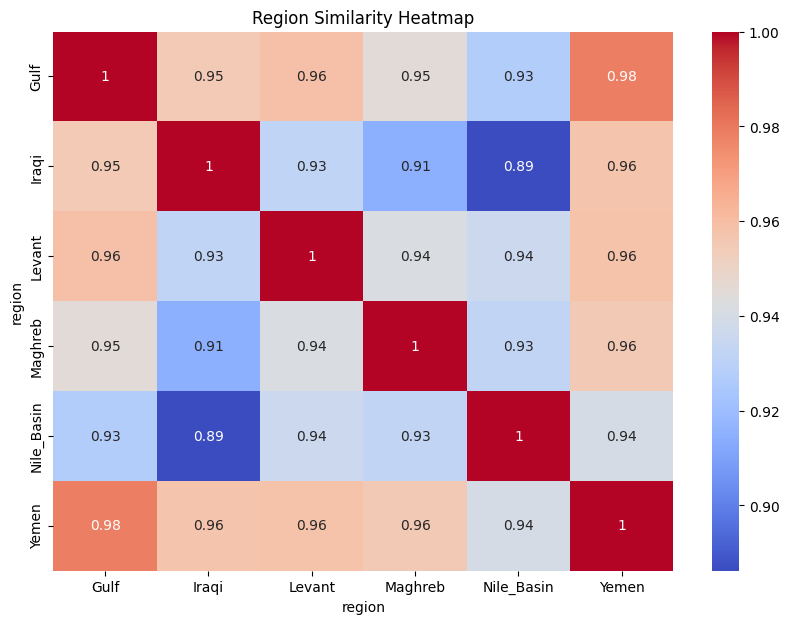

In [ ]:
# إنشاء نسخة من البيانات الأصلية
df = DF_Train.copy()

# تحويل قائمة التوكنز إلى نص مفرد لكل سجل
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# تجميع النصوص حسب المنطقة
region_tokens = df.groupby('region')['tokens_str'].apply(lambda x: ' '.join(x)).reset_index()

# تطبيق TF-IDF لتحويل النصوص إلى تمثيل رقمي
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x)

# إنشاء مصفوفة TF-IDF للمناطق
tfidf_matrix = tfidf.fit_transform(region_tokens['tokens_str'])

# حساب التشابه بين المناطق باستخدام مقياس كوزاين
similarity_matrix = cosine_similarity(tfidf_matrix)

# تحويل مصفوفة التشابه إلى DataFrame لسهولة العرض
sim_df = pd.DataFrame(similarity_matrix, index=region_tokens['region'], columns=region_tokens['region'])

# عرض خريطة حرارية للتشابه بين المناطق
plt.figure(figsize=(10, 7))
sns.heatmap(sim_df, annot=True, cmap='coolwarm')
plt.title('Region Similarity Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


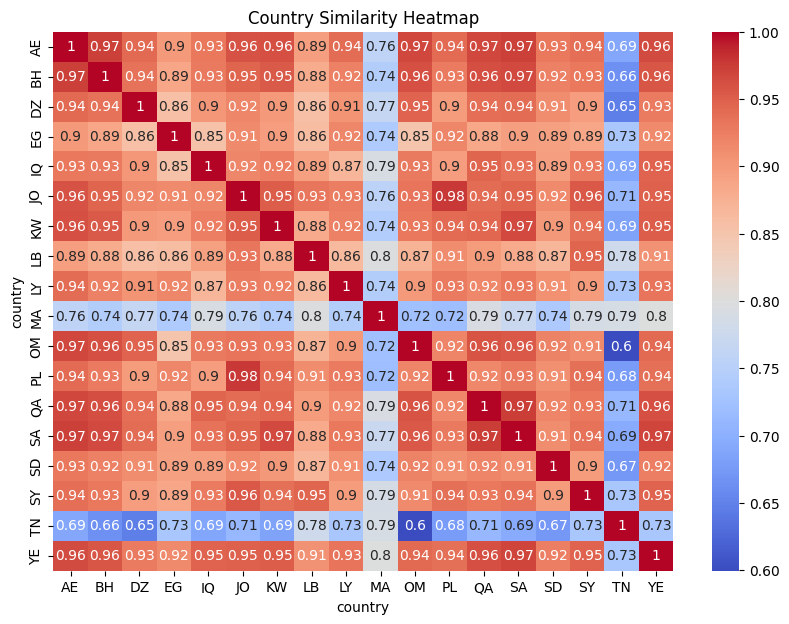

In [ ]:
# إنشاء نسخة من البيانات الأصلية
df = DF_Train.copy()

# تحويل قائمة التوكنز إلى نص مفرد لكل سجل
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# تجميع النصوص حسب الدولة
country_tokens = df.groupby('country')['tokens_str'].apply(lambda x: ' '.join(x)).reset_index()

# تطبيق TF-IDF لتحويل النصوص إلى تمثيل رقمي
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x)

# إنشاء مصفوفة TF-IDF للدول
tfidf_matrix = tfidf.fit_transform(country_tokens['tokens_str'])

# حساب التشابه بين الدول باستخدام مقياس كوزاين
similarity_matrix = cosine_similarity(tfidf_matrix)

# تحويل مصفوفة التشابه إلى DataFrame لسهولة العرض
sim_df = pd.DataFrame(similarity_matrix, index=country_tokens['country'], columns=country_tokens['country'])

# عرض خريطة حرارية للتشابه بين الدول
plt.figure(figsize=(10, 7))
sns.heatmap(sim_df, annot=True, cmap='coolwarm')
plt.title('Country Similarity Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


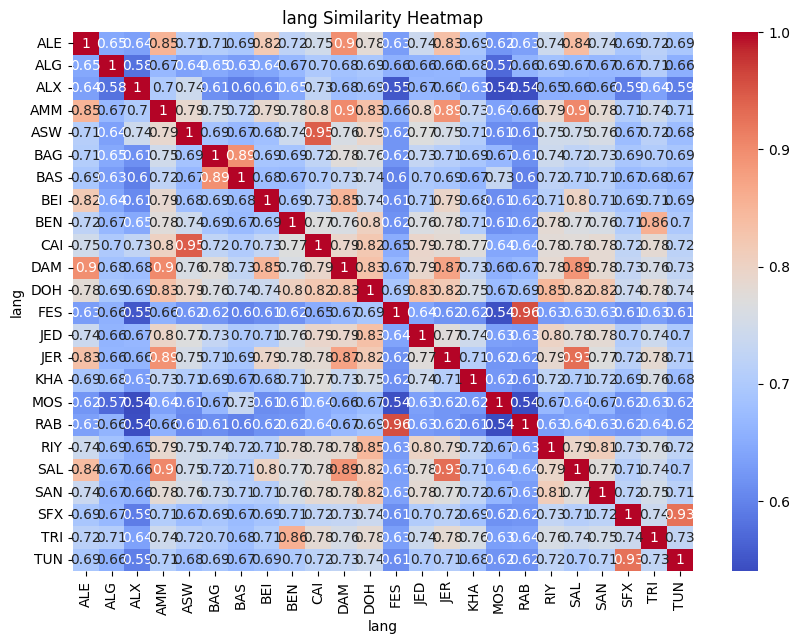

In [ ]:
# إزالة الصفوف التي تحتوي على قيم فارغة في عمود اللغة
df = df[df['lang'].notnull()]

# تحويل قائمة التوكنز إلى نص مفرد لكل سجل
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# تجميع النصوص حسب اللغة
lang_tokens = df.groupby('lang')['tokens_str'].apply(lambda x: ' '.join(x)).reset_index()

# تطبيق TF-IDF لتحويل النصوص إلى تمثيل رقمي
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x)

# إنشاء مصفوفة TF-IDF للغات
tfidf_matrix = tfidf.fit_transform(lang_tokens['tokens_str'])

# حساب التشابه بين اللغات باستخدام مقياس كوزاين
similarity_matrix = cosine_similarity(tfidf_matrix)

# تحويل مصفوفة التشابه إلى DataFrame لسهولة العرض
sim_df = pd.DataFrame(similarity_matrix, index=lang_tokens['lang'], columns=lang_tokens['lang'])

# عرض خريطة حرارية للتشابه بين اللغات
plt.figure(figsize=(10, 7))
sns.heatmap(sim_df, annot=True, cmap='coolwarm')
plt.title('lang Similarity Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


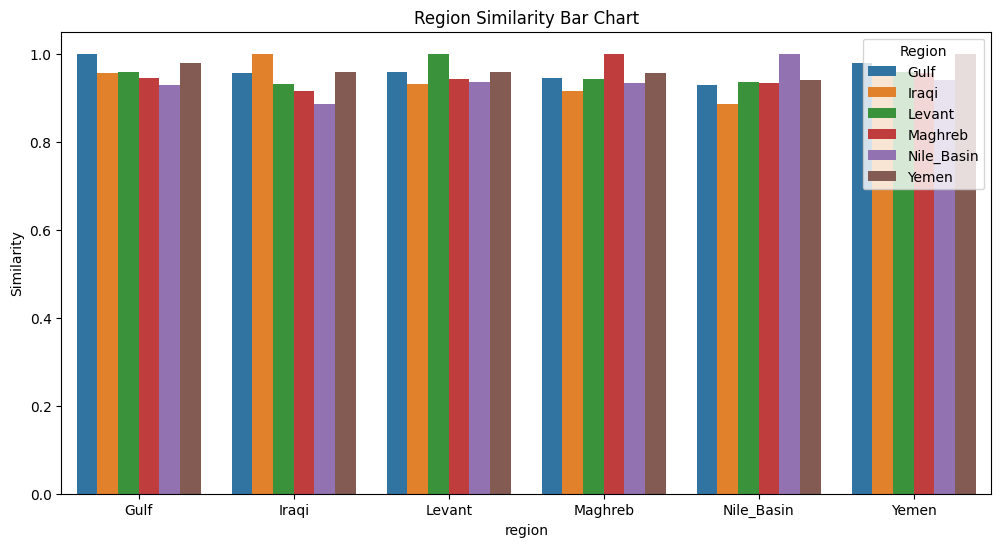

In [ ]:
# إنشاء نسخة من بيانات التدريب
df = DF_Train.copy()

# تحويل قائمة التوكنز إلى نص مفرد لكل سجل
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# تجميع النصوص حسب المنطقة
region_tokens = df.groupby('region')['tokens_str'].apply(lambda x: ' '.join(x)).reset_index()

# تطبيق TF-IDF لتحويل النصوص إلى تمثيل رقمي
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x)

# إنشاء مصفوفة TF-IDF للمناطق
tfidf_matrix = tfidf.fit_transform(region_tokens['tokens_str'])

# حساب التشابه بين المناطق باستخدام مقياس كوزاين
similarity_matrix = cosine_similarity(tfidf_matrix)

# تحويل مصفوفة التشابه إلى DataFrame لسهولة العرض
sim_df = pd.DataFrame(similarity_matrix, index=region_tokens['region'], columns=region_tokens['region'])

# تحويل المصفوفة إلى تنسيق مناسب للمخطط البياني
sim_melt = sim_df.reset_index().melt(id_vars='region', var_name='Region', value_name='Similarity')

# رسم مخطط بياني من نوع الأعمدة لعرض التشابه بين المناطق
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='Similarity', hue='Region', data=sim_melt)
plt.title('Region Similarity Bar Chart')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


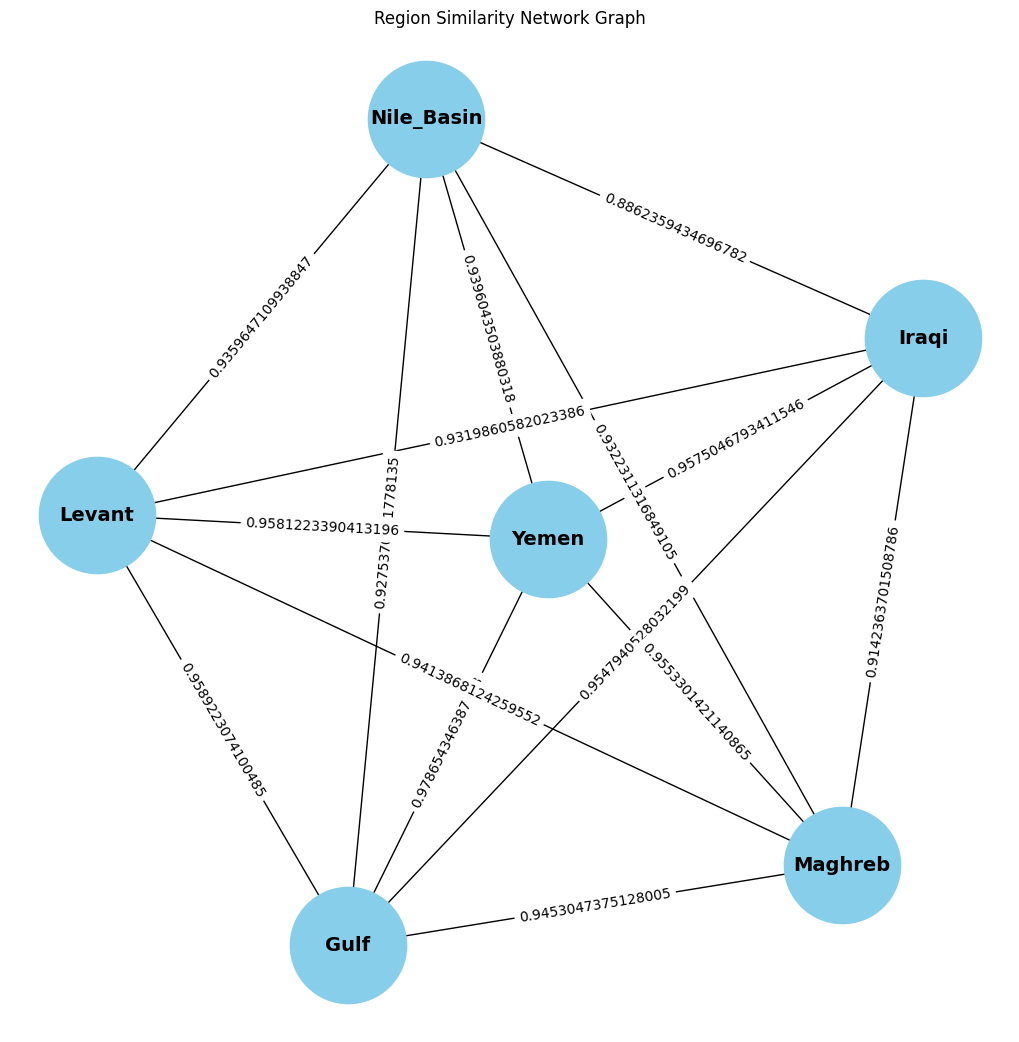

In [ ]:
# إنشاء نسخة من بيانات التدريب
df = DF_Train.copy()

# تحويل قائمة التوكنز إلى نص مفرد لكل سجل
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# تجميع النصوص حسب المنطقة
region_tokens = df.groupby('region')['tokens_str'].apply(lambda x: ' '.join(x)).reset_index()

# تطبيق TF-IDF لتحويل النصوص إلى تمثيل رقمي
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x)

# إنشاء مصفوفة TF-IDF للمناطق
tfidf_matrix = tfidf.fit_transform(region_tokens['tokens_str'])

# حساب التشابه بين المناطق باستخدام مقياس كوزاين
similarity_matrix = cosine_similarity(tfidf_matrix)

# إنشاء شبكة غير موجهة لتمثيل التشابه بين المناطق
G = nx.Graph()

# إضافة الحواف بين المناطق التي تتشابه بدرجة أكبر من العتبة
for i, region in enumerate(region_tokens['region']):
    for j in range(i + 1, len(region_tokens['region'])):
        sim_score = similarity_matrix[i, j]
        if sim_score > 0.1:  # إضافة شرط لتصفية التشابهات المنخفضة
            G.add_edge(region, region_tokens['region'][j], weight=sim_score)

# تخطيط الشبكة باستخدام تصميم مرن
pos = nx.spring_layout(G)

# رسم الشبكة مع العناوين والعلاقات بين المناطق
plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_size=7000, node_color='skyblue', font_size=14, font_weight='bold')

# إضافة تسميات على الحواف لتمثيل قيم التشابه
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)


plt.title('Region Similarity Network Graph')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-59-651a085737af>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(mds_df.Dim1[line], mds_df.Dim2[line], mds_df.index[line], horizontalalignment='left', size='medium', color='black')


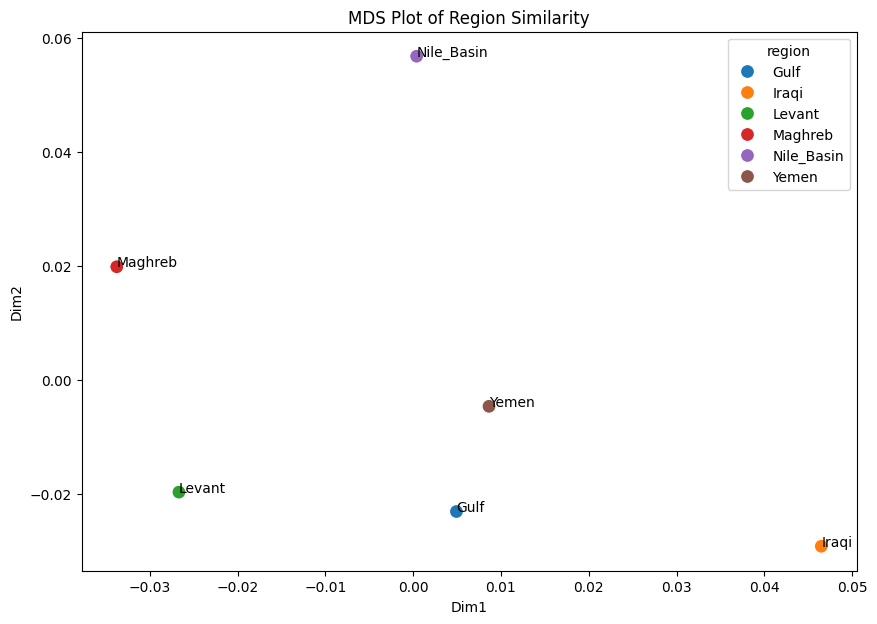

In [ ]:
# إنشاء نسخة من بيانات التدريب
df = DF_Train.copy()

# تحويل قائمة التوكنز إلى نص مفرد لكل سجل
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x))

# تجميع النصوص حسب المنطقة
region_tokens = df.groupby('region')['tokens_str'].apply(lambda x: ' '.join(x)).reset_index()

# تطبيق TF-IDF لتحويل النصوص إلى تمثيل رقمي
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(), preprocessor=lambda x: x)

# إنشاء مصفوفة TF-IDF للمناطق
tfidf_matrix = tfidf.fit_transform(region_tokens['tokens_str'])

# حساب التشابه بين المناطق باستخدام مقياس كوزاين
similarity_matrix = cosine_similarity(tfidf_matrix)

# تطبيق تحليل الأبعاد متعددة (MDS) لتحويل المصفوفة إلى بعدين
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# تطبيق MDS باستخدام مسافة (1 - التشابه) لتمثيل التشابه كمسافة
mds_result = mds.fit_transform(1 - similarity_matrix)  # ديسيميلاريتي هو 1 - التشابه

# تحويل النتيجة إلى DataFrame لتمثيل الأبعاد الجديدة
mds_df = pd.DataFrame(mds_result, index=region_tokens['region'], columns=['Dim1', 'Dim2'])

# رسم المخطط
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Dim1', y='Dim2', data=mds_df, s=100, hue=mds_df.index)

# إضافة تسميات لكل نقطة في المخطط لتمثيل اسم المنطقة
for line in range(0, mds_df.shape[0]):
    plt.text(mds_df.Dim1[line], mds_df.Dim2[line], mds_df.index[line], horizontalalignment='left', size='medium', color='black')

plt.title('MDS Plot of Region Similarity')
plt.show()


## [2.7]

In [ ]:
# تنزيل ملف من الإنترنت إلى مجلد Google Drive
!cp /content/drive/MyDrive/Folder/arabic_corpus.zip arabic_corpus.zip

# فك ضغط الملف الذي تم تنزيله
!unzip arabic_corpus.zip

# فك ضغط ملف .xz وتحويله إلى النص الأصلي
!xz -d vocab.txt.xz

# فتح الملف وقراءة الكلمات فيه، ثم تخزينها في مجموعة منعًا للتكرار
with open("vocab.txt", "r", encoding="utf-8") as f:
    vocab = set(line for line in f)

# إنشاء قائمة تحتوي على الكلمات بدون أرقام
glove_vocabulary = []

# إزالة الأرقام من الكلمات في المجموعة
for word in vocab:
    glove_vocabulary.append(re.sub(r"\d+", "", word))

Archive:  arabic_corpus.zip
 extracting: arabic_corpus.xz        
 extracting: vocab.txt.xz            
 extracting: vectors.txt.xz          
 extracting: arabic_corpus_archive.torrent  
 extracting: arabic_corpus_meta.xml  
 extracting: arabic_corpus_files.xml  
 extracting: arabic_corpus_meta.sqlite  


In [ ]:
all_words = [word for text in DF_Train['sent'] for word in text.split()]

oov_words = set(all_words) - set(glove_vocabulary)

oov_ratio = len(oov_words) / len(all_words)
print(f'نسبة الكلمات الخارجة عن المفردات: {oov_ratio:.2%}')

نسبة الكلمات الخارجة عن المفردات: 12.88%


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz
!gunzip cc.ar.300.vec.gz

--2025-01-03 22:39:45--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.ar.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.164.78.121, 18.164.78.81, 18.164.78.128, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.164.78.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1272365870 (1.2G) [binary/octet-stream]
Saving to: ‘cc.ar.300.vec.gz’

cc.ar.300.vec.gz    100%[===================>]   1.18G  49.0MB/s    in 24s     

2025-01-03 22:40:09 (49.9 MB/s) - ‘cc.ar.300.vec.gz’ saved [1272365870/1272365870]



In [ ]:
# تحميل نموذج fastText باستخدام KeyedVectors
fasttext_model = KeyedVectors.load_word2vec_format('cc.ar.300.vec', binary=False)

# استخراج جميع الكلمات من النصوص في DF_Train
all_words = [word for text in DF_Train['sent'] for word in text.split()]

# استخراج الكلمات التي لا توجد في المفردات الخاصة بـ fastText
oov_words = [word for word in all_words if word not in fasttext_model.key_to_index]

# حساب نسبة الكلمات الخارجة عن المفردات
oov_ratio = len(oov_words) / len(all_words)

# طباعة النتيجة
print(f'نسبة الكلمات الخارجة عن المفردات: {oov_ratio:.2%}')


نسبة الكلمات الخارجة عن المفردات: 19.17%


In [ ]:
!wget http://vectors.nlpl.eu/repository/20/136.zip
!unzip 136.zip

--2025-01-03 22:52:07--  http://vectors.nlpl.eu/repository/20/136.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.200, 2001:700:112::200
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.200|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433050065 (413M) [application/zip]
Saving to: ‘136.zip’

136.zip             100%[===================>] 412.99M  24.8MB/s    in 18s     

2025-01-03 22:52:25 (23.4 MB/s) - ‘136.zip’ saved [433050065/433050065]

Archive:  136.zip
  inflating: char.dic                
  inflating: config.json             
  inflating: encoder.pkl             
  inflating: meta.json               
  inflating: README                  
  inflating: token_embedder.pkl      
  inflating: word.dic                


In [ ]:
# دالة لتحميل الكلمات من ملف قاموس وتخزينها كمجموعة
def load_words_from_dic(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:  # تحديد الترميز لقراءة النصوص العربية
        words = [line.split('\t')[0] for line in f]  # استخراج الكلمة الأولى من كل سطر
    return set(words)  # إعادة الكلمات كمجموعة للحصول على بحث سريع

# تحميل مفردات القاموس من الملف word.dic
word2vec_model_vocabulary = set(load_words_from_dic("word.dic"))

# استخراج جميع الكلمات من النصوص في DF_Train
all_words = [word for text in DF_Train['sent'] for word in text.split()]

# استخراج الكلمات التي لا توجد في القاموس
oov_words = [word for word in all_words if word not in word2vec_model_vocabulary]

# حساب نسبة الكلمات الخارجة عن المفردات
oov_ratio = len(oov_words) / len(all_words)

# طباعة النتيجة
print(f'نسبة الكلمات الخارجة عن المفردات: {oov_ratio:.2%}')


نسبة الكلمات الخارجة عن المفردات: 32.70%


# مهمة 03 : تنظيف وتوحيد النص

normalization and cleaning Text

## [3.1]


معالجة نصوص عربية بإزالة الأخطاء الشائعة، الروابط، الرموز غير العربية، الأرقام، وتوحيد الفراغات

In [ ]:
# تصحيح الأخطاء الكتابية الشائعة في النصوص العربية
def fix_typing(text):
  # استبدال الحروف المشابهة بـ "ا"
  text = re.sub("[إأٱآا]", "ا", text)
  # استبدال الحروف المختلفة بنظيراتها الصحيحة
  text = re.sub("ي", "ي", text)
  text = re.sub("ه", "ه", text)
  text = re.sub("ة", "ة", text)
  text = re.sub("ى", "ى", text)
  text = re.sub("يہ", "ية", text)
  text = re.sub("هہ", "هم", text)
  text = re.sub("گ", "ك", text)
  text = re.sub("الله", "الله", text)
  text = re.sub("ىى", "ى", text)
  text = re.sub("ةة", "ة", text)
  text = re.sub("ااا", "ا", text)
  text = re.sub("لہ", "له", text)
  # تقليص الحروف المكررة إلى حرف واحد
  text = re.sub(r'(ي{3,})', r'ي', text)
  return text

# إزالة الروابط من النص
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# إزالة الرموز الخاصة من النص
def remove_marks(text):
  # نمط الرموز التي سيتم إزالتها
  pattern = r"[*:!?@)#(€+_&-.,،/❥࿐~`|•√π÷×§∆€¥$¢]"
  # استبدال الرموز بمسافات
  text = re.sub(pattern, " ", text)

# إزالة أي شيء غير عربي من النص
def remove_all_non_arabic(text):
  # استخدام تعبير عادي لإزالة النصوص غير العربية
  pattern = regex.compile(r'[^\p{Arabic}\p{L}\p{N}\s]')
  # استبدال أي شيء غير عربي بالفراغ
  text = pattern.sub(r'', text)
  return text

# إزالة الأرقام من النص
def remove_numbers(text):
  return re.sub(r"\d+", " ", text)

# توحيد الفراغات الزائدة إلى فراغ واحد
def normalize_whitespace(text):
  return re.sub(r"\s+", " ", text).strip()

# تقسيم النص إلى كلمات (توكنز)
def tokenize_text(text):
  return word_tokenize(text)

# تعريف دوال المعالجة
funcs = {
    "fix_typing": fix_typing,
    "remove_urls": remove_urls,
    "remove_marks": remove_marks,
    # "remove_all_non_arabic": remove_all_non_arabic,
    "remove_numbers": remove_numbers,
    "normalize_whitespace": normalize_whitespace,
}

# تطبيق الدوال على النصوص وعرض النتائج
for func_name, func in funcs.items():
    print(func_name, '\n')
    for i in range(5):
        print(func(DF_Train['sent'][i]))
    print('\n',30*"___",'\n')


fix_typing 


  لما اسمع احد يقول "وش كنت بقول" تلقائي لساني يقول نستني عيونك ☺̷*beer* ذابحتني الرومنسية ☻♡♡
! . .  اعطوهم / ..  القليل من وقتكم  وصلّوا عليهم .. صلى الله عليه وسلمّ ،  ❥࿐ (f)
! نضف مكان مابهدلت..
! الكذب مش شطاره..
! الصوت العالى وقت الخلافات مش رجوله..
! الاعتراف بالخطا مش ضعف..
! وطى صوتك وانت بتتكلم مع حد كبير..
! اسمها حضرتك مش انت..
! ماتبقاش قاعد وسايب حد كبير واقف..
! اسمها نعم مش ايه ...
! متمدش ايدك على بنت ...
! البنطلون الساقط مش موضه..
!!!!!!! الكبير كبير حتى لو ماطلع فالصوره https://t.co/0xsk0w1KsU
!!!!!!!!!!! شو اللي صار من دقيقة بمباراة الريال واليوفي؟؟؟!!

 __________________________________________________________________________________________ 

remove_urls 


  لما اسمع احد يقول "وش كنت بقول" تلقائي لساني يقول نستني عيونك ☺̷*beer* ذابحتني الرومنسيہ ☻♡♡
! . .  أعطوهہ / ..  القليل من وقتگم  وصلّوا عليهہ .. صلىى الله عليه وسلمّ ،  ❥࿐ (f)
! نضف مكان مابهدلت..
! الكذب مش شطاره..
! الصوت العالى وقت الخلافات مش رجوله..
! الأعتراف بالخطأ مش ضعف..
! وطى صوتك

## [3.2]

In [ ]:
# دالة لتنظيف النصوص عبر تطبيق دوال متعددة بشكل متسلسل
def clean_text(text, funcs= [
      fix_typing,              # تصحيح الأخطاء الكتابية
      remove_urls,             # إزالة الروابط
      # remove_marks,
      remove_all_non_arabic,   # إزالة النصوص غير العربية
      # remove_numbers,
      normalize_whitespace     # توحيد الفراغات الزائدة
    ]):
    # تطبيق كل دالة من القائمة على النص
    for func in funcs:
        text = func(text)
    return text

# قائمة الدوال التي سيتم تطبيقها
funcs = [
    fix_typing,              # تصحيح الأخطاء الكتابية
    remove_urls,             # إزالة الروابط
    remove_all_non_arabic,   # إزالة النصوص غير العربية
    # remove_numbers,
    normalize_whitespace     # توحيد الفراغات الزائدة
    ]

# اختيار نص عشوائي من البيانات
main_text = DF_Train["sent"][523428]
# عرض النص الأصلي قبل المعالجة
print(main_text)
print(30*"___")
# تنظيف النص باستخدام الدوال المحددة
text = clean_text(main_text)
# عرض النص بعد المعالجة
print(text)


🧡. QT

اكتر شي فاقدينوا هالفترة؟
__________________________________________________________________________________________
QT اكتر شي فاقدينوا هالفترة


## [3.3]

In [ ]:
# تحميل مكتبة 'punkt_tab' من NLTK الخاصة بالتقسيم النصي
nltk.download('punkt_tab')

# نسخ البيانات الأصلية لإنشاء نسخة نظيفة
Clean_DF_Train = DF_Train.copy()

# تطبيق دالة التنظيف على العمود 'sent' لتوليد النصوص النظيفة
Clean_DF_Train['clean_text'] = DF_Train['sent'].apply(lambda x: clean_text(x, funcs))

# تقسيم النصوص النظيفة إلى توكنز (كلمات) باستخدام دالة 'tokenize_text'
Clean_DF_Train['tokens'] = Clean_DF_Train['clean_text'].apply(tokenize_text)

# دمج جميع التوكنز من جميع النصوص في قائمة واحدة
all_tokens = [token for sublist in Clean_DF_Train['tokens'] for token in sublist]

# حساب إجمالي عدد التوكنز في جميع النصوص
total_tokens = len(all_tokens)

# حساب عدد الكلمات الفريدة (غير المتكررة) في النصوص
unique_words = len(set(all_tokens))

print("Total number of tokens:", total_tokens)
print("Number of unique words:", unique_words)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Total number of tokens: 6687218
Number of unique words: 626407


## [3.4]

In [ ]:
# تخزين الشكل الأصلي للبيانات قبل تنظيف النصوص
Before_shape = Clean_DF_Train.shape

# تصفية البيانات للتأكد من أن النصوص نظيفة ويجب أن تحتوي على أكثر من 5 أحرف
DF_Train = DF_Train[Clean_DF_Train['clean_text'].str.len() > 5]

# تخزين الشكل الجديد بعد التصفية
After_shape = Clean_DF_Train.shape

# طباعة التغير في الشكل بعد التصفية
print(Before_shape, After_shape)

# دمج جميع التوكنز من النصوص النظيفة بعد التصفية في قائمة واحدة
all_tokens = [token for sublist in Clean_DF_Train['tokens'] for token in sublist]

# حساب إجمالي عدد التوكنز في جميع النصوص
total_tokens = len(all_tokens)

# حساب عدد الكلمات الفريدة (غير المتكررة) في النصوص
unique_words = len(set(all_tokens))

print("Total number of tokens:", total_tokens)
print("Number of unique words:", unique_words)


(523452, 9) (523452, 9)
Total number of tokens: 6687218
Number of unique words: 626407


In [ ]:
def clean_df(df):
  # إنشاء نسخة من DataFrame لتجنب تعديل البيانات الأصلية
  temp = df.copy()

  # تطبيق وظيفة clean_text على كل نص في العمود 'sent'
  temp['clean_text'] = temp['sent'].apply(lambda x: clean_text(x))

  # تصفية النصوص التي تحتوي على أكثر من 5 أحرف فقط
  temp = temp[temp['clean_text'].str.len() > 5]

  # إرجاع DataFrame بعد التنظيف
  return temp


In [ ]:
Clean_DF_Train['clean_text'].tail(50)

523402    والله دايما بحكي يا عمي بلا من الثوم والبصل با...
523403                               ال ده بجد ولا فوتو شوب
523404      رحمها الله رحمة واسعة وانا لله وانا اليه راجعون
523405        ادعولي يفتح مخي والله شايفه اللاب توب زوالاات
523406                            ديمه ادير في العاب و حصلة
523407    ضاقت فيني الوسيعة ومب قادر اسكت تكلم طلعت اللي...
523408                    كلمة وحدة متوصفش لكن ح نقول جميلة
523409    من احسن الناس اللي طلعت بيهم هنا و من قبل كانت...
523410                        ديمه موجودة في تايم و في حالك
523411              ماليش واجد متابعك و الواضح انك مش هادية
523412    كل نبضه في خــفوقي لك تبيك ولا حـــياة لخـــاف...
523413    يسعد مساء الناس الراقيه اللي لهم بالقلب قدر وم...
523414    اصعب شعور انك ما زلت تعز انسان كسر بخاطرك الف مرة
523415    ٠٠٠ انت لو تدري عن شعوري تجاهك تترك الدنيا على...
523416    ٠٠٠ العمر من دون وصلك شيء مايسوى وصلك عطى كل ل...
523417    ٠٠٠ فاقده حنانك طيبتك فاقده عيونك ضحكتك كلشي ك...
523418    ٠٠٠ متعوده لا ضاقت الدنيا اقول ادري اني صح في ...
523419    ٠٠٠ مليانه ذبول من اللي كانوا ورد بصدري ٠٠٠ قر...
523420    ٠٠٠ واكتم بقلبي شي ماودي اطريه لامن طريتہ كل م...
523421    بقالهم كام الف سنة بيمشوا على ايديهم ورجليهم ع...
523422                       ماخلاص بقى يا شبح احنا متلصمين
523423    انتي ليش ما تشاركين معانا انا دكتور انت قلت بت...
523424    حبيبتي فيه واحد غيري بحياتك شفيكم اليوم كلكم ن...
523425    شفيج زعلانه اسال روحك وانا قاعد اسال منو بالله...
523426                     عندي ملاحظة صغيره الله يخليها لك
523427                اشلونج تمام ليش ردك بارد تمام ع الفحم
523428                          QT اكتر شي فاقدينوا هالفترة
523429                    QT اكتر غنية معلقين عليها هالفترة
523430                          QT اكمل الفراغ بحبوبحبها بس
523431                                QT غنية ما بتموت ابدا
523432    QT هل انت مع انو البنتالشب ضروري يتزوجوا وهالش...
523433    QT هل انتم مع اللي بيقولوا انو مقبرة الحب هو ا...
523434       QT اسوا مسلسلفيلم حضرتوه وما بتنصحونا فيه ابدا
523435             QT اكتر محل بتحبوا تشتروا من عندو تيابكم
523436                  QT اكتر مطرح بترتاحوا فيه غير البيت
523437    QT انت من النوع اذا ما ارتحت بوجود شخص او اشخا...
523438                  QT تغير حدا عزيز عليك فجاة شو بتعمل
523439    QT تفاصيل موجودة بحياتك مسهلة عليك عيشتك مثلا ...
523440     QT حققتوا شي حلم من احلام طفولتكم واذا ايه شو هو
523441        QT شاركونا بمقطع اقوى لحن موسيقى بالنسبة الكم
523442               QT شو هي الغلطة اللي بتسميها غلطة عمرك
523443                  QT من بعد عائلتك مين اهم شخص بحياتك
523444    كلمة اعجبتني اول البنت كانت تطلع لامها تعرف تغ...
523445                                  انا هلا كتير مبسوطه
523446    الدنيا عامله حالها حلوة وانا عامله حالي مبسوطة...
523447    مساء الخير بليز ادخلو البيج وشاركوني ازا عجبتك...
523448    دايما كل ما اشتري علبة كولا وافتحها بشوف شو رب...
523449                                      ازا من هلا بضحك
523450    السلام عليكم بشوو هلا طلعت نتيجة القـايني و صف...
523451    البيان الاول لمشـروع تحويل التراث السمعي والمـ...
Name: clean_text, dtype: object

# مهمة 04  : بناء النموذج المرجعي

Model Baseline

## [4.1]


In [ ]:
# تحويل بيانات الجمل من عمود 'الجملة' إلى قائمة تمثل المدخلات التدريبية
X_Train = DF_Train['الجملة'].to_list()

# تحويل بيانات البلدان من عمود 'الدولة' إلى قائمة تمثل التصنيفات التدريبية
y_Train = DF_Train['الدولة'].to_list()

# تحويل بيانات الجمل من عمود 'الجملة' في بيانات الاختبار إلى قائمة تمثل المدخلات الاختبارية
X_Test = DF_Test['الجملة'].to_list()

# تحويل بيانات البلدان من عمود 'الدولة' في بيانات الاختبار إلى قائمة تمثل التصنيفات الاختبارية
y_Test = DF_Test['الدولة'].to_list()

# تحويل بيانات الجمل من عمود 'الجملة' في بيانات التحقق إلى قائمة تمثل المدخلات للتحقق
X_Validation = DF_Validation['الجملة'].to_list()

# تحويل بيانات البلدان من عمود 'الدولة' في بيانات التحقق إلى قائمة تمثل التصنيفات للتحقق
y_Validation = DF_Validation['الدولة'].to_list()


## [4.2]

In [ ]:
# دمج بيانات التدريب مع بيانات التحقق لتوسيع مجموعة التدريب
X_T_V = X_Train + X_Validation
y_T_V = y_Train + y_Validation

# إعادة تعيين بيانات التدريب لتكون مجموعة التدريب فقط
X_T_V = X_Train
y_T_V = y_Train

# تحويل النصوص إلى تمثيل رقمي باستخدام تقنية (TF-IDF)
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_T_V)  # تدريب المحول على بيانات التدريب
X_test = tfidf.transform(X_Test)  # تحويل بيانات الاختبار باستخدام المحول المدرب

# (Multinomial Naive Bayes)إنشاء نموذج التصنيف باستخدام خوارزمية
mission_4_2 = MultinomialNB()
mission_4_2.fit(X_train, y_T_V)  # تدريب النموذج على بيانات التدريب

# إجراء التنبؤات باستخدام النموذج المدرب على بيانات الاختبار
predictions = mission_4_2.predict(X_test)

# حساب دقة النموذج
mission_4_2_accuracy = accuracy_score(y_Test, predictions)
# حساب مقياس (f1) لتقييم الأداء
mission_4_2_f1 = f1_score(y_Test, predictions, average='weighted')
# الحصول على تقرير التصنيف
mission_4_2_report = classification_report(y_Test, predictions)


print(f"الدقة: {mission_4_2_accuracy * 100:.2f}%\n")
print(f"مقياس f1: {mission_4_2_f1* 100:.2f}")
print("تقرير التصنيف:\n")
print(mission_4_2_report)


Accuracy: 48.54%

f1: 44.86
Classification Report:

              precision    recall  f1-score   support

          AE       0.91      0.24      0.38       516
          BH       0.95      0.23      0.36       515
          DZ       0.98      0.24      0.39       517
          EG       0.32      0.99      0.48      1730
          IQ       0.98      0.35      0.51       904
          JO       0.89      0.14      0.25       947
          KW       0.43      0.77      0.55       825
          LB       0.53      0.71      0.61       741
          LY       0.80      0.62      0.70      1116
          MA       0.83      0.65      0.73       626
          OM       1.00      0.14      0.24       375
          PL       0.44      0.61      0.51      1057
          QA       0.40      0.73      0.52       809
          SA       0.86      0.21      0.33       926
          SD       1.00      0.06      0.12       483
          SY       1.00      0.06      0.11       718
          TN       0.95      

## [4.3]

الدالة لتدريب وتقييم النموذج باستخدام البحث الشبكي واختبار الأداء باستخدام تحويل النصوص بالنسب المئوية مع نموذج بايز المتعدد

In [ ]:

def train_and_evaluate_model(X_train, y_train, X_test, y_test, param_grid, cv=4, alpha=1, return_model=False):
    # إنشاء الأنابيب التي تحتوي على تحويل النصوص باستخدام النسب المئوية واستخدام نموذج بايز المتعدد
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),  # تحويل النصوص إلى تمثيل رقمي باستخدام النسب المئوية
        ('clf', MultinomialNB(alpha=alpha))  # استخدام خوارزمية بايز المتعدد للتصنيف
    ])

    # استخدام البحث الشبكي لاختيار أفضل المعاملات بالنظر إلى شبكة المعاملات المحددة
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)  # تدريب النموذج على بيانات التدريب

    # الحصول على أفضل نموذج من البحث الشبكي
    pipeline = grid_search.best_estimator_
    # إجراء التنبؤات على بيانات الاختبار
    y_pred = pipeline.predict(X_test)
    # حساب الدقة
    accuracy = accuracy_score(y_test, y_pred)
    # حساب تقرير التصنيف
    report = classification_report(y_test, y_pred)
    # حساب مقياس (f1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # إذا تم طلب إعادة النموذج مع النتائج
    if return_model:
        return {
            "model":grid_search,  # إعادة النموذج المدرب مع أفضل المعاملات
            "accuracy": accuracy,  # إعادة الدقة
            "report": report,  # إعادة تقرير التصنيف
            "f1": f1,  # إعادة مقياس (f1)
            "best_params": grid_search.best_params_,  # إعادة أفضل المعاملات
            "pipeline": pipeline  # إعادة الأنبوب النهائي مع التحويل والنموذج
        }

    # إذا لم يتم طلب إعادة النموذج، فقط إرجاع النتائج
    return {
        "accuracy": accuracy,
        "report": report,
        "f1": f1,
        "best_params": grid_search.best_params_,
        "pipeline": pipeline
    }


## [4.4]

In [ ]:
# تنظيف بيانات التدريب والاختبار والتحقق من خلال تطبيق دالة التنظيف على كل مجموعة من البيانات
Clean_DF_Train = clean_df(DF_Train)  # تنظيف بيانات التدريب
Clean_DF_Test = clean_df(DF_Test)  # تنظيف بيانات الاختبار
Clean_DF_Validation = clean_df(DF_Validation)  # تنظيف بيانات التحقق


In [ ]:
# تحويل النصوص من كل مجموعة بيانات إلى قوائم وتحويل الفئات إلى قوائم أيضًا
X_Train = Clean_DF_Train['clean_text'].to_list()  # تحويل النصوص في بيانات التدريب إلى قائمة
y_Train = Clean_DF_Train['country_num'].to_list()  # تحويل الفئات في بيانات التدريب إلى قائمة
X_Test = Clean_DF_Test['clean_text'].to_list()  # تحويل النصوص في بيانات الاختبار إلى قائمة
y_Test = Clean_DF_Test['country_num'].to_list()  # تحويل الفئات في بيانات الاختبار إلى قائمة
X_Validation = Clean_DF_Validation['clean_text'].to_list()  # تحويل النصوص في بيانات التحقق إلى قائمة
y_Validation = Clean_DF_Validation['country_num'].to_list()  # تحويل الفئات في بيانات التحقق إلى قائمة


تحديد مجموعة من القيم التي سيتم تجربتها لاختيار أفضل نموذج باستخدام البحث الشبكي


In [ ]:
param_grid = {
    'tfidf__ngram_range': [(1, 1)],  # تحديد نطاق النغرام (كلمة واحدة)
    'tfidf__use_idf': [True],  # استخدام مؤشر التردد العكسي (IDF)
    'tfidf__norm': [None],  # عدم تطبيق أي نوع من التطبيع
    'tfidf__max_df': [1.0],  # عدم إزالة الكلمات ذات التردد المرتفع
    'tfidf__min_df': [1],  # الحد الأدنى لتكرار الكلمات
    'tfidf__max_features': [25000]  # الحد الأقصى لعدد الميزات
}

# استخدام بيانات التدريب والاختبار والبحث الشبكي لاختيار النموذج الأفضل
X_T_V = X_Train  # بيانات التدريب
y_T_V = y_Train  # فئات بيانات التدريب

# تدريب النموذج وتقييمه
mission_4_4 = train_and_evaluate_model(X_T_V, y_T_V, X_Test, y_Test, param_grid, 5, 5)

# طباعة نتائج التقييم
for item in mission_4_4.items():
  print(item[0])  # اسم العنصر
  print(item[1])  # القيمة المقابلة له


Fitting 5 folds for each of 1 candidates, totalling 5 fits
accuracy
0.5648188563945875
report
              precision    recall  f1-score   support

           0       0.35      0.42      0.38       375
           1       0.57      0.60      0.58       482
           2       0.49      0.35      0.41       924
           3       0.59      0.55      0.57       825
           4       0.48      0.56      0.51       807
           5       0.50      0.71      0.59       738
           6       0.53      0.38      0.44       945
           7       0.49      0.39      0.44       716
           8       0.71      0.67      0.69       900
           9       0.57      0.77      0.65       623
          10       0.75      0.79      0.77      1727
          11       0.52      0.47      0.49      1056
          12       0.38      0.41      0.39       394
          13       0.42      0.42      0.42       515
          14       0.54      0.53      0.54       515
          15       0.44      0.50      0.

## [4.5]

In [ ]:
# تحديد مجموعة من القيم التي سيتم تجربتها لاختيار أفضل نموذج باستخدام البحث الشبكي
param_grid = {
    'tfidf__ngram_range': [(1, 1)],  # تحديد نطاق النغرام (كلمة واحدة)
    'tfidf__use_idf': [True],  # استخدام مؤشر التردد العكسي (IDF)
    'tfidf__norm': [None],  # عدم تطبيق أي نوع من التطبيع
    'tfidf__max_df': [1.0],  # عدم إزالة الكلمات ذات التردد المرتفع
    'tfidf__min_df': [1],  # الحد الأدنى لتكرار الكلمات
    'tfidf__max_features': [35000]  # الحد الأقصى لعدد الميزات
}

X_T_V = X_Train
y_T_V = y_Train

# تدريب النموذج وتقييمه
mission_4_5 = train_and_evaluate_model(X_T_V, y_T_V, X_Test, y_Test, param_grid, 7, 7)

# طباعة نتائج التقييم
for item in mission_4_5.items():
  print(item[0])  # اسم العنصر
  print(item[1])  # القيمة المقابلة له


Fitting 7 folds for each of 1 candidates, totalling 7 fits
accuracy
0.5883166011930744
report
              precision    recall  f1-score   support

           0       0.40      0.46      0.43       375
           1       0.59      0.61      0.60       482
           2       0.51      0.38      0.44       924
           3       0.60      0.59      0.60       825
           4       0.49      0.58      0.53       807
           5       0.50      0.74      0.60       738
           6       0.56      0.40      0.47       945
           7       0.52      0.40      0.45       716
           8       0.75      0.67      0.71       900
           9       0.58      0.78      0.66       623
          10       0.76      0.81      0.78      1727
          11       0.53      0.49      0.51      1056
          12       0.43      0.42      0.43       394
          13       0.46      0.47      0.47       515
          14       0.60      0.56      0.58       515
          15       0.48      0.53      0.

## [4.6]

In [ ]:
# طباعة أفضل المعاملات التي تم العثور عليها من البحث الشبكي
print(mission_4_5["best_params"])


{'tfidf__max_df': 1.0,
 'tfidf__max_features': 35000,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': None,
 'tfidf__use_idf': True}

# مهمة 05 : التدريب باستخدام نماذج التعلم العميق

Deep learning

## The Comparison Dictionary example

In [ ]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

Filling the dictionary example

In [ ]:
# comparison_table['question_step_number'].append("3.5")
# comparison_table['model_name'].append('logistic_regression')
# comparison_table['features'].append('bag of words')
# comparison_table['model_parameters'].append('default')
# comparison_table['preprocessing_methods'].append("remove links")
# comparison_table['accuracy'].append(accuracy)
# comparison_table['balance_accuracy'].append(balance_accuracy_value)

## Real dictionary mission 4

In [ ]:
comparison_table['question_step_number'].append("4.2")
comparison_table['model_name'].append("Multinomial Bayes Naive")
comparison_table['features'].append('TfidfVectorizer default')
comparison_table['model_parameters'].append('default')
comparison_table['preprocessing_methods'].append("None")
comparison_table['accuracy'].append(mission_4_2_accuracy)
comparison_table['balance_accuracy'].append(mission_4_2_f1)

In [ ]:
comparison_table['question_step_number'].append("4.4")
comparison_table['model_name'].append("Multinomial Bayes Naive and GridSearch")
comparison_table['features'].append('TfidfVectorizer in max_features=25000')
comparison_table['model_parameters'].append('alpha=5, epoch=5')
comparison_table['preprocessing_methods'].append("remove non Arabic Or English, remove spaces, remove urls")
comparison_table['accuracy'].append(mission_4_4["accuracy"])
comparison_table['balance_accuracy'].append(mission_4_4["f1"])

In [ ]:
comparison_table['question_step_number'].append("4.5")
comparison_table['model_name'].append("Multinomial Bayes Naive and GridSearch")
comparison_table['features'].append('TfidfVectorizer max_features=35000')
comparison_table['model_parameters'].append('alpha=7, epoch=7')
comparison_table['preprocessing_methods'].append("remove non Arabic Or English, remove spaces, remove urls")
comparison_table['accuracy'].append(mission_4_5["accuracy"])
comparison_table['balance_accuracy'].append(mission_4_5["f1"])

In [ ]:
comparison_table_df = pd.DataFrame(comparison_table)
comparison_table_df.to_csv('/content/drive/MyDrive/Folder/comparison_table_df_4.csv', index=False)
comparison_table_df.head()

question_step_number                              model_name  \
0                  4.2                 Multinomial Bayes Naive   
1                  4.4  Multinomial Bayes Naive and GridSearch   
2                  4.5  Multinomial Bayes Naive and GridSearch   

                                features  model_parameters  \
0                TfidfVectorizer default           default   
1  TfidfVectorizer in max_features=25000  alpha=5, epoch=5   
2     TfidfVectorizer max_features=35000  alpha=7, epoch=7   

                               preprocessing_methods  accuracy  \
0                                               None  0.485378   
1  remove non Arabic Or English, remove spaces, r...  0.564819   
2  remove non Arabic Or English, remove spaces, r...  0.588317   

   balance_accuracy  
0          0.448618  
1          0.561617  
2          0.585033

## Real dictionary mission 5

In [ ]:
!cp /content/drive/MyDrive/Folder/mission_5_2_1.keras mission_5_2_1.keras
!cp /content/drive/MyDrive/Folder/mission_5_2_2.keras mission_5_2_2.keras
!cp /content/drive/MyDrive/Folder/mission_5_2_3.keras mission_5_2_3.keras

In [ ]:
comparison_table = {}

comparison_table['question_step_number'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['model_parameters'] = []
comparison_table['preprocessing_methods'] = []
comparison_table['accuracy'] = []
comparison_table['balance_accuracy'] = []

In [ ]:

Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

model = load_model('mission_5_2_1.keras')

X_Test_padded = pad_sequences(sequences_test, maxlen=max_length)

y_pred_prob = model.predict(X_Test_padded)
y_pred = y_pred_prob.argmax(axis=1)

y_true = pd.get_dummies(y_Test).values

f1 = f1_score(y_true.argmax(axis=1), y_pred, average='macro')
print(f"F1 Score: {f1}")

accuracy = accuracy_score(y_true.argmax(axis=1), y_pred)
print(f"Accuracy: {accuracy}")

comparison_table['question_step_number'].append("5.2.1")
comparison_table['model_name'].append("Sequential and CNN and embedding layer")
comparison_table['features'].append('Text Tokenizer Padded sequences Encoded labels')
comparison_table['model_parameters'].append('epoch=3 batch_size=32 embedding_dim_output=200')
comparison_table['preprocessing_methods'].append("remove non Arabic or English, remove links, remove spaces")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(f1)

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
F1 Score: 0.5753858652115026
Accuracy: 0.5903535573985159


In [ ]:

Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

model = load_model('mission_5_2_2.keras')

X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')

y_pred_prob = model.predict(X_Test_padded)
y_pred = y_pred_prob.argmax(axis=1)

y_true = pd.get_dummies(y_Test).values

f1 = f1_score(y_true.argmax(axis=1), y_pred, average='macro')
print(f"F1 Score: {f1}")

accuracy = accuracy_score(y_true.argmax(axis=1), y_pred)
print(f"Accuracy: {accuracy}")

comparison_table['question_step_number'].append("5.2.2")
comparison_table['model_name'].append("Sequential and CNN and glove vocab and static embedding layer")
comparison_table['features'].append('Text Tokenizer Padded sequences Encoded labels')
comparison_table['model_parameters'].append('epoch=4 batch_size=32 embedding_dim_output=256')
comparison_table['preprocessing_methods'].append("remove non Arabic or English, remove links, remove spaces")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(f1)

430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step
F1 Score: 0.27924530675102244
Accuracy: 0.3644696639022261


In [ ]:

Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

model = load_model('mission_5_2_3.keras')

X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')

y_pred_prob = model.predict(X_Test_padded)
y_pred = y_pred_prob.argmax(axis=1)

y_true = pd.get_dummies(y_Test).values

f1 = f1_score(y_true.argmax(axis=1), y_pred, average='macro')
print(f"F1 Score: {f1}")

accuracy = accuracy_score(y_true.argmax(axis=1), y_pred)
print(f"Accuracy: {accuracy}")

comparison_table['question_step_number'].append("5.2.3")
comparison_table['model_name'].append("Sequential and CNN and glove vocab and trainable embedding layer")
comparison_table['features'].append('Text Tokenizer Padded sequences Encoded labels')
comparison_table['model_parameters'].append('epoch=3 batch_size=32 embedding_dim_output=256')
comparison_table['preprocessing_methods'].append("remove non Arabic or English, remove links, remove spaces")
comparison_table['accuracy'].append(accuracy)
comparison_table['balance_accuracy'].append(f1)

430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
F1 Score: 0.623166139263682
Accuracy: 0.6411319656627382


In [ ]:
comparison_table_df = pd.DataFrame(comparison_table)
comparison_table_df.to_csv('/content/drive/MyDrive/Folder/comparison_table_df_mission_5.csv', index=False)
comparison_table_df.head()

question_step_number                                         model_name  \
0                5.2.1             Sequential and CNN and embedding layer   
1                5.2.2  Sequential and CNN and glove vocab and static ...   
2                5.2.3  Sequential and CNN and glove vocab and trainab...   

                                         features  \
0  Text Tokenizer Padded sequences Encoded labels   
1  Text Tokenizer Padded sequences Encoded labels   
2  Text Tokenizer Padded sequences Encoded labels   

                                 model_parameters  \
0  epoch=3 batch_size=32 embedding_dim_output=200   
1  epoch=4 batch_size=32 embedding_dim_output=256   
2  epoch=3 batch_size=32 embedding_dim_output=256   

                               preprocessing_methods  accuracy  \
0  remove non Arabic or English, remove links, re...  0.590354   
1  remove non Arabic or English, remove links, re...  0.364470   
2  remove non Arabic or English, remove links, re...  0.641132   

   balance_accuracy  
0          0.575386  
1          0.279245  
2          0.623166

## [5.1]

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

In [ ]:
X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

In [ ]:
vectorizer = TfidfVectorizer(max_features=35000)
X_train = vectorizer.fit_transform(X_Train)
X_test = vectorizer.transform(X_Test)
X_validation = vectorizer.transform(X_Validation)

In [ ]:
label_mapping = {label: idx for idx, label in enumerate(np.unique(y_Train))}
y_train_int = np.array([label_mapping[label] for label in y_Train])
y_test_int = np.array([label_mapping[label] for label in y_Test])
y_validation_int = np.array([label_mapping[label] for label in y_Validation])

y_train = tf.keras.utils.to_categorical(y_train_int, num_classes=18)
y_test = tf.keras.utils.to_categorical(y_test_int, num_classes=18)
y_validation = tf.keras.utils.to_categorical(y_validation_int, num_classes=18)

In [ ]:
mission_5_1 = Sequential()
mission_5_1.add(Dense(36, input_dim=X_train.shape[1], activation='relu'))
mission_5_1.add(Dense(18, activation='relu'))
mission_5_1.add(Dense(18, activation='relu'))
mission_5_1.add(Dense(18, activation='softmax'))
mission_5_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = mission_5_1.fit(X_train, y_train, epochs=4, batch_size=32, validation_data=(X_validation, y_validation))

results = mission_5_1.evaluate(X_test, y_test)
print(f"Loss: {results[0]}, Accuracy: {results[1]}")

results_df = pd.DataFrame({'Metric': ['Loss', 'Accuracy'], 'Value': results})
print(results_df)

mission_5_1.save('mission_5_1.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 300s 18ms/step - accuracy: 0.4419 - loss: 1.8328 - val_accuracy: 0.6253 - val_loss: 1.2425
Epoch 2/4
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - accuracy: 0.6518 - loss: 1.1433 - val_accuracy: 0.6423 - val_loss: 1.1807
Epoch 3/4
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.6955 - loss: 0.9885 - val_accuracy: 0.6424 - val_loss: 1.1793
Epoch 4/4
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.7292 - loss: 0.8802 - val_accuracy: 0.6373 - val_loss: 1.2077
430/430 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.6099 - loss: 1.3149
Loss: 1.372870922088623, Accuracy: 0.5865706205368042
     Metric     Value
0      Loss  1.372871
1  Accuracy  0.586571


In [ ]:
!cp mission_5_1.keras /content/drive/MyDrive/Folder

## [5.2]

### [5.2.1]

In [ ]:

Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length)
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length)
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length)

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

mission_5_2_1 = Sequential()
mission_5_2_1.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=200, input_length=max_length))
mission_5_2_1.add(Conv1D(18, 3, activation='relu'))
mission_5_2_1.add(MaxPooling1D(pool_size=3))
mission_5_2_1.add(Flatten())
mission_5_2_1.add(Dense(units=18, activation='relu'))
mission_5_2_1.add(Dense(units=num_classes, activation='softmax'))

mission_5_2_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mission_5_2_1.fit(X_Train_padded, y_Train_encoded, epochs=3, batch_size=32, validation_data=(X_Validation_padded, y_Validation_encoded))

loss, accuracy = mission_5_2_1.evaluate(X_Test_padded, y_Test_encoded)

mission_5_2_1.save('mission_5_2_1.keras')

print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 124869600 elements. This may consume a large amount of memory.
  warnings.warn(


16336/16336 ━━━━━━━━━━━━━━━━━━━━ 470s 28ms/step - accuracy: 0.4024 - loss: 1.9531 - val_accuracy: 0.6048 - val_loss: 1.3077
Epoch 2/3
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 499s 28ms/step - accuracy: 0.7546 - loss: 0.8545 - val_accuracy: 0.6213 - val_loss: 1.2907
Epoch 3/3
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 499s 28ms/step - accuracy: 0.8396 - loss: 0.5457 - val_accuracy: 0.6202 - val_loss: 1.3699
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6930 - loss: 1.1959
Accuracy: 59.04


In [ ]:
!cp mission_5_2_1.keras /content/drive/MyDrive/Folder

### [5.2.2]

In [ ]:
!cp /content/drive/MyDrive/Folder/arabic_corpus.zip arabic_corpus.zip
!unzip arabic_corpus.zip

!xz -d vocab.txt.xz
!xz -d vectors.txt.xz
# with open("vocab.txt", "r", encoding="utf-8") as f:
#     vocab = set(line for line in f)

# glove_vocabulary = []

# for word in vocab:
#     glove_vocabulary.append(re.sub(r"\d+", "", word))

Archive:  arabic_corpus.zip
replace arabic_corpus.xz? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
embeddings_index = {}
with open('vectors.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

word_index = {}
with open('vocab.txt') as f:
    for i, line in enumerate(f):
        word_index[line.strip()] = i+1
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

In [ ]:
X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

print('words number', len(tokenizer.word_index))

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

words number 624347


In [ ]:
embedding_dim = len(embeddings_index[next(iter(embeddings_index))])
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word.split(" ")[0])
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


1. filters يبحث كل فلتر عن مميزات معينة في كل نص فكل ما زاد عدد الفلاتر زادت الدقة

2. kernal يمثل الكرنال هو عدد العناصر الذي يعالجها بالمرة الواحدة

3. يمثل البول زايز (poolsize) الاجزاء من أجل اخد افضل قيمة بها يمثل طبقة فلاتين بتحويل البيانات إلى بعد واحد

In [ ]:

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

mission_5_2_2 = Sequential()
mission_5_2_2.add(embedding_layer)
mission_5_2_2.add(Conv1D(filters=24, kernel_size=6, activation='relu'))
mission_5_2_2.add(MaxPooling1D(pool_size=5))
mission_5_2_2.add(Flatten())
mission_5_2_2.add(Dense(units=18, activation='relu'))
mission_5_2_2.add(Dense(units=num_classes, activation='softmax'))

mission_5_2_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = mission_5_2_2.fit(X_Train_padded, y_Train_encoded, epochs=4, batch_size=24, validation_data=(X_Validation_padded, y_Validation_encoded))

loss, accuracy = mission_5_2_2.evaluate(X_Test_padded, y_Test_encoded)
print('Test Accuracy:', accuracy * 100)

mission_5_2_2.save('mission_5_2_2.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4
21781/21781 ━━━━━━━━━━━━━━━━━━━━ 493s 23ms/step - accuracy: 0.3111 - loss: 2.1762 - val_accuracy: 0.4354 - val_loss: 1.7975
Epoch 2/4
21781/21781 ━━━━━━━━━━━━━━━━━━━━ 502s 23ms/step - accuracy: 0.3844 - loss: 1.9379 - val_accuracy: 0.4502 - val_loss: 1.7529
Epoch 3/4
21781/21781 ━━━━━━━━━━━━━━━━━━━━ 493s 23ms/step - accuracy: 0.3983 - loss: 1.8953 - val_accuracy: 0.4586 - val_loss: 1.7318
Epoch 4/4
21781/21781 ━━━━━━━━━━━━━━━━━━━━ 500s 23ms/step - accuracy: 0.4022 - loss: 1.8822 - val_accuracy: 0.4610 - val_loss: 1.7174
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3505 - loss: 2.0586
Test Accuracy: 36.44696772098541


In [ ]:
!cp mission_5_2_2.keras /content/drive/MyDrive/Folder

### [5.2.3]

In [ ]:
!cp /content/drive/MyDrive/Folder/arabic_corpus.zip arabic_corpus.zip
!unzip arabic_corpus.zip

!xz -d vocab.txt.xz
!xz -d vectors.txt.xz
# with open("vocab.txt", "r", encoding="utf-8") as f:
#     vocab = set(line for line in f)

# glove_vocabulary = []

# for word in vocab:
#     glove_vocabulary.append(re.sub(r"\d+", "", word))

Archive:  arabic_corpus.zip
 extracting: arabic_corpus.xz        
 extracting: vocab.txt.xz            
 extracting: vectors.txt.xz          
 extracting: arabic_corpus_archive.torrent  
 extracting: arabic_corpus_meta.xml  
 extracting: arabic_corpus_files.xml  
 extracting: arabic_corpus_meta.sqlite  


In [ ]:
embeddings_index = {}
with open('vectors.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

word_index = {}
with open('vocab.txt') as f:
    for i, line in enumerate(f):
        word_index[line.strip()] = i+1

Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

In [ ]:
embedding_dim = len(embeddings_index[next(iter(embeddings_index))])
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word.split(" ")[0])
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
# del word_index
# del embeddings_index
# del tokenizer
# del sequences_train
# del sequences_test
# del sequences_val

In [ ]:
!cp mission_5_2_3.keras /content/drive/MyDrive/Folder

In [ ]:

embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)


mission_5_2_3 = Sequential()
mission_5_2_3.add(embedding_layer)
mission_5_2_3.add(Conv1D(18, 6, activation='relu'))
mission_5_2_3.add(MaxPooling1D(pool_size=5))
mission_5_2_3.add(Flatten())
mission_5_2_3.add(Dense(units=18, activation='relu'))
mission_5_2_3.add(Dense(units=num_classes, activation='softmax'))

mission_5_2_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = mission_5_2_3.fit(X_Train_padded, y_Train_encoded, epochs=3, batch_size=32, validation_data=(X_Validation_padded, y_Validation_encoded))

loss, accuracy = mission_5_2_3.evaluate(X_Test_padded, y_Test_encoded)
print('Test Accuracy:', accuracy * 100)  # Print accuracy as a percentage

mission_5_2_3.save('mission_5_2_3.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 159833088 elements. This may consume a large amount of memory.
  warnings.warn(


16336/16336 ━━━━━━━━━━━━━━━━━━━━ 602s 37ms/step - accuracy: 0.4178 - loss: 1.8604 - val_accuracy: 0.6559 - val_loss: 1.1316
Epoch 2/3
14544/16336 ━━━━━━━━━━━━━━━━━━━━ 1:04 36ms/step - accuracy: 0.7597 - loss: 0.8162

## [5.3]

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

Epoch 1/4
29041/29041 ━━━━━━━━━━━━━━━━━━━━ 216s 7ms/step - accuracy: 0.9300 - loss: 0.2383 - val_accuracy: 0.6857 - val_loss: 1.3734
Epoch 2/4
29041/29041 ━━━━━━━━━━━━━━━━━━━━ 270s 8ms/step - accuracy: 0.9302 - loss: 0.2342 - val_accuracy: 0.6847 - val_loss: 1.3907
Epoch 3/4
29041/29041 ━━━━━━━━━━━━━━━━━━━━ 248s 7ms/step - accuracy: 0.9302 - loss: 0.2352 - val_accuracy: 0.6847 - val_loss: 1.3899
Epoch 4/4
29041/29041 ━━━━━━━━━━━━━━━━━━━━ 273s 8ms/step - accuracy: 0.9299 - loss: 0.2357 - val_accuracy: 0.6838 - val_loss: 1.4011
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7045 - loss: 1.4073
Model accuracy on the test set after fine-tuning: 64.16%
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
              precision    recall  f1-score   support

           0       0.62      0.58      0.60       375
           1       0.71      0.54      0.61       482
           2       0.61      0.46      0.52       924
           3       0.60      0.69      0.65       825
           4       0.47

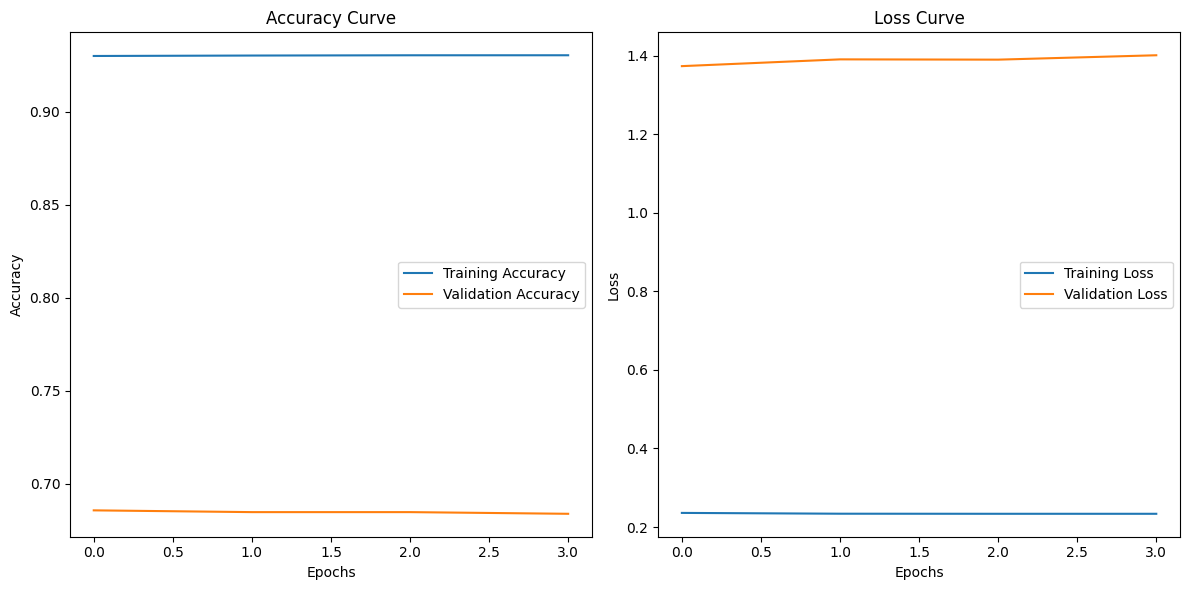

In [ ]:
model = load_model('mission_5_2_3.keras')


for layer in model.layers[:-1]:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=5e-3), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_Train_padded, y_Train_encoded, epochs=4, batch_size=24, validation_data=(X_Validation_padded, y_Validation_encoded))

loss, accuracy = model.evaluate(X_Test_padded, y_Test_encoded)
print(f"Model accuracy on the test set after fine-tuning: {accuracy * 100:.2f}%")

y_pred = model.predict(X_Test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_Test_encoded, axis=1), y_pred_classes))
model.save('mission_5_3_1.keras')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
!cp mission_5_3_1.keras /content/drive/MyDrive/Folder

Epoch 1/2
65342/65342 ━━━━━━━━━━━━━━━━━━━━ 268s 4ms/step - accuracy: 0.1454 - loss: 5.1220 - val_accuracy: 0.4184 - val_loss: 1.9309
Epoch 2/2
65342/65342 ━━━━━━━━━━━━━━━━━━━━ 297s 4ms/step - accuracy: 0.5436 - loss: 1.5377 - val_accuracy: 0.4471 - val_loss: 1.8719
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4294 - loss: 1.9280
Model accuracy on the test set after fine-tuning: 40.00%
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.29      0.19      0.23       375
           1       0.56      0.21      0.31       482
           2       0.27      0.27      0.27       924
           3       0.37      0.44      0.40       825
           4       0.30      0.41      0.34       807
           5       0.31      0.58      0.40       738
           6       0.31      0.24      0.27       945
           7       0.38      0.11      0.17       716
           8       0.63      0.32      0.43       900
           9       0

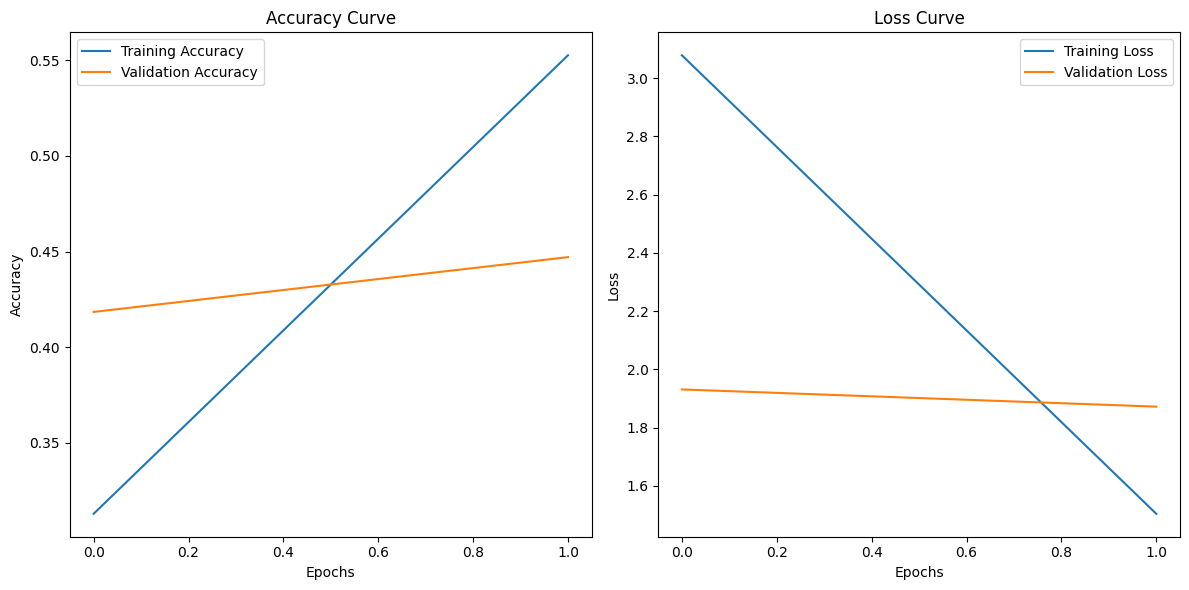

In [ ]:
model = load_model('mission_5_2_1.keras')


for layer in model.layers[:-1]:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_Train_padded, y_Train_encoded, epochs=2, batch_size=8, validation_data=(X_Validation_padded, y_Validation_encoded))

loss, accuracy = model.evaluate(X_Test_padded, y_Test_encoded)
print(f"Model accuracy on the test set after fine-tuning: {accuracy * 100:.2f}%")

y_pred = model.predict(X_Test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_Test_encoded, axis=1), y_pred_classes))
model.save('mission_5_3_2.keras')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
!cp mission_5_3_2.keras /content/drive/MyDrive/Folder

## [5.4]

### Model 4-5

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

In [ ]:
param_grid = {
    'tfidf__ngram_range': [(1, 1)],
    'tfidf__use_idf': [True],
    'tfidf__norm': [None],
    'tfidf__max_df': [1.0],
    'tfidf__min_df': [1],
    'tfidf__max_features': [35000]
}

X_T_V = X_Train + X_Validation
y_T_V = y_Train + y_Validation


results = train_and_evaluate_model(X_T_V, y_T_V, X_Test, y_Test, param_grid, 7, 5, True)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


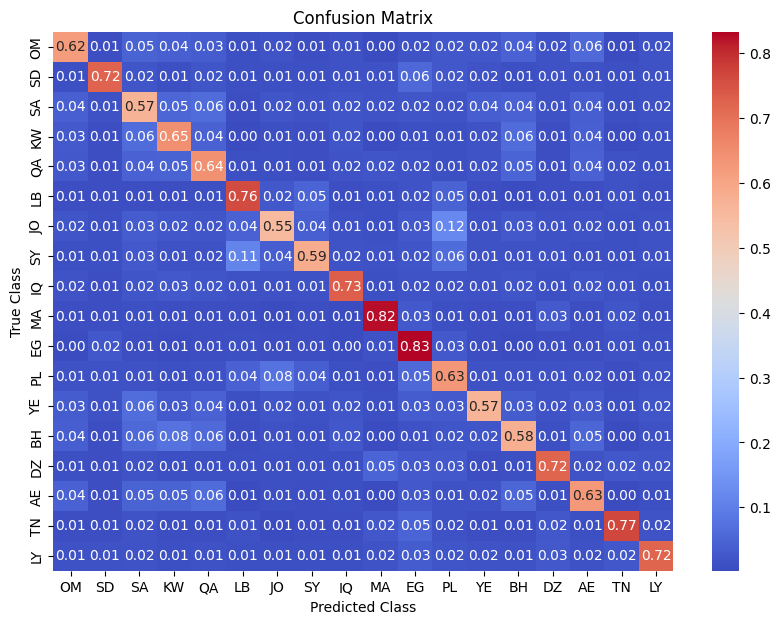

In [ ]:

model = results["model"]
y_pred = model.predict(X_Train)
y_pred_classes = y_pred

cm = confusion_matrix( y_Train, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

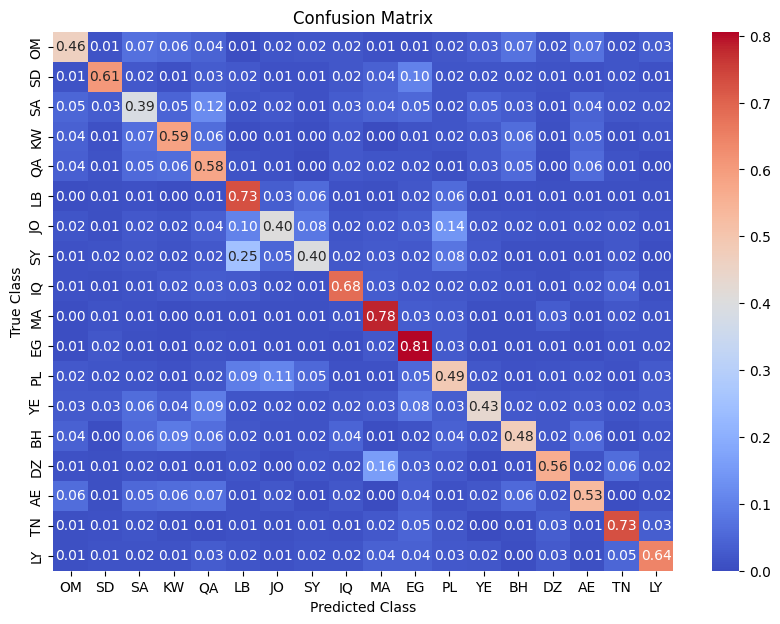

In [ ]:
y_pred = model.predict(X_Test)
y_pred_classes = y_pred

cm = confusion_matrix( y_Test, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

### Model 5-2-1

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length)
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length)
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length)

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

16336/16336 ━━━━━━━━━━━━━━━━━━━━ 154s 9ms/step


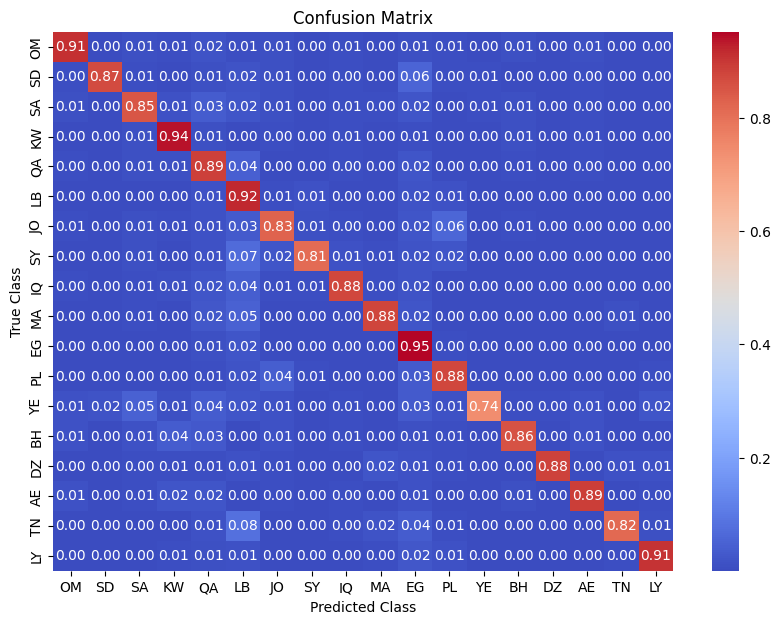

In [ ]:

model = load_model('mission_5_2_1.keras')

y_pred = model.predict(X_Train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Train_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


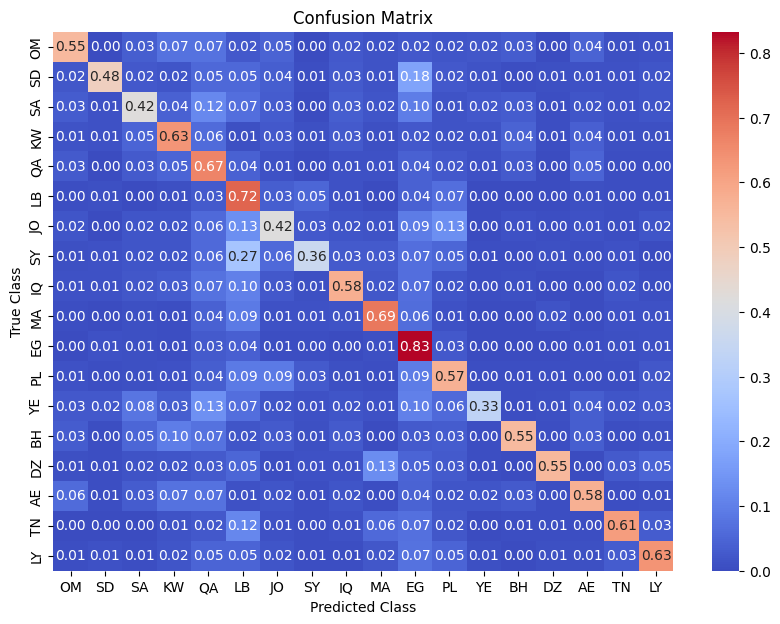

In [ ]:
y_pred = model.predict(X_Test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Test_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

### Model 5-2-2

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

16336/16336 ━━━━━━━━━━━━━━━━━━━━ 175s 11ms/step


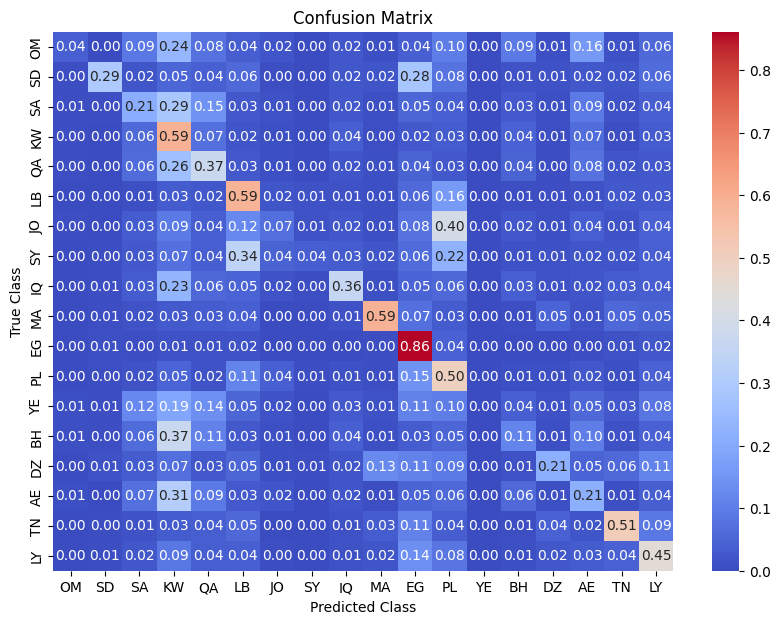

In [ ]:

model = load_model('mission_5_2_2.keras')

y_pred = model.predict(X_Train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Train_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


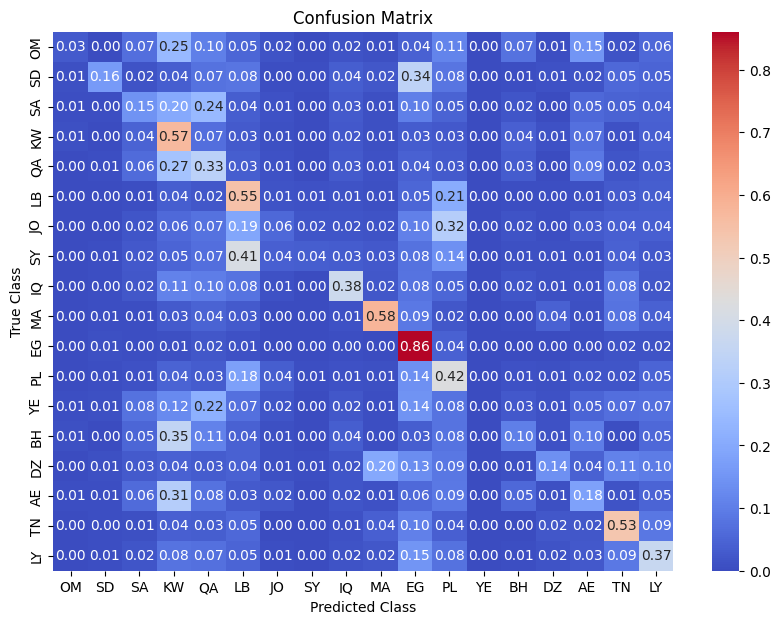

In [ ]:
y_pred = model.predict(X_Test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Test_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

### Model 5-2-3

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

16336/16336 ━━━━━━━━━━━━━━━━━━━━ 238s 15ms/step


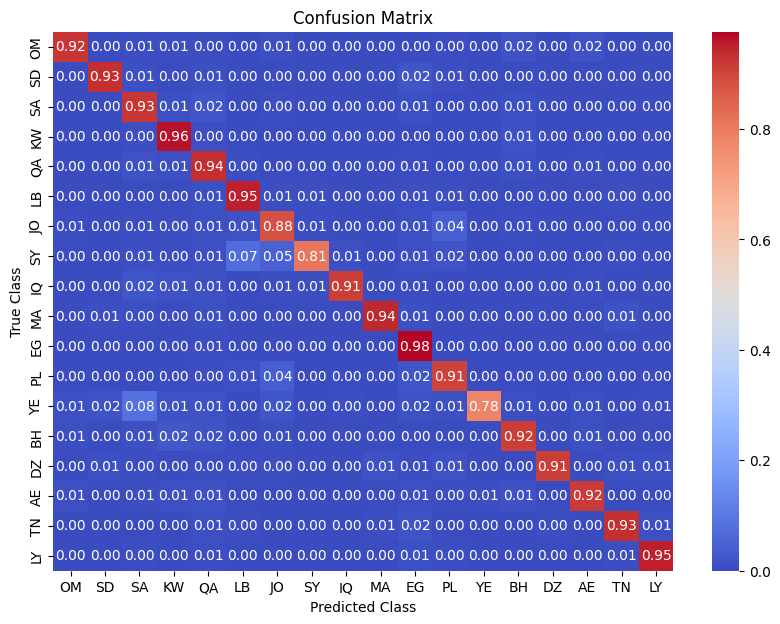

In [ ]:

model = load_model('mission_5_2_3.keras')

y_pred = model.predict(X_Train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Train_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


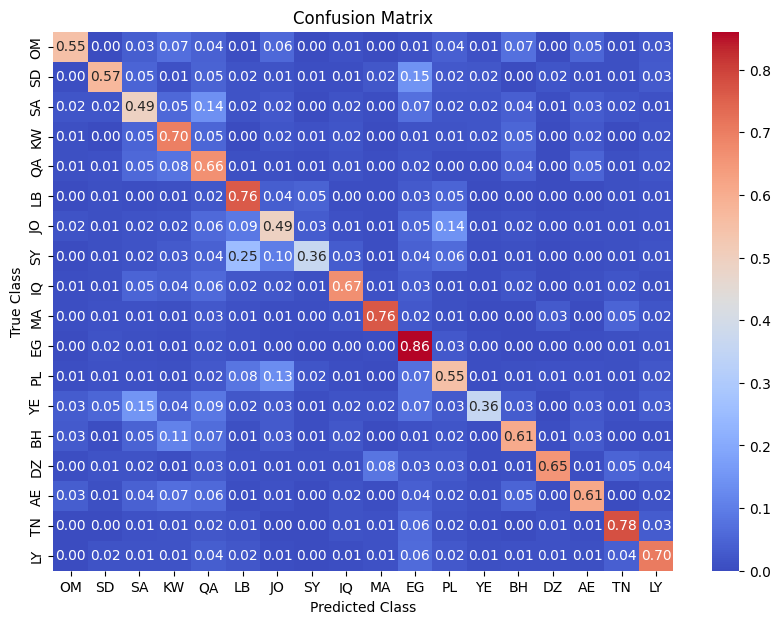

In [ ]:
y_pred = model.predict(X_Test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Test_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

### Fine Tuned

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

16336/16336 ━━━━━━━━━━━━━━━━━━━━ 178s 11ms/step


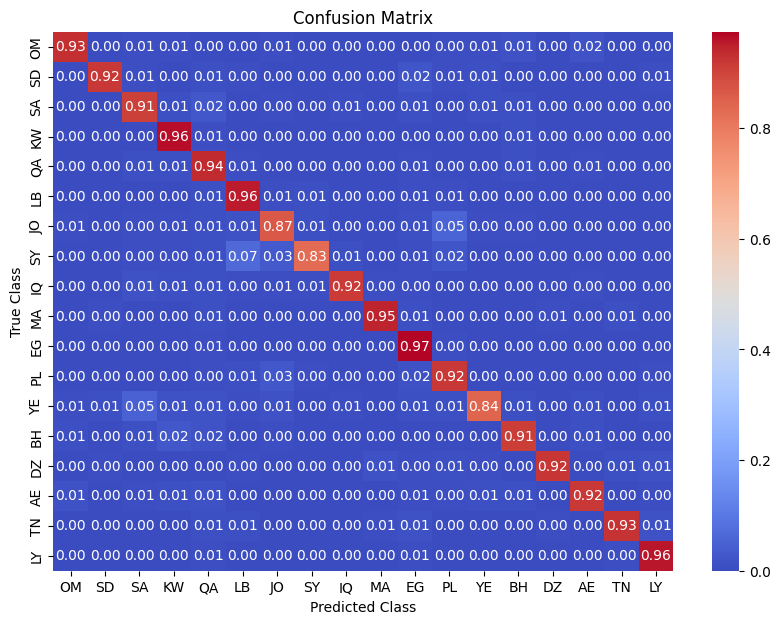

In [ ]:

model = load_model('mission_5_3_1.keras')

y_pred = model.predict(X_Train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Train_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


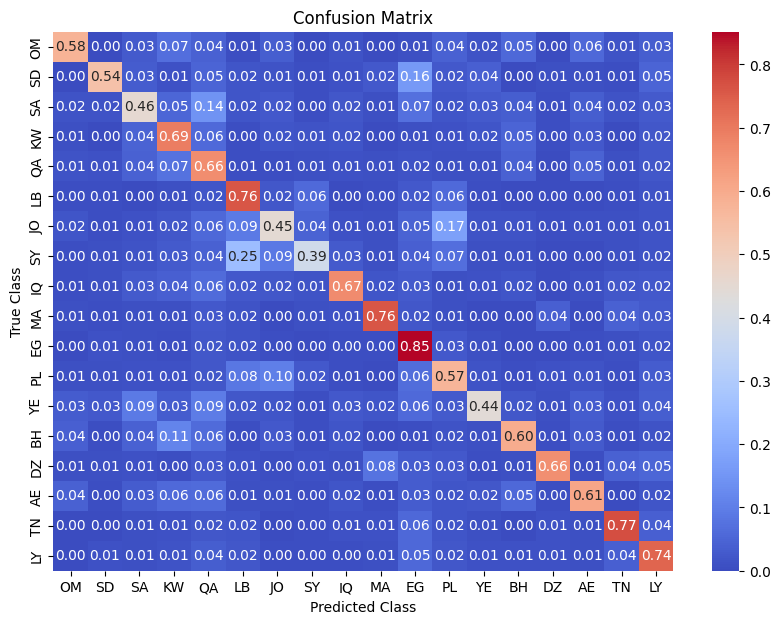

In [ ]:
y_pred = model.predict(X_Test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Test_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=countries, yticklabels=countries)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

#### NOTE

أفضل مصفوفة اعتراض وجدناها بالنموذج 3_2 وخصوصاً عندما اجرينا اعادة تدريب مخصص له

## [5.5]

## [5.6]

### Model 4-5

#### Region

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['region_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['region_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['region_num'].to_list()

In [ ]:
param_grid = {
    'tfidf__ngram_range': [(1, 1)],
    'tfidf__use_idf': [True],
    'tfidf__norm': [None],
    'tfidf__max_df': [1.0],
    'tfidf__min_df': [1],
    'tfidf__max_features': [35000]
}

X_T_V = X_Train
y_T_V = y_Train


results = train_and_evaluate_model(X_T_V, y_T_V, X_Test, y_Test, param_grid, 7, 7, True)
for item in results.items():
  if item [0] == "model":
    continue
  print(item[0])
  print(item[1])

Fitting 7 folds for each of 1 candidates, totalling 7 fits
accuracy
0.7515640913720355
report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      3962
           1       0.73      0.82      0.77      2209
           2       0.83      0.75      0.79      3455
           3       0.80      0.77      0.78      2826
           4       0.28      0.53      0.36       394
           5       0.60      0.75      0.67       900

    accuracy                           0.75     13746
   macro avg       0.67      0.72      0.69     13746
weighted avg       0.77      0.75      0.76     13746

f1
0.7578465228445587
best_params
{'tfidf__max_df': 1.0, 'tfidf__max_features': 35000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1), 'tfidf__norm': None, 'tfidf__use_idf': True}
pipeline
Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=35000, norm=None)),
                ('clf', MultinomialNB(alpha=7))])


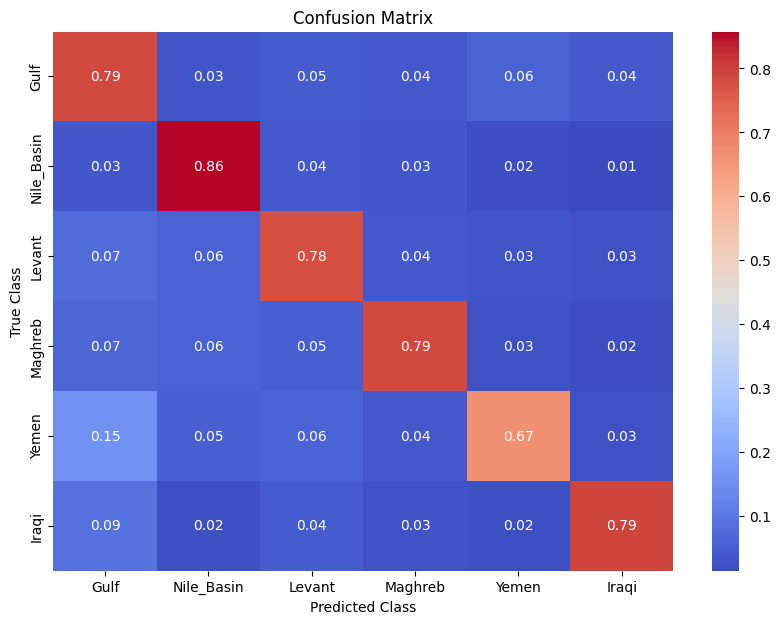

In [ ]:

model = results["model"]
y_pred = model.predict(X_Train)
y_pred_classes = y_pred

cm = confusion_matrix( y_Train, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

regions = ['Gulf', 'Nile_Basin', 'Levant', 'Maghreb', 'Yemen', 'Iraqi']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=regions, yticklabels=regions)
# sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

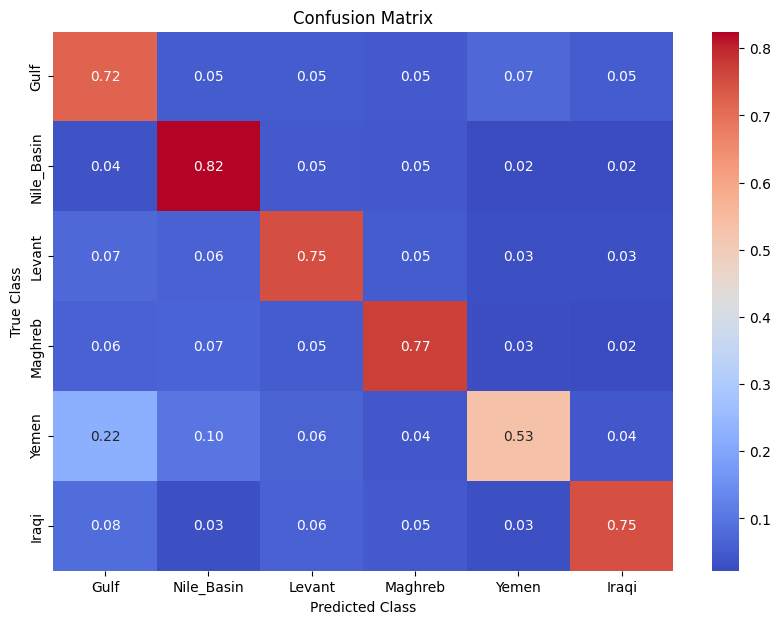

In [ ]:

model = results["model"]
y_pred = model.predict(X_Test)
y_pred_classes = y_pred

cm = confusion_matrix( y_Test, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

regions = ['Gulf', 'Nile_Basin', 'Levant', 'Maghreb', 'Yemen', 'Iraqi']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=regions, yticklabels=regions)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

#### City

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

Clean_DF_Train = Clean_DF_Train.dropna(subset=['lang'])
Clean_DF_Test = Clean_DF_Test.dropna(subset=['lang'])
Clean_DF_Validation = Clean_DF_Validation.dropna(subset=['lang'])


X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['lang_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['lang_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['lang_num'].to_list()

In [ ]:
param_grid = {
    'tfidf__ngram_range': [(1, 1)],
    'tfidf__use_idf': [True],
    'tfidf__norm': [None],
    'tfidf__max_df': [1.0],
    'tfidf__min_df': [1],
    'tfidf__max_features': [35000]
}

X_T_V = X_Train
y_T_V = y_Train


results = train_and_evaluate_model(X_T_V, y_T_V, X_Test, y_Test, param_grid, 7, 7, True)
for item in results.items():
  if item [0] == "model":
    continue
  print(item[0])
  print(item[1])

Fitting 7 folds for each of 1 candidates, totalling 7 fits
accuracy
0.49800629590766005
report
              precision    recall  f1-score   support

         0.0       0.81      0.33      0.47       199
         1.0       0.85      0.39      0.54       199
         2.0       0.93      0.54      0.68       198
         3.0       0.65      0.26      0.37       199
         4.0       0.62      0.13      0.22       199
         5.0       0.69      0.56      0.62       198
         6.0       0.72      0.47      0.57       199
         7.0       0.30      0.89      0.44       197
         8.0       0.84      0.49      0.62       199
         9.0       0.23      0.88      0.36       199
        10.0       0.69      0.25      0.36       199
        11.0       0.27      0.88      0.42       198
        12.0       0.80      0.16      0.27       199
        13.0       0.78      0.37      0.50       199
        14.0       0.63      0.31      0.41       199
        15.0       0.83      0.56      0

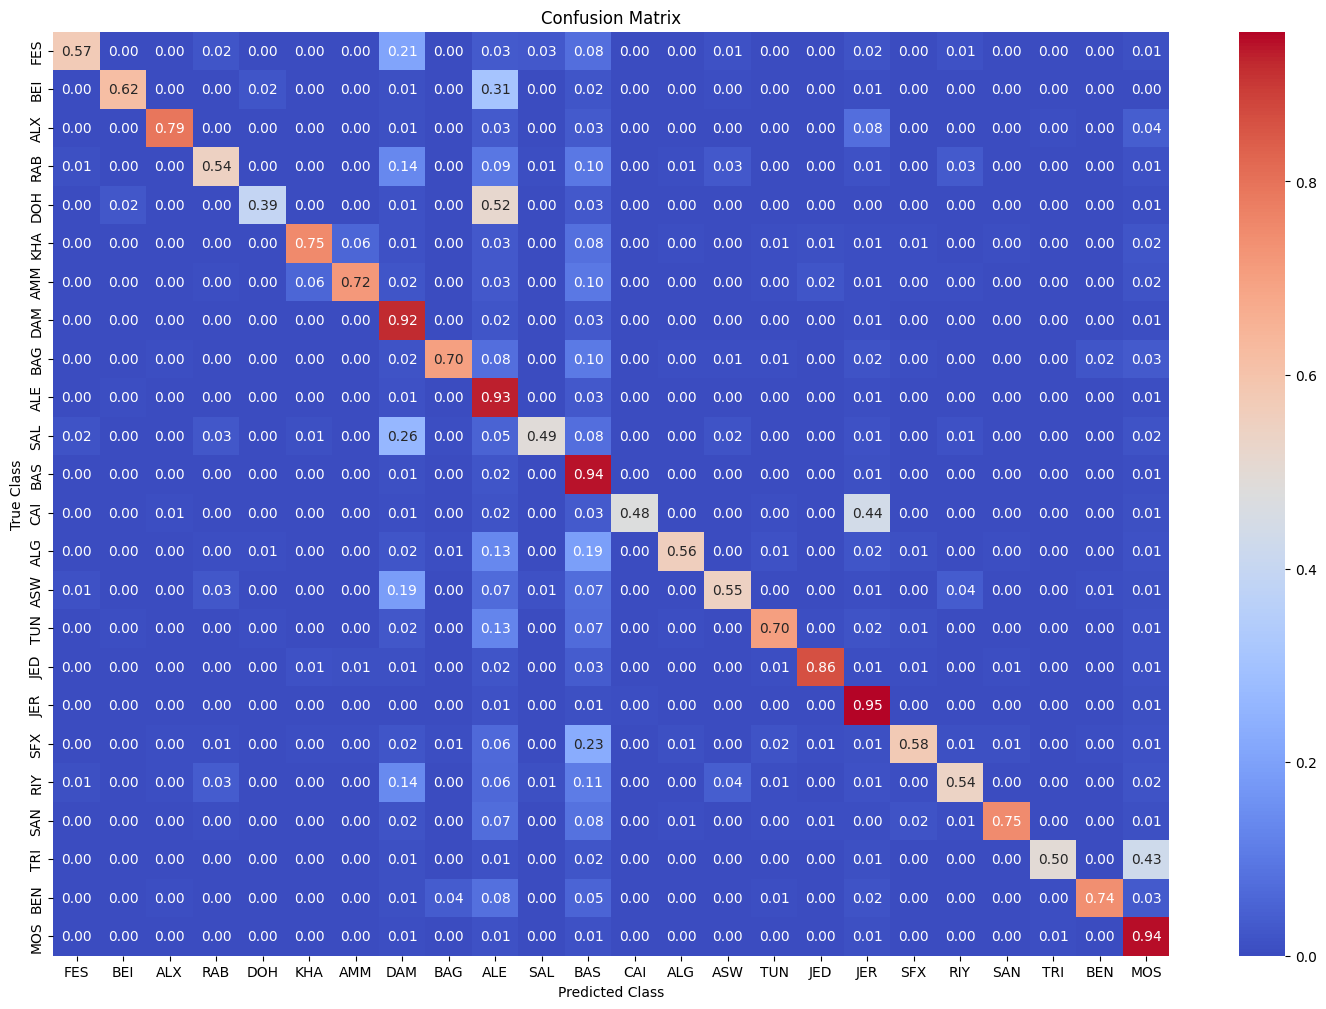

In [ ]:

model = results["model"]
y_pred = model.predict(X_Train)
y_pred_classes = y_pred

cm = confusion_matrix( y_Train, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

langs = ['FES', 'BEI', 'ALX', 'RAB', 'DOH', 'KHA', 'AMM', 'DAM', 'BAG',
       'ALE', 'SAL', 'BAS', 'CAI', 'ALG', 'ASW', 'TUN', 'JED', 'JER',
       'SFX', 'RIY', 'SAN', 'TRI', 'BEN', 'MOS']

plt.figure(figsize=(18, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=langs, yticklabels=langs)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

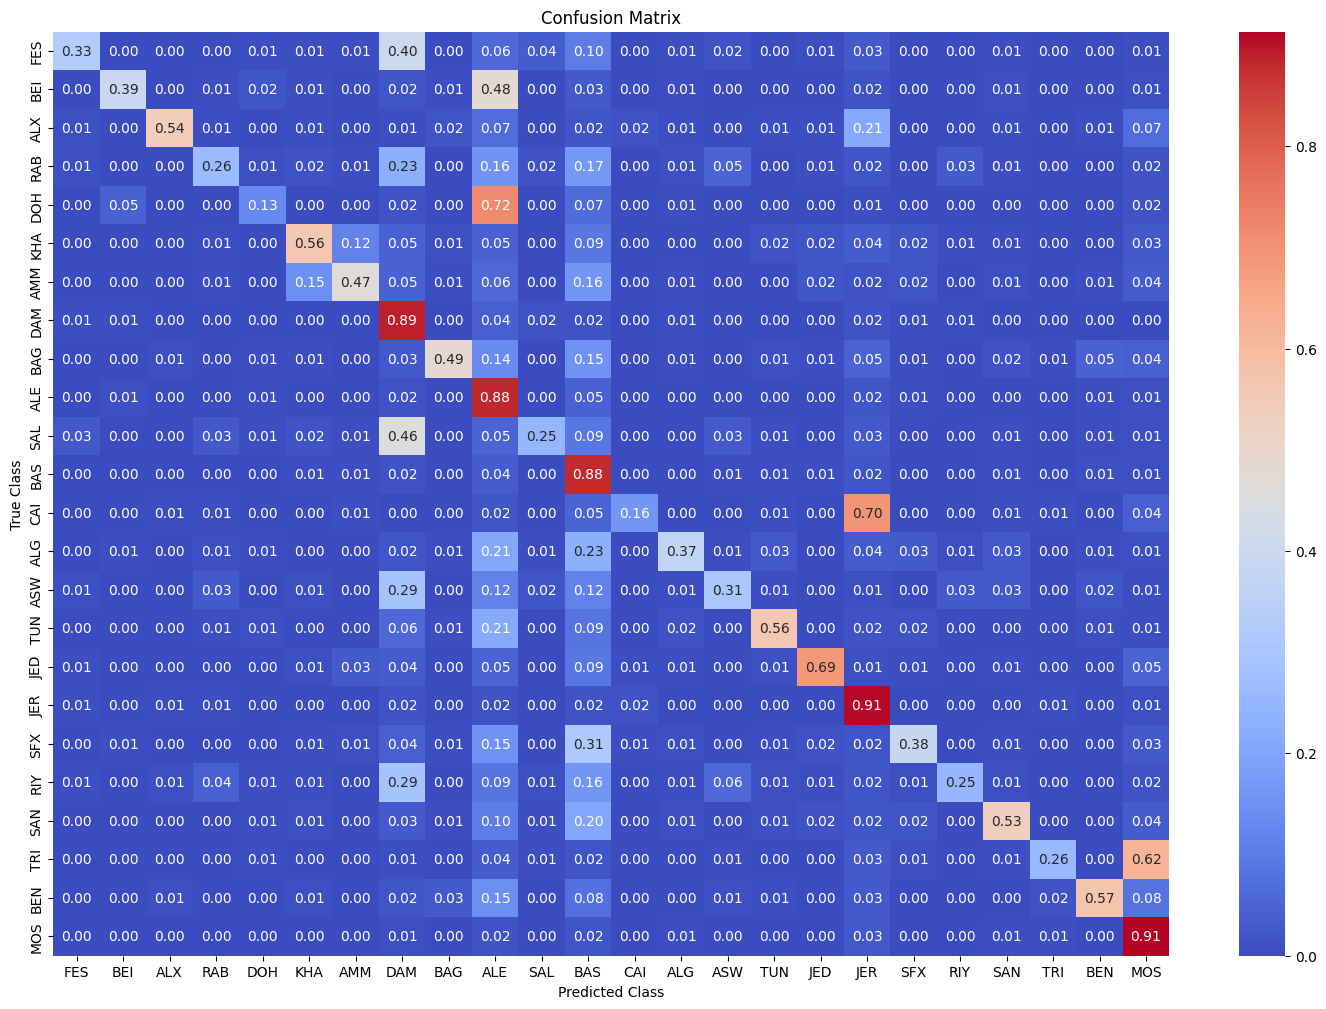

In [ ]:

model = results["model"]
y_pred = model.predict(X_Test)
y_pred_classes = y_pred

cm = confusion_matrix( y_Test, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

langs = ['FES', 'BEI', 'ALX', 'RAB', 'DOH', 'KHA', 'AMM', 'DAM', 'BAG',
       'ALE', 'SAL', 'BAS', 'CAI', 'ALG', 'ASW', 'TUN', 'JED', 'JER',
       'SFX', 'RIY', 'SAN', 'TRI', 'BEN', 'MOS']

plt.figure(figsize=(18, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=langs, yticklabels=langs)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

### Model 5-3

In [ ]:
!cp /content/drive/MyDrive/Folder/arabic_corpus.zip arabic_corpus.zip
!unzip arabic_corpus.zip

!xz -d vocab.txt.xz
!xz -d vectors.txt.xz
# with open("vocab.txt", "r", encoding="utf-8") as f:
#     vocab = set(line for line in f)

# glove_vocabulary = []

# for word in vocab:
#     glove_vocabulary.append(re.sub(r"\d+", "", word))

Archive:  arabic_corpus.zip
 extracting: arabic_corpus.xz        
 extracting: vocab.txt.xz            
 extracting: vectors.txt.xz          
 extracting: arabic_corpus_archive.torrent  
 extracting: arabic_corpus_meta.xml  
 extracting: arabic_corpus_files.xml  
 extracting: arabic_corpus_meta.sqlite  


In [ ]:
embeddings_index = {}
with open('vectors.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

word_index = {}
with open('vocab.txt') as f:
    for i, line in enumerate(f):
        word_index[line.strip()] = i+1

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

#### Region

In [ ]:
X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['region_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['region_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['region_num'].to_list()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

In [ ]:

embedding_dim = len(embeddings_index[next(iter(embeddings_index))])
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word.split(" ")[0])
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)

# del embeddings_index
# del word_index
# del tokenizer


mission_5_6_region = Sequential()
mission_5_6_region.add(embedding_layer)
mission_5_6_region.add(Conv1D(24, 8,  activation='relu'))
mission_5_6_region.add(MaxPooling1D(pool_size=5))
mission_5_6_region.add(Flatten())
mission_5_6_region.add(Dense(units=18, activation='relu'))
mission_5_6_region.add(Dense(units=num_classes, activation='softmax'))

mission_5_6_region.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = mission_5_6_region.fit(X_Train_padded, y_Train_encoded, epochs=3, batch_size=32, validation_data=(X_Validation_padded, y_Validation_encoded))

loss, accuracy = mission_5_6_region.evaluate(X_Test_padded, y_Test_encoded)
print('Test Accuracy:', accuracy * 100)  # Print accuracy as a percentage

mission_5_6_region.save('mission_5_6_region.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3


/usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 159833088 elements. This may consume a large amount of memory.
  warnings.warn(


16336/16336 ━━━━━━━━━━━━━━━━━━━━ 645s 39ms/step - accuracy: 0.7323 - loss: 0.7732 - val_accuracy: 0.8325 - val_loss: 0.4891
Epoch 2/3
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 669s 38ms/step - accuracy: 0.9085 - loss: 0.2861 - val_accuracy: 0.8364 - val_loss: 0.4863
Epoch 3/3
16336/16336 ━━━━━━━━━━━━━━━━━━━━ 625s 38ms/step - accuracy: 0.9545 - loss: 0.1403 - val_accuracy: 0.8358 - val_loss: 0.5499
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8550 - loss: 0.5146
Test Accuracy: 81.79833889007568


In [ ]:
!cp mission_5_6_region.keras /content/drive/MyDrive/Folder

16336/16336 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step


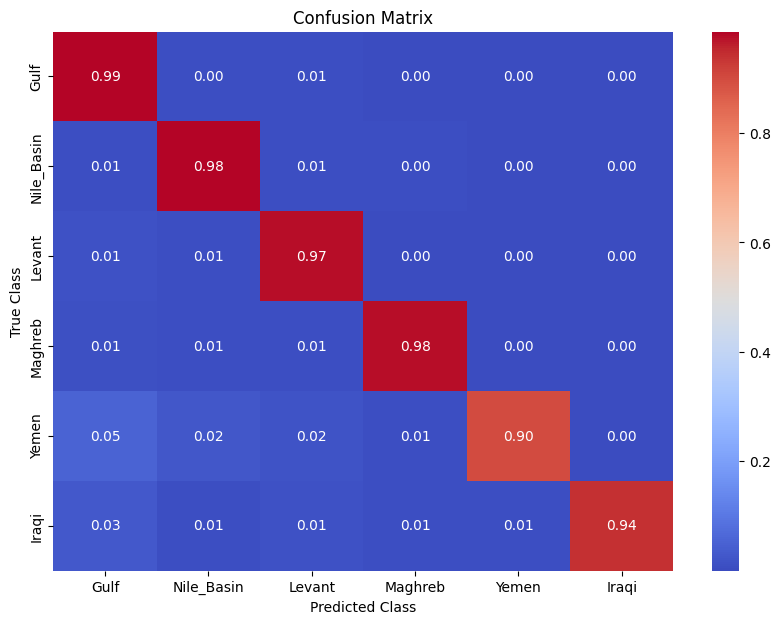

In [ ]:
model = load_model('mission_5_6_region.keras')

y_pred = model.predict(X_Train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Train_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

regions = ['Gulf', 'Nile_Basin', 'Levant', 'Maghreb', 'Yemen', 'Iraqi']

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=regions, yticklabels=regions)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

#### City

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

Clean_DF_Train = Clean_DF_Train.dropna(subset=['lang'])
Clean_DF_Test = Clean_DF_Test.dropna(subset=['lang'])
Clean_DF_Validation = Clean_DF_Validation.dropna(subset=['lang'])


X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['lang_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['lang_num'].to_list()
X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['lang_num'].to_list()

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

num_classes = len(np.unique(y_Train))
y_Train_encoded = pd.get_dummies(y_Train).values
y_Test_encoded = pd.get_dummies(y_Test).values
y_Validation_encoded = pd.get_dummies(y_Validation).values

In [ ]:

embedding_dim = len(embeddings_index[next(iter(embeddings_index))])
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word.split(" ")[0])
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)

# del embeddings_index
# del word_index
# del tokenizer


mission_5_6_city = Sequential()
mission_5_6_city.add(embedding_layer)
mission_5_6_city.add(Conv1D(18, 6, activation='relu'))
mission_5_6_city.add(MaxPooling1D(pool_size=5))
mission_5_6_city.add(Flatten())
mission_5_6_city.add(Dense(units=18, activation='relu'))
mission_5_6_city.add(Dense(units=num_classes, activation='softmax'))

mission_5_6_city.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = mission_5_6_city.fit(X_Train_padded, y_Train_encoded, epochs=3, batch_size=24, validation_data=(X_Validation_padded, y_Validation_encoded))

loss, accuracy = mission_5_6_city.evaluate(X_Test_padded, y_Test_encoded)
print('Test Accuracy:', accuracy * 100)  # Print accuracy as a percentage

mission_5_6_city.save('mission_5_6_city.keras')

Epoch 1/3
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 74s 19ms/step - accuracy: 0.4510 - loss: 1.9871 - val_accuracy: 0.6180 - val_loss: 1.2763
Epoch 2/3
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.7031 - loss: 0.9458 - val_accuracy: 0.6432 - val_loss: 1.2344
Epoch 3/3
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.7936 - loss: 0.6343 - val_accuracy: 0.6453 - val_loss: 1.3056
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4735 - loss: 1.9852
Test Accuracy: 45.96012532711029


In [ ]:
!cp mission_5_6_city.keras /content/drive/MyDrive/Folder

2584/2584 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step


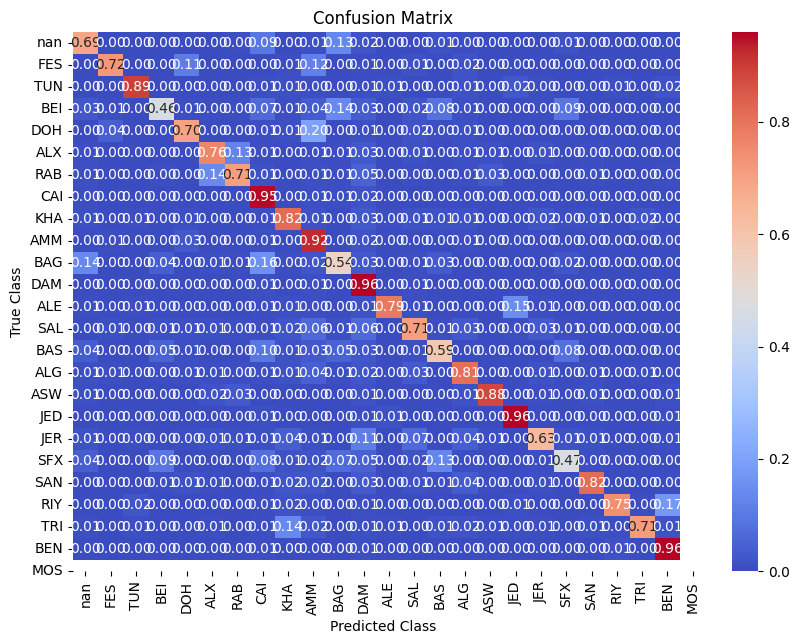

In [ ]:
model = load_model('mission_5_6_city.keras')

y_pred = model.predict(X_Train_padded)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_Train_encoded, axis=1), y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Row-wise normalization

cities = DF_Train['lang'].unique()

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=cities, yticklabels=cities)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# مهمة 06 : التمثيل الداللي

Semantic representation

## [6.1]

In [ ]:
!cp /content/drive/MyDrive/Folder/most_common_words_countries.json most_common_words_countries.json
!cp /content/drive/MyDrive/Folder/most_common_words_regions.json most_common_words_regions.json
!cp /content/drive/MyDrive/Folder/most_common_words_cities.json most_common_words_cities.json

In [ ]:
with open("most_common_words_countries.json", "r") as f:
    most_common_words_countries = json.load(f)

with open("most_common_words_regions.json", "r") as f:
    most_common_words_regions = json.load(f)

with open("most_common_words_cities.json", "r") as f:
    most_common_words_cities = json.load(f)

In [ ]:
!cp /content/drive/MyDrive/Folder/arabic_corpus.zip arabic_corpus.zip

# فك ضغط الملف الذي تم تنزيله
!unzip arabic_corpus.zip

# فك ضغط ملف .xz وتحويله إلى النص الأصلي
!xz -d vocab.txt.xz

!xz -d vectors.txt.xz

Archive:  arabic_corpus.zip
 extracting: arabic_corpus.xz        
 extracting: vocab.txt.xz            
 extracting: vectors.txt.xz          
 extracting: arabic_corpus_archive.torrent  
 extracting: arabic_corpus_meta.xml  
 extracting: arabic_corpus_files.xml  
 extracting: arabic_corpus_meta.sqlite  


In [ ]:
!xz -d vectors.txt.xz

In [ ]:


MAX_WORDS_PER_ACCENT = 30
def load_vocab_and_vectors(vocab_file, vectors_file):
    vocab = {}
    vectors = {}
    # encoding='utf-8'
    with open(vocab_file, 'r') as vf:
        for idx, word in enumerate(vf):
            vocab[word.strip()] = idx + 1

    with open(vectors_file, 'r') as vf:
        for line in vf:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            vectors[word] = coefs

    return vocab, vectors

vocab_file = "vocab.txt"
vectors_file = "vectors.txt"

try:
  vocab, vectors = load_vocab_and_vectors(vocab_file, vectors_file)
except FileNotFoundError:
  print("Error: vocab.txt or vectors.txt not found. Please provide the correct file paths.")
  exit()
except Exception as e:
  print(f"An error occurred during file loading: {e}")
  exit()

### Country

In [ ]:

temp_arrays = []
for CDict in most_common_words_countries:
    CArr = []
    counter = 0
    for key, value in CDict.items():
        if counter == MAX_WORDS_PER_ACCENT:
            break
        counter+=1
        CArr.append(key)
    temp_arrays.append(CArr)
all_most_common_countries = temp_arrays.copy()

<ipython-input-7-af97e35a0bdb>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_dialects) # Use 'tab20b' or 'tab20c' for more than 20 distinct colors if needed


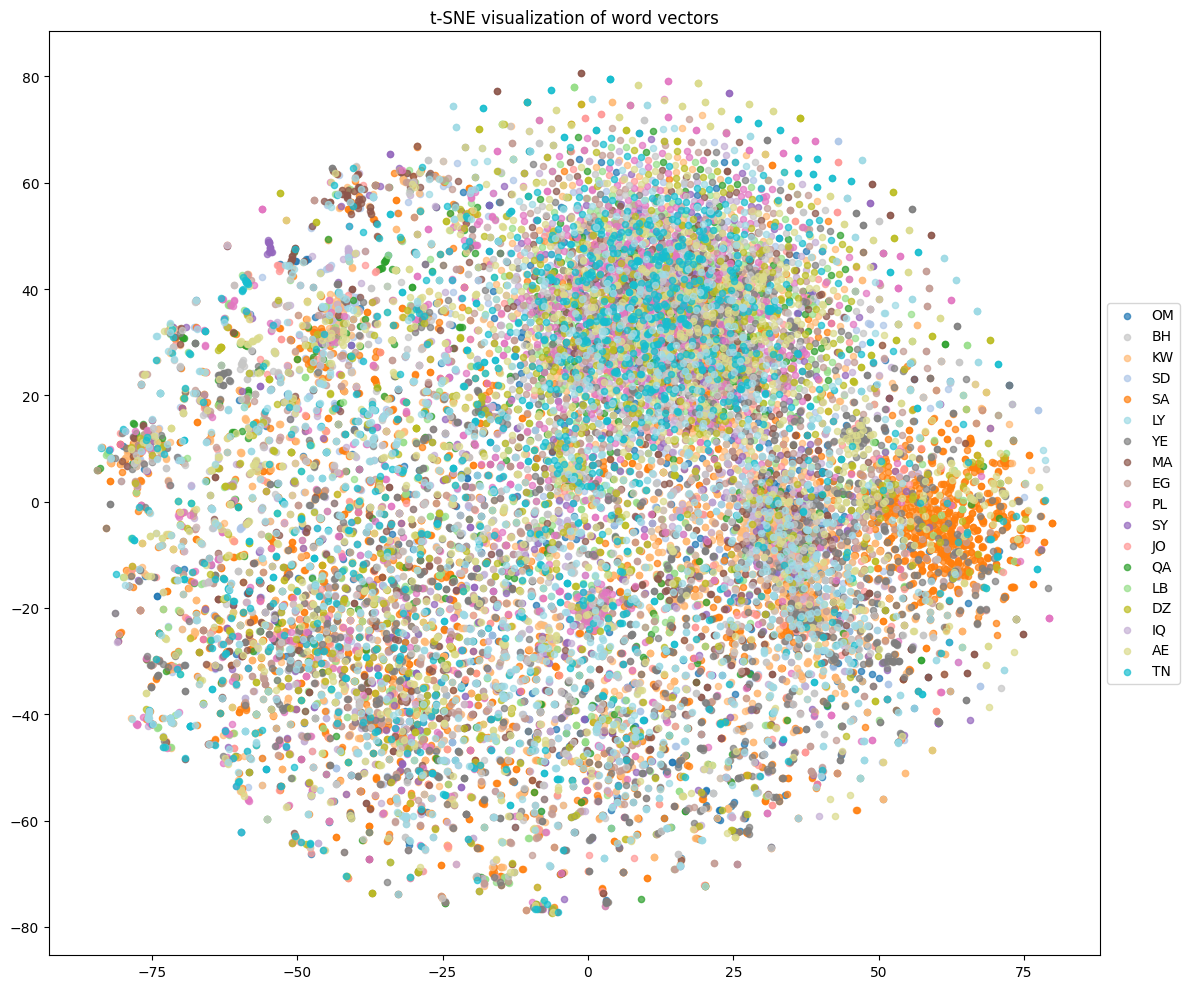

In [ ]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.cm as cm

def plot_word_vectors_from_dialects_dynamic(dialect_words, vectors):
    all_words = []
    labels = {}
    for dialect, words in dialect_words.items():
        all_words.extend(words)
        for word in words:
            labels[word] = dialect

    word_vectors = [vectors[word] for word in all_words if word in vectors]
    words_exist = [word for word in all_words if word in vectors]
    if not word_vectors:
        print('There is no word in vectors')
        return

    tsne = TSNE(n_components=2, random_state=0, perplexity=min(18, len(word_vectors) - 1))  # Perplexity less than 100
    reduced_vectors = tsne.fit_transform(np.array(word_vectors))

    num_dialects = len(dialect_words)
    cmap = cm.get_cmap('tab20', num_dialects) # Use 'tab20b' or 'tab20c' for more than 20 distinct colors if needed

    plt.figure(figsize=(12, 10))
    for i, word in enumerate(words_exist):
        x, y = reduced_vectors[i]
        dialect_index = list(dialect_words.keys()).index(labels[word])
        color = cmap(dialect_index)
        plt.scatter(x, y, c=[color], label=labels[word], s=20, alpha=0.7)

    handles, labels_legend = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels_legend, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('t-SNE visualization of word vectors')
    plt.tight_layout()
    plt.show()


dialect_words = {}
countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']
for i in range(len(most_common_words_countries)):
    dialect_words[countries [i]] = most_common_words_countries[i]


plot_word_vectors_from_dialects_dynamic(dialect_words, vectors)

### Region

In [ ]:

temp_arrays = []
for CDict in most_common_words_regions:
    CArr = []
    counter = 0
    for key, value in CDict.items():
        if counter == MAX_WORDS_PER_ACCENT:
            break
        counter+=1
        CArr.append(key)
    temp_arrays.append(CArr)
most_common_words_regions = temp_arrays.copy()

<ipython-input-15-224bf0097ab6>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_dialects) # Use 'tab20b' or 'tab20c' for more than 20 distinct colors if needed


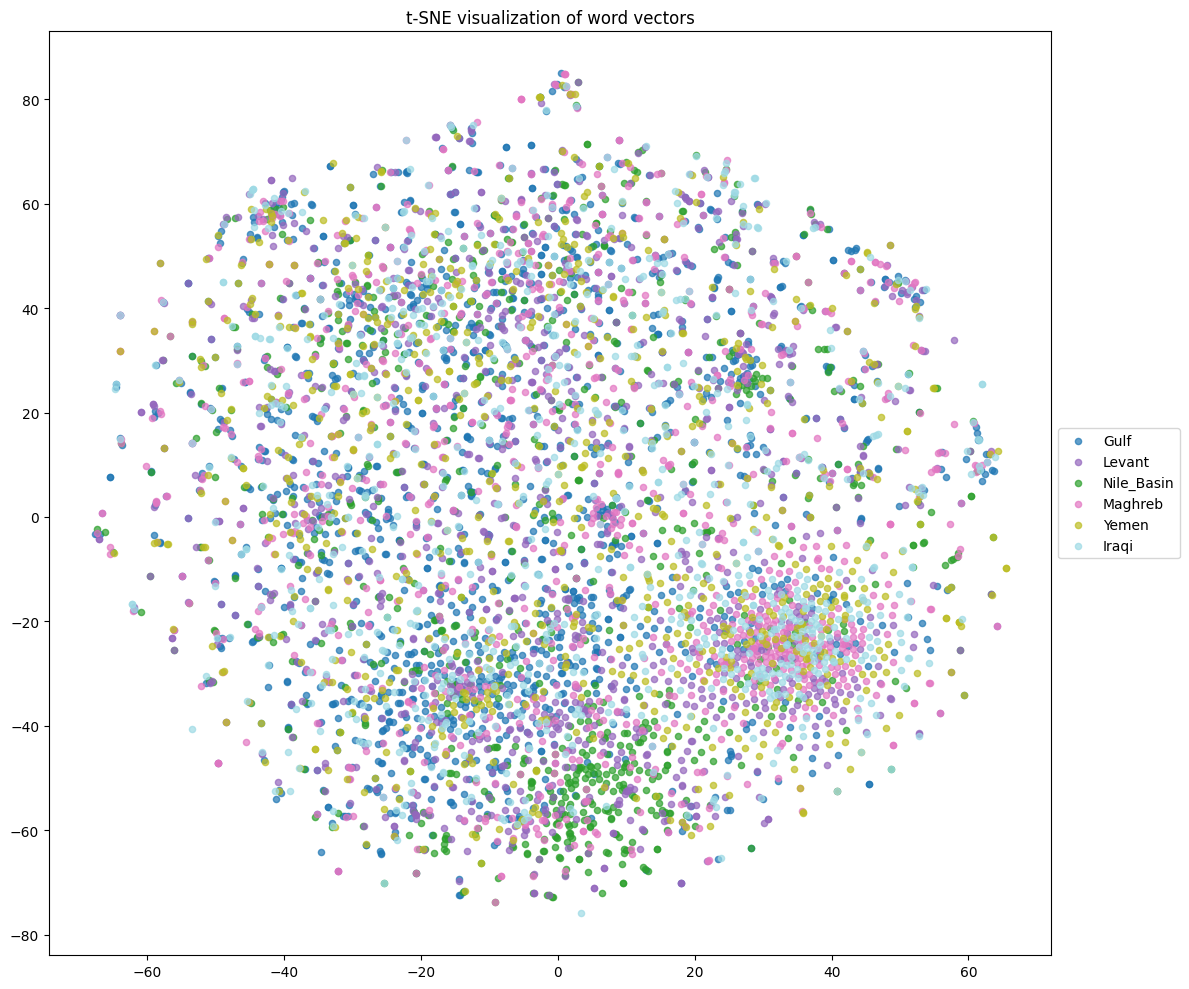

In [ ]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.cm as cm

def plot_word_vectors_from_dialects_dynamic(dialect_words, vectors):
    all_words = []
    labels = {}
    for dialect, words in dialect_words.items():
        all_words.extend(words)
        for word in words:
            labels[word] = dialect

    word_vectors = [vectors[word] for word in all_words if word in vectors]
    words_exist = [word for word in all_words if word in vectors]
    if not word_vectors:
        print('There is no word in vectors')
        return

    tsne = TSNE(n_components=2, random_state=0, perplexity=min(18, len(word_vectors) - 1))  # Perplexity less than 100
    reduced_vectors = tsne.fit_transform(np.array(word_vectors))

    num_dialects = len(dialect_words)
    cmap = cm.get_cmap('tab20', num_dialects) # Use 'tab20b' or 'tab20c' for more than 20 distinct colors if needed

    plt.figure(figsize=(12, 10))
    for i, word in enumerate(words_exist):
        x, y = reduced_vectors[i]
        dialect_index = list(dialect_words.keys()).index(labels[word])
        color = cmap(dialect_index)
        plt.scatter(x, y, c=[color], label=labels[word], s=20, alpha=0.7)

    handles, labels_legend = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels_legend, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('t-SNE visualization of word vectors')
    plt.tight_layout()
    plt.show()


dialect_words = {}
regions = ['Gulf', 'Nile_Basin', 'Levant', 'Maghreb', 'Yemen', 'Iraqi']

for i in range(len(most_common_words_regions)):
    dialect_words[regions [i]] = most_common_words_regions[i]


plot_word_vectors_from_dialects_dynamic(dialect_words, vectors)

### City

In [ ]:

temp_arrays = []
for CDict in most_common_words_cities:
    CArr = []
    counter = 0
    for key, value in CDict.items():
        if counter == MAX_WORDS_PER_ACCENT:
            break
        counter+=1
        CArr.append(key)
    temp_arrays.append(CArr)
most_common_words_cities = temp_arrays.copy()

In [ ]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.cm as cm



def plot_word_vectors_from_dialects_dynamic(dialect_words, vectors):
    all_words = []
    labels = {}
    for dialect, words in dialect_words.items():
        all_words.extend(words)
        for word in words:
            labels[word] = dialect

    word_vectors = [vectors[word] for word in all_words if word in vectors]
    words_exist = [word for word in all_words if word in vectors]
    if not word_vectors:
        print('There is no word in vectors')
        return

    tsne = TSNE(n_components=2, random_state=0, perplexity=min(18, len(word_vectors) - 1))  # Perplexity less than 100
    reduced_vectors = tsne.fit_transform(np.array(word_vectors))

    num_dialects = len(dialect_words)
    cmap = cm.get_cmap('tab20', num_dialects) # Use 'tab20b' or 'tab20c' for more than 20 distinct colors if needed
    # tab20 provides 20 colors, if the number of dialects is higher than 20 colors will be repeated

    plt.figure(figsize=(12, 10))
    for i, word in enumerate(words_exist):
        x, y = reduced_vectors[i]
        dialect_index = list(dialect_words.keys()).index(labels[word])
        color = cmap(dialect_index)
        plt.scatter(x, y, c=[color], label=labels[word], s=20, alpha=0.7)

    handles, labels_legend = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels_legend, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('t-SNE visualization of word vectors')
    plt.tight_layout()
    plt.show()


dialect_words = {}
cities = ['ALE', 'ALX', 'ALG', 'AMM', 'ASW', 'BAG', 'BAS', 'BEI', 'BEN',
       'CAI', 'DAM', 'DOH', 'FES', 'JED', 'JER', 'KHA', 'MOS', 'RAB',
       'RIY', 'SAL', 'SAN', 'SFX', 'TRI', 'TUN']

for i in range(len(most_common_words_cities)):
    dialect_words[cities [i]] = most_common_words_cities[i]


plot_word_vectors_from_dialects_dynamic(dialect_words, vectors)

<ipython-input-11-7b5c02cc0026>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', num_dialects) # Use 'tab20b' or 'tab20c' for more than 20 distinct colors if needed


## [6.2]

In [ ]:
def plot_word_vectors_from_dialects_dynamic(dialect_words, vectors):
    all_words = []
    labels = {}

    # Organize words and their labels
    for dialect, words in dialect_words.items():
        all_words.extend(words)
        for word in words:
            labels[word] = dialect

    # Retrieve vectors for existing words
    word_vectors = [vectors[word] for word in all_words if word in vectors]
    words_exist = [word for word in all_words if word in vectors]

    if not word_vectors:
        print('There is no word in vectors')
        return

    # Apply t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=0, perplexity=min(18, len(word_vectors) - 1))
    reduced_vectors = tsne.fit_transform(np.array(word_vectors))

    # Set up color mapping
    num_dialects = len(dialect_words)
    cmap = cm.get_cmap('tab20', num_dialects)  # For up to 20 distinct colors

    plt.figure(figsize=(12, 10))
    for i, word in enumerate(words_exist):
        x, y = reduced_vectors[i]
        dialect_index = list(dialect_words.keys()).index(labels[word])
        color = cmap(dialect_index)
        plt.scatter(x, y, c=[color], label=labels[word], s=20, alpha=0.7)

    handles, labels_legend = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels_legend, handles))
    plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('t-SNE Visualization of Word Vectors')
    plt.tight_layout()
    plt.show()

### Country

In [ ]:
!cp /content/drive/MyDrive/Folder/mission_5_2_3.keras mission_5_2_3.keras

In [ ]:

temp_arrays = []
for CDict in most_common_words_countries:
    CArr = []
    counter = 0
    for key, value in CDict.items():
        if counter == MAX_WORDS_PER_ACCENT:
            break
        counter+=1
        CArr.append(key)
    temp_arrays.append(CArr)
all_most_common_countries = temp_arrays.copy()

NameError: name 'MAX_WORDS_PER_ACCENT' is not defined

In [ ]:

Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['country_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['country_num'].to_list()

X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['country_num'].to_list()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

sentences = Clean_DF_Train['clean_text'].astype(str).tolist()

model = load_model("mission_2_3.keras")

embedding_layer = model.get_layer('embedding')  # Replace 'embedding' with the actual name of your embedding layer
embedding_weights = embedding_layer.get_weights()[0]

vectors = {word: embedding_weights[idx] for word, idx in word_index.items()}

In [ ]:


dialect_words = {}
countries = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']
for i in range(len(most_common_words_countries)):
    dialect_words[countries [i]] = most_common_words_countries[i]
plot_word_vectors_from_dialects_dynamic(dialect_words, vectors)

### region

In [ ]:
!cp /content/drive/MyDrive/Folder/mission_5_6_region.keras mission_5_6_region.keras

In [ ]:

temp_arrays = []
for CDict in most_common_words_regions:
    CArr = []
    counter = 0
    for key, value in CDict.items():
        if counter == MAX_WORDS_PER_ACCENT:
            break
        counter+=1
        CArr.append(key)
    temp_arrays.append(CArr)
most_common_words_regions = temp_arrays.copy()

In [ ]:
Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['region_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['region_num'].to_list()

X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['region_num'].to_list()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

sentences = Clean_DF_Train['clean_text'].astype(str).tolist()

model = load_model("mission_5_6_region.keras")

embedding_layer = model.get_layer('embedding')  # Replace 'embedding' with the actual name of your embedding layer
embedding_weights = embedding_layer.get_weights()[0]

vectors = {word: embedding_weights[idx] for word, idx in word_index.items()}

<ipython-input-27-2d4b402ba560>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab20', num_dialects)  # For up to 20 distinct colors


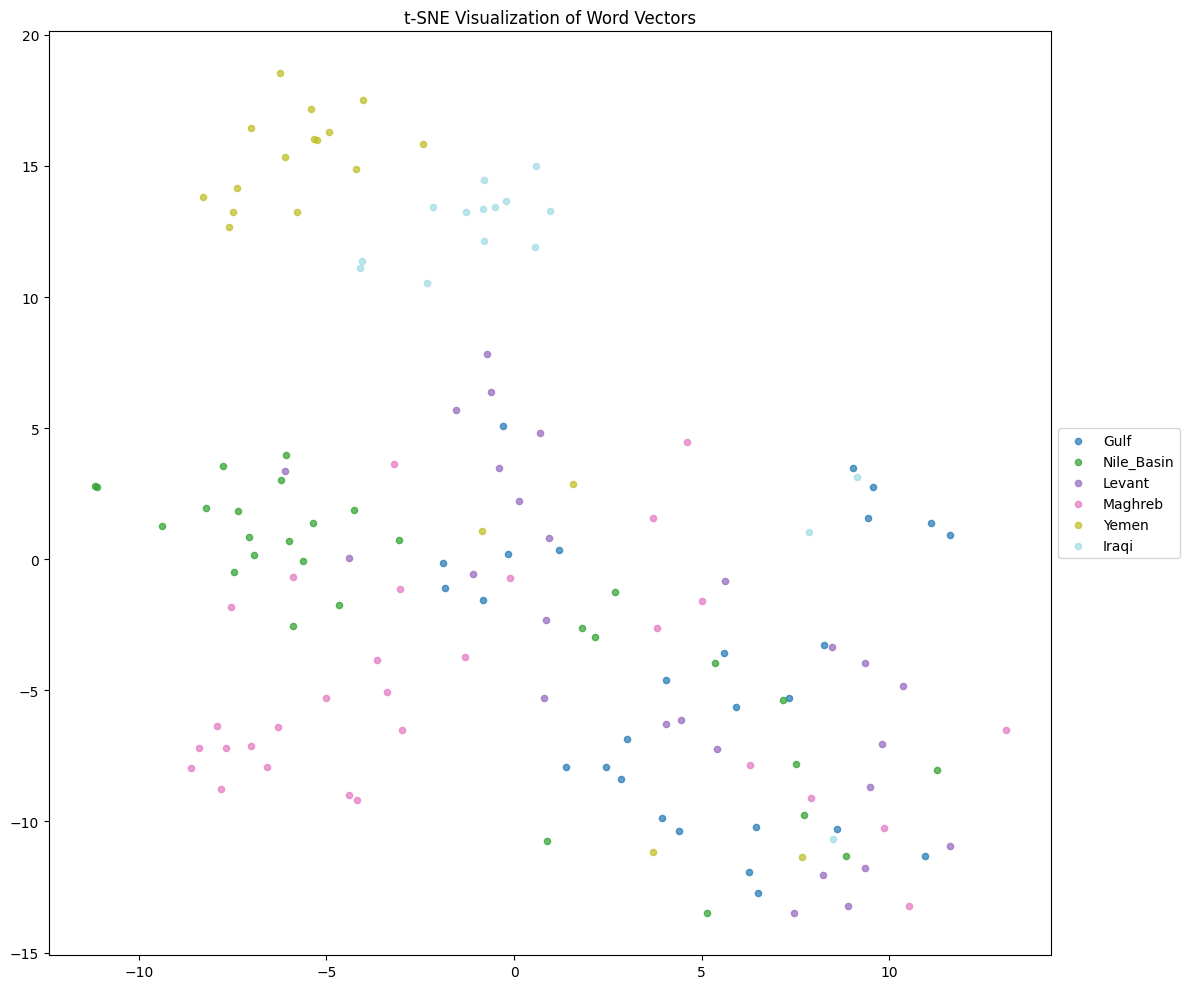

In [ ]:
dialect_words = {}
regions = ['Gulf', 'Nile_Basin', 'Levant', 'Maghreb', 'Yemen', 'Iraqi']

for i in range(len(most_common_words_regions)):
    dialect_words[regions [i]] = most_common_words_regions[i]
plot_word_vectors_from_dialects_dynamic(dialect_words, vectors)

### City

In [ ]:
!cp /content/drive/MyDrive/Folder/mission_5_6_city.keras mission_5_6_city.keras

In [ ]:

temp_arrays = []
for CDict in most_common_words_cities:
    CArr = []
    counter = 0
    for key, value in CDict.items():
        if counter == MAX_WORDS_PER_ACCENT:
            break
        counter+=1
        CArr.append(key)
    temp_arrays.append(CArr)
most_common_words_cities = temp_arrays.copy()

In [ ]:

Clean_DF_Train = clean_df(DF_Train)
Clean_DF_Test = clean_df(DF_Test)
Clean_DF_Validation = clean_df(DF_Validation)

X_Train = Clean_DF_Train['clean_text'].to_list()
y_Train = Clean_DF_Train['lang_num'].to_list()
X_Test = Clean_DF_Test['clean_text'].to_list()
y_Test = Clean_DF_Test['lang_num'].to_list()

X_Validation = Clean_DF_Validation['clean_text'].to_list()
y_Validation = Clean_DF_Validation['lang_num'].to_list()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_Train)
word_index = tokenizer.word_index
sequences_train = tokenizer.texts_to_sequences(X_Train)
sequences_test = tokenizer.texts_to_sequences(X_Test)
sequences_val = tokenizer.texts_to_sequences(X_Validation)

max_length = max(len(seq) for seq in sequences_train)

X_Train_padded = pad_sequences(sequences_train, maxlen=max_length, padding='post')
X_Test_padded = pad_sequences(sequences_test, maxlen=max_length, padding='post')
X_Validation_padded = pad_sequences(sequences_val, maxlen=max_length, padding='post')

sentences = Clean_DF_Train['clean_text'].astype(str).tolist()

model = load_model("mission_5_6_city.keras")

embedding_layer = model.get_layer('embedding')  # Replace 'embedding' with the actual name of your embedding layer
embedding_weights = embedding_layer.get_weights()[0]

vectors = {word: embedding_weights[idx] for word, idx in word_index.items()}

In [ ]:
dialect_words = {}
cities = ['ALE', 'ALX', 'ALG', 'AMM', 'ASW', 'BAG', 'BAS', 'BEI', 'BEN',
       'CAI', 'DAM', 'DOH', 'FES', 'JED', 'JER', 'KHA', 'MOS', 'RAB',
       'RIY', 'SAL', 'SAN', 'SFX', 'TRI', 'TUN']

for i in range(len(most_common_words_cities)):
    dialect_words[cities [i]] = most_common_words_cities[i]

plot_word_vectors_from_dialects_dynamic(dialect_words, vectors)

# Final Results

In [ ]:
df = pd.DataFrame(comparison_table)
df

In [ ]:
df.to_csv("[your_name].csv", index=False)